<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Bonheur World <mark>Exploration des données et nettoyage</mark>
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Mission 
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.1. Rappel sur sujet
</div>

Challenge goals

How accurately can we predict regional temperature anomalies based on past and neighbouring climate observations ?

Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique non supervisé pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité. Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).         

- Un notebook contenant les fonctions permettant le prétraitement des données ainsi que les résultats du clustering (en y incluant des représentations graphiques) ....
- Un support de présentation qui présente la démarche et les résultats du clustering.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Description du notebook
</div>

Ce note book, a pour objectif d'explorer les données et d'effectuer le nettoyage.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.3. Description des données
</div>



|column        | Description                             |
|--------------| --------------------------------------- |
|country_official | nom officiel du pays |
|country | nom du pays reçu à l'origine|
|year | année|
|score | score du bonheur|
|PIB | PIB par habitant|
|Soutien | Soutien social|
|Esperance vie BS | Espérance de vie en Bonne Santé|
|Liberte des choix de vie | |
|Generosite | la générosité perçue|
|Corruption | le faible niveau de corruption perçue|
|Regional indicator||
|id_country | identifiant officiel du pays|
|alpha3 | code alpha3 officiel du pays|
|alpha2 | code alpha2 officiel du pays|
|continent_code | code continent officiel du pays|
|latitude | latitude du pays|
|longitude | longitude du pay|s
|Annual Sunshine | durée d'ensoleillement du pays|
|Annual Sunshine NCDC Computed||
|deaths_rural_urban | nombre de morts en zone urbaine|
|divorces | nombre de divorce|
|Precipitations in million cubic metres | volume de précipitations|
|rate of Population connected to wastewater collecting system | ratio de la population avec l'eau courante|
|rate of Population connected to wastewater treatment | ratio de la population connectée au tout à l'égout|
|gini | indice de gini|
|intentional homicide victims Female nb | nombre de femmes victimes d'homicide |
|intentional homicide victims Male nb | nombre d'hommes victimes d'homicide |
|Homicide victime nb | nombre de victimes d'homicide |


In [1]:
from os import getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm
import csv
from bonheur_bed_ara import *
from IPython.core.display import HTML
import plotly.express as px

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 0

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"
country_col_name = "country"
country_official_col_name = "country_official"
country_official_France = 'French Republic'

data_set_file_name = "DATA_SET_FULL.csv"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\dataset\


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Chargement
</div>

Le code continent `NA` pour `North America` est interprété comme un NAN, il faut donc en tenir compte au chargement des données.

In [3]:
# Le code continent North American = NA était interprété en tant que NaN et non sa valeur
df_origin = pd.read_csv(data_set_path+data_set_file_name, quoting=csv.QUOTE_NONNUMERIC, na_values=["", np.nan], keep_default_na=False, sep=',')
df_origin = df_origin.sort_values(by=[country_official_col_name, "year"])

print(f"{df_origin.shape} données chargées ------> {list(df_origin.columns)}")
df_origin.head()

(2359, 28) données chargées ------> ['country_official', 'country', 'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS', 'Liberte des choix de vie', 'Generosite', 'Corruption', 'Regional indicator', 'id_country', 'alpha3', 'alpha2', 'continent_code', 'latitude', 'longitude', 'Annual Sunshine', 'Annual Sunshine NCDC Computed', 'deaths_rural_urban', 'divorces', 'Precipitations in million cubic metres', 'rate of Population connected to wastewater collecting system', 'rate of Population connected to wastewater treatment', 'gini', 'intentional homicide victims Female nb', 'intentional homicide victims Male nb', 'Homicide victime nb']


country_official country    year  score    PIB  Soutien  \
443   Arab Republic of Egypt   Egypt  2005.0  5.168  9.036    0.848   
828   Arab Republic of Egypt   Egypt  2007.0  5.541  9.135    0.686   
1082  Arab Republic of Egypt   Egypt  2008.0  4.632  9.186    0.738   
936   Arab Republic of Egypt   Egypt  2009.0  5.066  9.213    0.744   
961   Arab Republic of Egypt   Egypt  2010.0  4.669  9.244    0.769   

      Esperance vie BS  Liberte des choix de vie  Generosite  Corruption  ...  \
443              59.70                     0.817         NaN         NaN  ...   
828              59.82                     0.609      -0.121         NaN  ...   
1082             59.88                       NaN      -0.087       0.914  ...   
936              59.94                     0.611      -0.100       0.801  ...   
961              60.00                     0.486      -0.076       0.826  ...   

     Annual Sunshine NCDC Computed  deaths_rural_urban  divorces  \
443                         3293.3            450646.0   65047.0   
828                         3790.8            450596.0   77878.0   
1082                        3790.8            461934.0   84430.0   
936                         3298.9            476592.0  141467.0   
961                         3666.4            483385.0  149376.0   

     Precipitations in million cubic metres  \
443                                  1300.0   
828                                  1300.0   
1082                                    NaN   
936                                     NaN   
961                                     NaN   

     rate of Population connected to wastewater collecting system  \
443                                                 NaN             
828                                                 NaN             
1082                                                NaN             
936                                                 NaN             
961                                                 NaN             

      rate of Population connected to wastewater treatment  gini  \
443                                                 NaN      NaN   
828                                                 NaN      NaN   
1082                                                NaN      NaN   
936                                                 NaN      NaN   
961                                                 NaN      NaN   

      intentional homicide victims Female nb  \
443                                     63.0   
828                                    163.0   
1082                                   110.0   
936                                    193.0   
961                                    197.0   

      intentional homicide victims Male nb  Homicide victime nb  
443                                  459.0              10962.0  
828                                  517.0              14280.0  
1082                                 856.0              20286.0  
936                                  719.0              19152.0  
961                                 1642.0              38619.0  

[5 rows x 28 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Exploration de la forme
</div>

In [4]:
df_origin[df_origin['continent_code'].isna()]

Empty DataFrame
Columns: [country_official, country, year, score, PIB, Soutien, Esperance vie BS, Liberte des choix de vie, Generosite, Corruption, Regional indicator, id_country, alpha3, alpha2, continent_code, latitude, longitude, Annual Sunshine, Annual Sunshine NCDC Computed, deaths_rural_urban, divorces, Precipitations in million cubic metres, rate of Population connected to wastewater collecting system, rate of Population connected to wastewater treatment, gini, intentional homicide victims Female nb, intentional homicide victims Male nb, Homicide victime nb]
Index: []

[0 rows x 28 columns]

In [5]:
df = df_origin.copy()

In [6]:
df.duplicated(subset=['country_official', 'year']).sum()

0

<div style="display: flex; background-color: indigo;" >

#### Encodage des continents
</div>

In [7]:
# Encodage des continents :
from sklearn.preprocessing import LabelEncoder

In [8]:
transformer_continent = LabelEncoder()
df['continent_encode'] = transformer_continent.fit_transform(df['continent_code'])
df = df[['country_official', 'country', 'continent_code','continent_encode','year', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite',
       'Corruption', 'Regional indicator', 'alpha3', 'alpha2', 'latitude', 'longitude', 'id_country', 'Annual Sunshine',
       'Annual Sunshine NCDC Computed', 'deaths_rural_urban', 'divorces',
       'Precipitations in million cubic metres',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'intentional homicide victims Female nb',
       'intentional homicide victims Male nb', 'Homicide victime nb'
       ]]

<div style="display: flex; background-color: indigo;" >

#### Typage des données
</div>

In [9]:
df["year"] = df["year"].astype(int)
df["id_country"] = df["id_country"].astype(int)

In [10]:
df.dtypes

country_official                                                 object
country                                                          object
continent_code                                                   object
continent_encode                                                  int32
year                                                              int32
score                                                           float64
PIB                                                             float64
Soutien                                                         float64
Esperance vie BS                                                float64
Liberte des choix de vie                                        float64
Generosite                                                      float64
Corruption                                                      float64
Regional indicator                                               object
alpha3                                                          

In [11]:
annee_min = df["year"].min()
annee_max = df["year"].max()
print(f"Données de {annee_min} à {annee_max}")

Données de 2005 à 2022


<div style="display: flex; background-color: indigo;" >

#### Correction des données 2022
</div>

Après une première analyse suite à la visualisation des outliers, les données complémentaires de 2022 ont changées, il ne s'agit pas de la valeur, mais du ratio d'impact de la variable sur le score, nous ne disposons donc pas des valeurs pour l'année 2022.

Suppression des valeurs complémentaires pour l'année 2022, à savoir les variables `'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption'`

On applique cette correction dès le départ, car il y a un impact sur les analyses qui suivent

In [12]:
to_correct_colums = ['PIB', 'Soutien', 'Esperance vie BS', 'Liberte des choix de vie', 'Generosite', 'Corruption']
for c in to_correct_colums:
    df.loc[df["year"] == 2022, c] = np.nan

df.head()

country_official country continent_code  continent_encode  year  \
443   Arab Republic of Egypt   Egypt             AF                 0  2005   
828   Arab Republic of Egypt   Egypt             AF                 0  2007   
1082  Arab Republic of Egypt   Egypt             AF                 0  2008   
936   Arab Republic of Egypt   Egypt             AF                 0  2009   
961   Arab Republic of Egypt   Egypt             AF                 0  2010   

      score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
443   5.168  9.036    0.848             59.70                     0.817  ...   
828   5.541  9.135    0.686             59.82                     0.609  ...   
1082  4.632  9.186    0.738             59.88                       NaN  ...   
936   5.066  9.213    0.744             59.94                     0.611  ...   
961   4.669  9.244    0.769             60.00                     0.486  ...   

      Annual Sunshine NCDC Computed  deaths_rural_urban  divorces  \
443                          3293.3            450646.0   65047.0   
828                          3790.8            450596.0   77878.0   
1082                         3790.8            461934.0   84430.0   
936                          3298.9            476592.0  141467.0   
961                          3666.4            483385.0  149376.0   

     Precipitations in million cubic metres  \
443                                  1300.0   
828                                  1300.0   
1082                                    NaN   
936                                     NaN   
961                                     NaN   

     rate of Population connected to wastewater collecting system  \
443                                                 NaN             
828                                                 NaN             
1082                                                NaN             
936                                                 NaN             
961                                                 NaN             

      rate of Population connected to wastewater treatment  gini  \
443                                                 NaN      NaN   
828                                                 NaN      NaN   
1082                                                NaN      NaN   
936                                                 NaN      NaN   
961                                                 NaN      NaN   

      intentional homicide victims Female nb  \
443                                     63.0   
828                                    163.0   
1082                                   110.0   
936                                    193.0   
961                                    197.0   

      intentional homicide victims Male nb  Homicide victime nb  
443                                  459.0              10962.0  
828                                  517.0              14280.0  
1082                                 856.0              20286.0  
936                                  719.0              19152.0  
961                                 1642.0              38619.0  

[5 rows x 29 columns]

<div style="display: flex; background-color: indigo;" >

#### Correction des données Mali ensoleillement 2021
</div>

Suite à l'analyse des outliers, il s'avère que la donnée "Ensoleillement" pour le Mali pour l'année 2021 est erronée.

Choix de l'imputation par la moyenne de l'année précédente et suivante.

In [13]:
# L'une des valeurs du Mali n'est pas cohérente pour l'ensoleillement, pour l'année 2021 : 298.7 alors que toutes les autres années sont autour entre 2800 et 3000
moyenne_20_22 = np.mean(df.loc[(df['country_official']=='Republic of Mali') & ((df['year']==2020) | (df['year']==2022)), 'Annual Sunshine NCDC Computed'].values)
df.loc[(df['country_official']=='Republic of Mali') & (df['year']==2021), 'Annual Sunshine NCDC Computed'] = moyenne_20_22
if verbose:
    print(f"MALI Sunshine > 2021 => {moyenne_20_22} ------------ IMPUTED")
df.loc[(df['country_official']=='Republic of Mali') & (df['year']==2021), 'Annual Sunshine NCDC Computed']

1892    2926.1
Name: Annual Sunshine NCDC Computed, dtype: float64

In [14]:
# Correction des données du Niger avec la moyenne des pays voisins sur la même latitude
for y in range(annee_min, annee_max+1):
    if verbose:
        print(f"NIGER Sunshine > {y} =", end="")
    moyenne_voisins = np.nan
    try:
        moyenne_voisins = np.mean(df.loc[((df['country_official']=='Republic of Mali') | (df['country_official']=='Republic of Chad')) & (df['year']==y), 'Annual Sunshine NCDC Computed'].values)
    except:
        moyenne_voisins = np.nan
    # On ne traite que les lignes déjà existantes
    if df[(df['country_official']=='Republic of the Niger') & (df['year']==y)].shape[0]>0:
        df.loc[(df['country_official']=='Republic of the Niger') & (df['year']==y), 'Annual Sunshine NCDC Computed' ] = moyenne_voisins
        if verbose:
            print(f"> {moyenne_voisins} ------------ IMPUTED")
    else:
        if verbose:
            print(f"> ------------ UNEXIST")
df[df['country_official']=='Republic of the Niger']

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


country_official country continent_code  continent_encode  year  \
1133  Republic of the Niger   Niger             AF                 0  2006   
1009  Republic of the Niger   Niger             AF                 0  2007   
1125  Republic of the Niger   Niger             AF                 0  2008   
1143  Republic of the Niger   Niger             AF                 0  2009   
1182  Republic of the Niger   Niger             AF                 0  2010   
991   Republic of the Niger   Niger             AF                 0  2011   
1214  Republic of the Niger   Niger             AF                 0  2012   
1289  Republic of the Niger   Niger             AF                 0  2013   
1144  Republic of the Niger   Niger             AF                 0  2014   
1287  Republic of the Niger   Niger             AF                 0  2015   
1379  Republic of the Niger   Niger             AF                 0  2016   
1292  Republic of the Niger   Niger             AF                 0  2017   
1314  Republic of the Niger   Niger             AF                 0  2018   
1511  Republic of the Niger   Niger             AF                 0  2019   
1457  Republic of the Niger   Niger             AF                 0  2020   
1493  Republic of the Niger   Niger             AF                 0  2021   
1478  Republic of the Niger   Niger             AF                 0  2022   

      score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
1133  3.737  6.888    0.677             46.36                     0.750  ...   
1009  4.277  6.881    0.726             47.12                     0.584  ...   
1125  4.236  6.918    0.607             47.88                     0.649  ...   
1143  4.267  6.898    0.771             48.64                     0.880  ...   
1182  4.101  6.941    0.655             49.40                     0.817  ...   
991   4.556  6.925    0.818             49.92                     0.780  ...   
1214  3.798  6.987    0.700             50.44                     0.734  ...   
1289  3.716  7.002    0.696             50.96                     0.825  ...   
1144  4.181  7.027    0.753             51.48                     0.688  ...   
1287  3.671  7.030    0.713             52.00                     0.728  ...   
1379  4.235  7.047    0.683             52.50                     0.702  ...   
1292  4.616  7.058    0.582             53.00                     0.684  ...   
1314  5.164  7.087    0.612             53.50                     0.791  ...   
1511  5.004  7.106    0.677             54.00                     0.831  ...   
1457  4.910  6.842    0.617             53.50                     0.760  ...   
1493  5.074  7.098    0.641             53.78                     0.806  ...   
1478  5.003    NaN      NaN               NaN                       NaN  ...   

      Annual Sunshine NCDC Computed  deaths_rural_urban divorces  \
1133                        3307.40                 NaN      NaN   
1009                        3500.90                 NaN      NaN   
1125                        3010.35                 NaN      NaN   
1143                        3303.70                 NaN      NaN   
1182                        3182.30                 NaN      NaN   
991                         2783.20                 NaN      NaN   
1214                        3172.20                 NaN      NaN   
1289                        2979.20                 NaN      NaN   
1144                        3303.70                 NaN      NaN   
1287                        2837.05                 NaN      NaN   
1379                        3105.00                 NaN      NaN   
1292                        2800.50                 NaN      NaN   
1314                        3307.40                 NaN      NaN   
1511                        2837.05                 NaN      NaN   
1457                        3182.30                 NaN      NaN   
1493                        3213.50                 NaN      NaN   
1478     

<div style="display: flex; background-color: indigo;" >

#### Correction des années d'ensoleillement manquantes
</div>

Pour compléter l'ensoleillement de manière automatique l'idéal serait de récupérer les pays qui ont des données dont la latitude est la même par ordre de proximté en longitude également.

Ce qui permettrait de définir les pays voisins de chaque pays et donc de faire la moyenne d'ensoleillement des plus proches voisins.
Par manque de temps, ce traitement n'est pas réalisé.

In [ ]:
pays_voisins = {
                'Republic of the Niger':['Republic of Mali', 'Republic of Chad'],
                'Burkina Faso':['Republic of Mali', 'Republic of the Niger', 'Federal Republic of Nigeria'],
                'Canada' : [], 
                'Central African Republic' : [], 
                'Congo, The Democratic Republic of the' : [], 
                'Federal Democratic Republic of Ethiopia' : [], 
                'Federal Democratic Republic of Nepal' : [], 
                'Federal Republic of Somalia' : [], 
                'Ireland' : [], 
                'Islamic Republic of Afghanistan' : [], 
                'Islamic Republic of Mauritania' : [], 
                'Jamaica' : [], 
                'Kingdom of Bhutan' : [], 
                'Kingdom of Cambodia' : [], 
                'Kingdom of Eswatini' : [], 
                'Kingdom of Lesotho' : [], 
                'Kingdom of Saudi Arabia' : [], 
                'Kosovo' : [], 
                'Lebanese Republic' : [], 
                'Libya' : [], 
                'Montenegro' : [], 
                'New Zealand' : [], 
                "People's Democratic Republic of Algeria" : [], 
                "People's Republic of Bangladesh" : [], 
                'Plurinational State of Bolivia' : [], 
                'Republic of Albania' : [], 
                'Republic of Angola' : [], 
                'Republic of Botswana' : [], 
                'Republic of Burundi' : [], 
                'Republic of Chile' : [], 
                'Republic of Cuba' : [], 
                'Republic of Ecuador' : [], 
                'Republic of El Salvador' : [], 
                'Republic of Ghana' : [], 
                'Republic of Guatemala' : [], 
                'Republic of Haiti' : [], 
                'Republic of Indonesia' : [], 
                'Republic of Iraq' : [], 
                'Republic of Kazakhstan' : [], 
                'Republic of Liberia' : [], 
                'Republic of Malta' : [], 
                'Republic of Mozambique' : [], 
                'Republic of Myanmar' : [], 
                'Republic of Namibia' : [], 
                'Republic of North Macedonia' : [], 
                'Republic of Panama' : [], 
                'Republic of Paraguay' : [], 
                'Republic of Peru' : [], 
                'Republic of Serbia' : [], 
                'Republic of South Sudan' : [], 
                'Republic of Suriname' : [], 
                'Republic of Turkey' : [], 
                'Republic of Uganda' : [], 
                'Republic of Yemen' : [], 
                'Republic of the Congo' : [], 
                'Republic of the Gambia' : [], 
                'Republic of the Philippines' : [], 
                'Republic of the Sudan' : [], 
                'Russian Federation' : [], 
                'Rwandese Republic' : [], 
                'Socialist Republic of Viet Nam' : [], 
                'Taiwan, Province of China' : [], 
                'Union of the Comoros' : [], 
                'United Kingdom of Great Britain and Northern Ireland' : [], 
                'United Republic of Tanzania' : [], 
                'the State of Palestine' : []
}

In [35]:
df.loc[df['country_official']=='Federal Democratic Republic of Nepal', ['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', 'Annual Sunshine', 'Annual Sunshine NCDC Computed','Sunshine']]

country_official country continent_code  \
1936  Federal Democratic Republic of Nepal   Nepal             AS   
1569  Federal Democratic Republic of Nepal   Nepal             AS   
1447  Federal Democratic Republic of Nepal   Nepal             AS   
1444  Federal Democratic Republic of Nepal   Nepal             AS   
1297  Federal Democratic Republic of Nepal   Nepal             AS   
1276  Federal Democratic Republic of Nepal   Nepal             AS   
1585  Federal Democratic Republic of Nepal   Nepal             AS   
1518  Federal Democratic Republic of Nepal   Nepal             AS   
1519  Federal Democratic Republic of Nepal   Nepal             AS   
1532  Federal Democratic Republic of Nepal   Nepal             AS   
1780  Federal Democratic Republic of Nepal   Nepal             AS   
1788  Federal Democratic Republic of Nepal   Nepal             AS   
1786  Federal Democratic Republic of Nepal   Nepal             AS   
2198  Federal Democratic Republic of Nepal   Nepal             AS   
2173  Federal Democratic Republic of Nepal   Nepal             AS   
2196  Federal Democratic Republic of Nepal   Nepal             AS   
2175  Federal Democratic Republic of Nepal   Nepal             AS   

      continent_encode  year  score  Annual Sunshine  \
1936                 1  2006  4.567              NaN   
1569                 1  2007  4.748              NaN   
1447                 1  2008  4.441              NaN   
1444                 1  2009  4.917              NaN   
1297                 1  2010  4.350              NaN   
1276                 1  2011  3.809              NaN   
1585                 1  2012  4.233              NaN   
1518                 1  2013  4.605              NaN   
1519                 1  2014  4.975              NaN   
1532                 1  2015  4.812              NaN   
1780                 1  2016  5.100              NaN   
1788                 1  2017  4.737              NaN   
1786                 1  2018  4.910              NaN   
2198                 1  2019  5.449              NaN   
2173                 1  2020  5.137              NaN   
2196                 1  2021  5.269              NaN   
2175                 1  2022  5.377              NaN   

      Annual Sunshine NCDC Computed  Sunshine  
1936                            NaN       NaN  
1569                            NaN       NaN  
1447                            NaN       NaN  
1444                            NaN       NaN  
1297                            NaN       NaN  
1276                            NaN       NaN  
1585                            NaN       NaN  
1518                            NaN       NaN  
1519                            NaN       NaN  
1532                            NaN       NaN  
1780                            NaN       NaN  
1788                            NaN       NaN  
1786                            NaN       NaN  
2198                            NaN       NaN  
2173                            NaN       NaN  
2196                            NaN       NaN  
2175                            NaN       NaN

In [30]:
df.loc[df[current_data_col_name].isna(), "country_official"].unique()

array(['Burkina Faso', 'Canada', 'Central African Republic',
       'Congo, The Democratic Republic of the',
       'Federal Democratic Republic of Ethiopia',
       'Federal Democratic Republic of Nepal',
       'Federal Republic of Somalia', 'Ireland',
       'Islamic Republic of Afghanistan',
       'Islamic Republic of Mauritania', 'Jamaica', 'Kingdom of Bhutan',
       'Kingdom of Cambodia', 'Kingdom of Eswatini', 'Kingdom of Lesotho',
       'Kingdom of Saudi Arabia', 'Kosovo', 'Lebanese Republic', 'Libya',
       'Montenegro', 'New Zealand',
       "People's Democratic Republic of Algeria",
       "People's Republic of Bangladesh",
       'Plurinational State of Bolivia', 'Republic of Albania',
       'Republic of Angola', 'Republic of Botswana',
       'Republic of Burundi', 'Republic of Chile', 'Republic of Cuba',
       'Republic of Ecuador', 'Republic of El Salvador',
       'Republic of Ghana', 'Republic of Guatemala', 'Republic of Haiti',
       'Republic of Indonesia', 'R

In [ ]:
df["NB_NA"] = df[].isna().sum(axis=1)

In [15]:
def get_year_data_mean(df, current_y, current_country, current_data_col_name, verbose=0):
    val = df.loc[(df['year']==current_y) & (df['country_official']==current_country),current_data_col_name].values[0]
    if np.isnan(val) or val == 0:
        c_y_min = np.min(df.loc[df['country_official']==current_country,"year"])
        c_y_max = np.max(df.loc[df['country_official']==current_country,"year"])

        y_down = current_y-1
        y_up = current_y+1

        if c_y_min > y_down:
            # on est déjà à la date minimale, donc on prend la date suivante +1
            y_down = current_y+2

        if c_y_max < y_up:
            # on est déjà à la date maximale, donc on prend la date précédente -1
            y_up = current_y-2

        year_moins = np.nan
        try:
            year_moins = df.loc[(df['year']==y_down) & (df['country_official']==current_country),current_data_col_name].values[0]
        except Exception as error:
            if verbose>1:
                print(f"{current_country} - {current_y} - {current_data_col_name} Exception No year less for ({y_down} : {error}")
            year_moins = np.nan

        year_plus = np.nan
        try:
            year_plus = df.loc[(df['year']==y_up) & (df['country_official']==current_country),current_data_col_name].values[0]
        except Exception as error:
            if verbose>1:
                print(f"{current_country} - {current_y} - {current_data_col_name} Exception No year plus for ({y_up} : {error}")
            year_plus = np.nan
        
        if np.isnan(year_plus) and np.isnan(year_moins):
            if verbose>1:
                print(f"{current_country} - {current_y} - {current_data_col_name} - no data for {y_down} and {y_up}")
            try:
                val = df.loc[(df['country_official']==current_country),current_data_col_name].mean()
                if verbose:
                    print(f"{current_country} - {current_y} - {current_data_col_name} new value mean of all datas: {val}")
            except Exception as error:
                if verbose:
                    print(f"{current_country} - {current_y} - {current_data_col_name} Exception on mean({year_plus} and {year_moins}) : {error}")                   
        else:
            try:
                val = np.mean(year_moins, year_plus)
                if verbose:
                    print(f"{current_country} - {current_y} - {current_data_col_name} new value mean previous and next year: {val}")
            except Exception as error:
                if verbose:
                    print(f"{current_country} - {current_y} - {current_data_col_name} Exception on mean({year_plus} and {year_moins}) : {error}")
    else:
        if verbose:
            print(f"{current_country} - {current_y} - {current_data_col_name} value : {val} (no change)")
    return val

In [17]:
current_data_col_name = 'Annual Sunshine NCDC Computed'
before_na = df[current_data_col_name].isna().sum()
df["Sunshine"] = df.apply(lambda x: get_year_data_mean(df, current_y=x["year"], current_country=x["country_official"], current_data_col_name=current_data_col_name, verbose=verbose), axis=1)
print(f"{before_na} NA before proceed and {df['Sunshine'].isna().sum()} NA after proceed")

889 NA before proceed and 889 NA after proceed


<div style="display: flex; background-color: indigo;" >

#### Describe
</div>

In [15]:
df.describe(include="all")

country_official country continent_code  continent_encode  \
count                     2359    2359           2359       2359.000000   
unique                     164     190              6               NaN   
top     Arab Republic of Egypt   Egypt             AS               NaN   
freq                        17      17            707               NaN   
mean                       NaN     NaN            NaN          1.518016   
std                        NaN     NaN            NaN          1.384665   
min                        NaN     NaN            NaN          0.000000   
25%                        NaN     NaN            NaN          0.000000   
50%                        NaN     NaN            NaN          1.000000   
75%                        NaN     NaN            NaN          2.000000   
max                        NaN     NaN            NaN          5.000000   

               year        score          PIB      Soutien  Esperance vie BS  \
count   2359.000000  2359.000000  2120.000000  2129.000000       2097.000000   
unique          NaN          NaN          NaN          NaN               NaN   
top             NaN          NaN          NaN          NaN               NaN   
freq            NaN          NaN          NaN          NaN               NaN   
mean    2014.507842     5.442263     9.349861     0.811119         63.394495   
std        4.768411     1.121303     1.163141     0.119134          7.441898   
min     2005.000000     2.375000     6.493000     0.290000         32.300000   
25%     2011.000000     4.624500     8.445000     0.747000         58.640000   
50%     2015.000000     5.383000     9.456000     0.834000         65.200000   
75%     2019.000000     6.256500    10.339000     0.905000         68.520000   
max     2022.000000     8.019000    11.648000     0.987000         77.100000   

        Liberte des choix de vie  ...  Annual Sunshine NCDC Computed  \
count                2111.000000  ...                    1470.000000   
unique                       NaN  ...                            NaN   
top                          NaN  ...                            NaN   
freq                         NaN  ...                            NaN   
mean                    0.745412  ...                    2391.999354   
std                     0.140637  ...                     636.252758   
min                     0.258000  ...                     595.000000   
25%                     0.650000  ...                    1828.000000   
50%                     0.764000  ...                    2441.800000   
75%                     0.860000  ...                    2925.175000   
max                     0.985000  ...                    3862.800000   

        deaths_rural_urban      divorces  \
count         1.035000e+03  9.460000e+02   
unique                 NaN           NaN   
top                    NaN           NaN   
freq                   NaN           NaN   
mean          3.624518e+05  7.289547e+04   
std           1.180071e+06  2.678078e+05   
min           1.216000e+03  4.200000e+01   
25%           2.878850e+04  5.162250e+03   
50%           8.087600e+04  1.310950e+04   
75%           2.579000e+05  3.583625e+04   
max           9.980000e+06  4.393722e+06   

       Precipitations in million cubic metres  \
count                            5.340000e+02   
unique                                    NaN   
top                                       NaN   
freq                                      NaN   
mean                             7.909549e+05   
std                              2.366401e+06   
min                              1.540000e+01   
25%                              3.251570e+04   
50%                              1.010552e+05   
75%                              3.659614e+05   
max                              1.641840e+07   

       rate of Population connected to wastewater collecting system  \
count                                          461.000000             
unique                     

In [16]:
display(HTML(df[df["country_official"]==country_official_France].head().to_html()))

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Visualisation générale
</div>

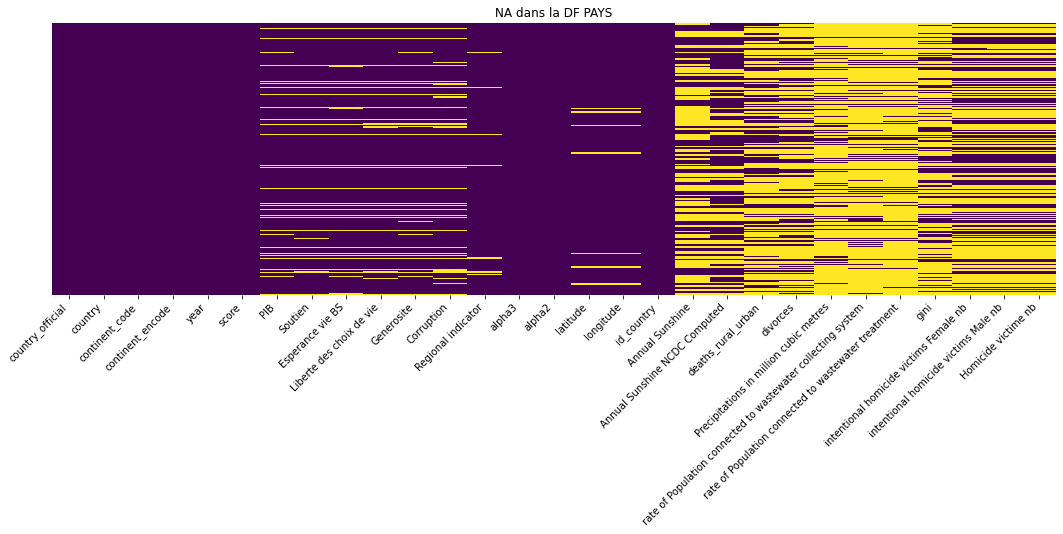

In [17]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF PAYS")
figure.set_size_inches(18, 5, forward=True)
plt.show()

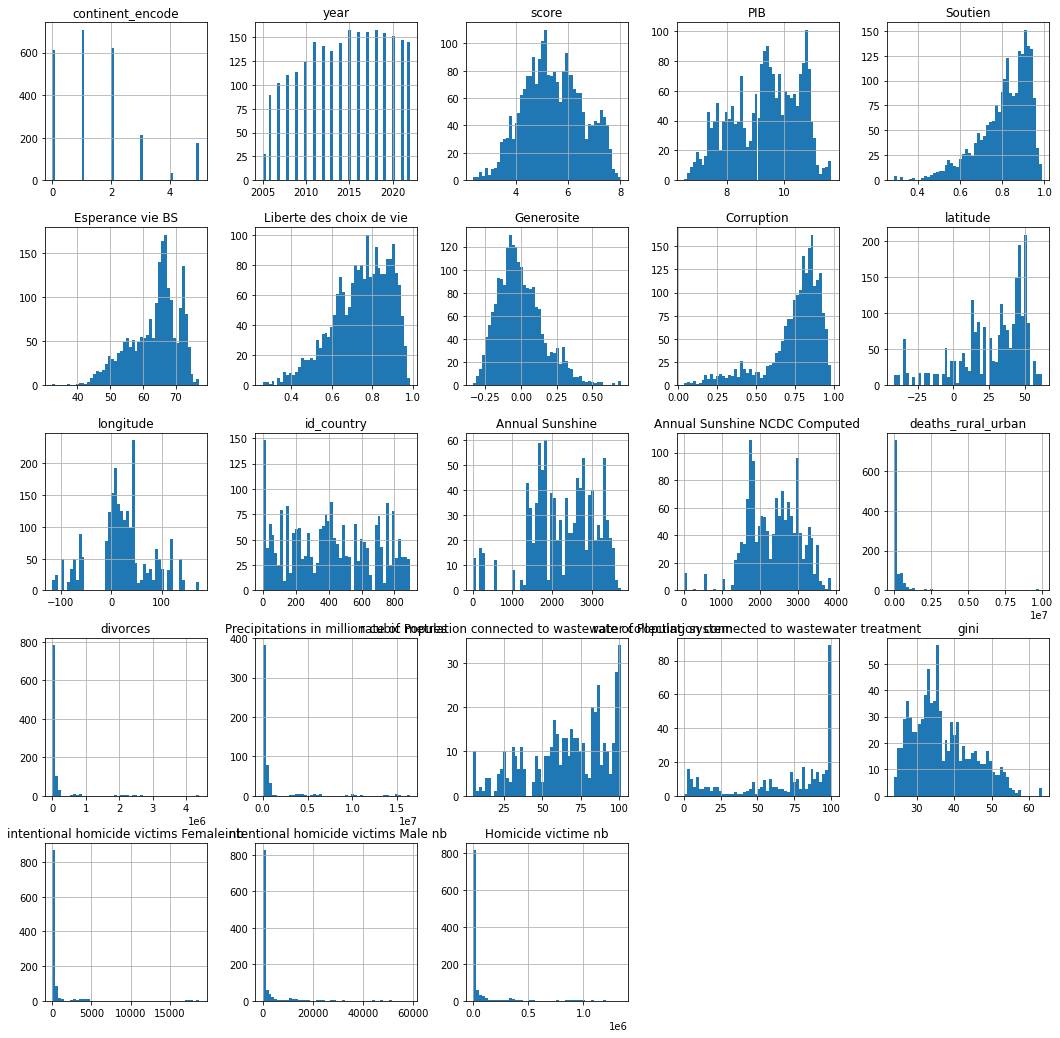

In [76]:
df.hist(figsize=(18,18),bins=50)
plt.show()

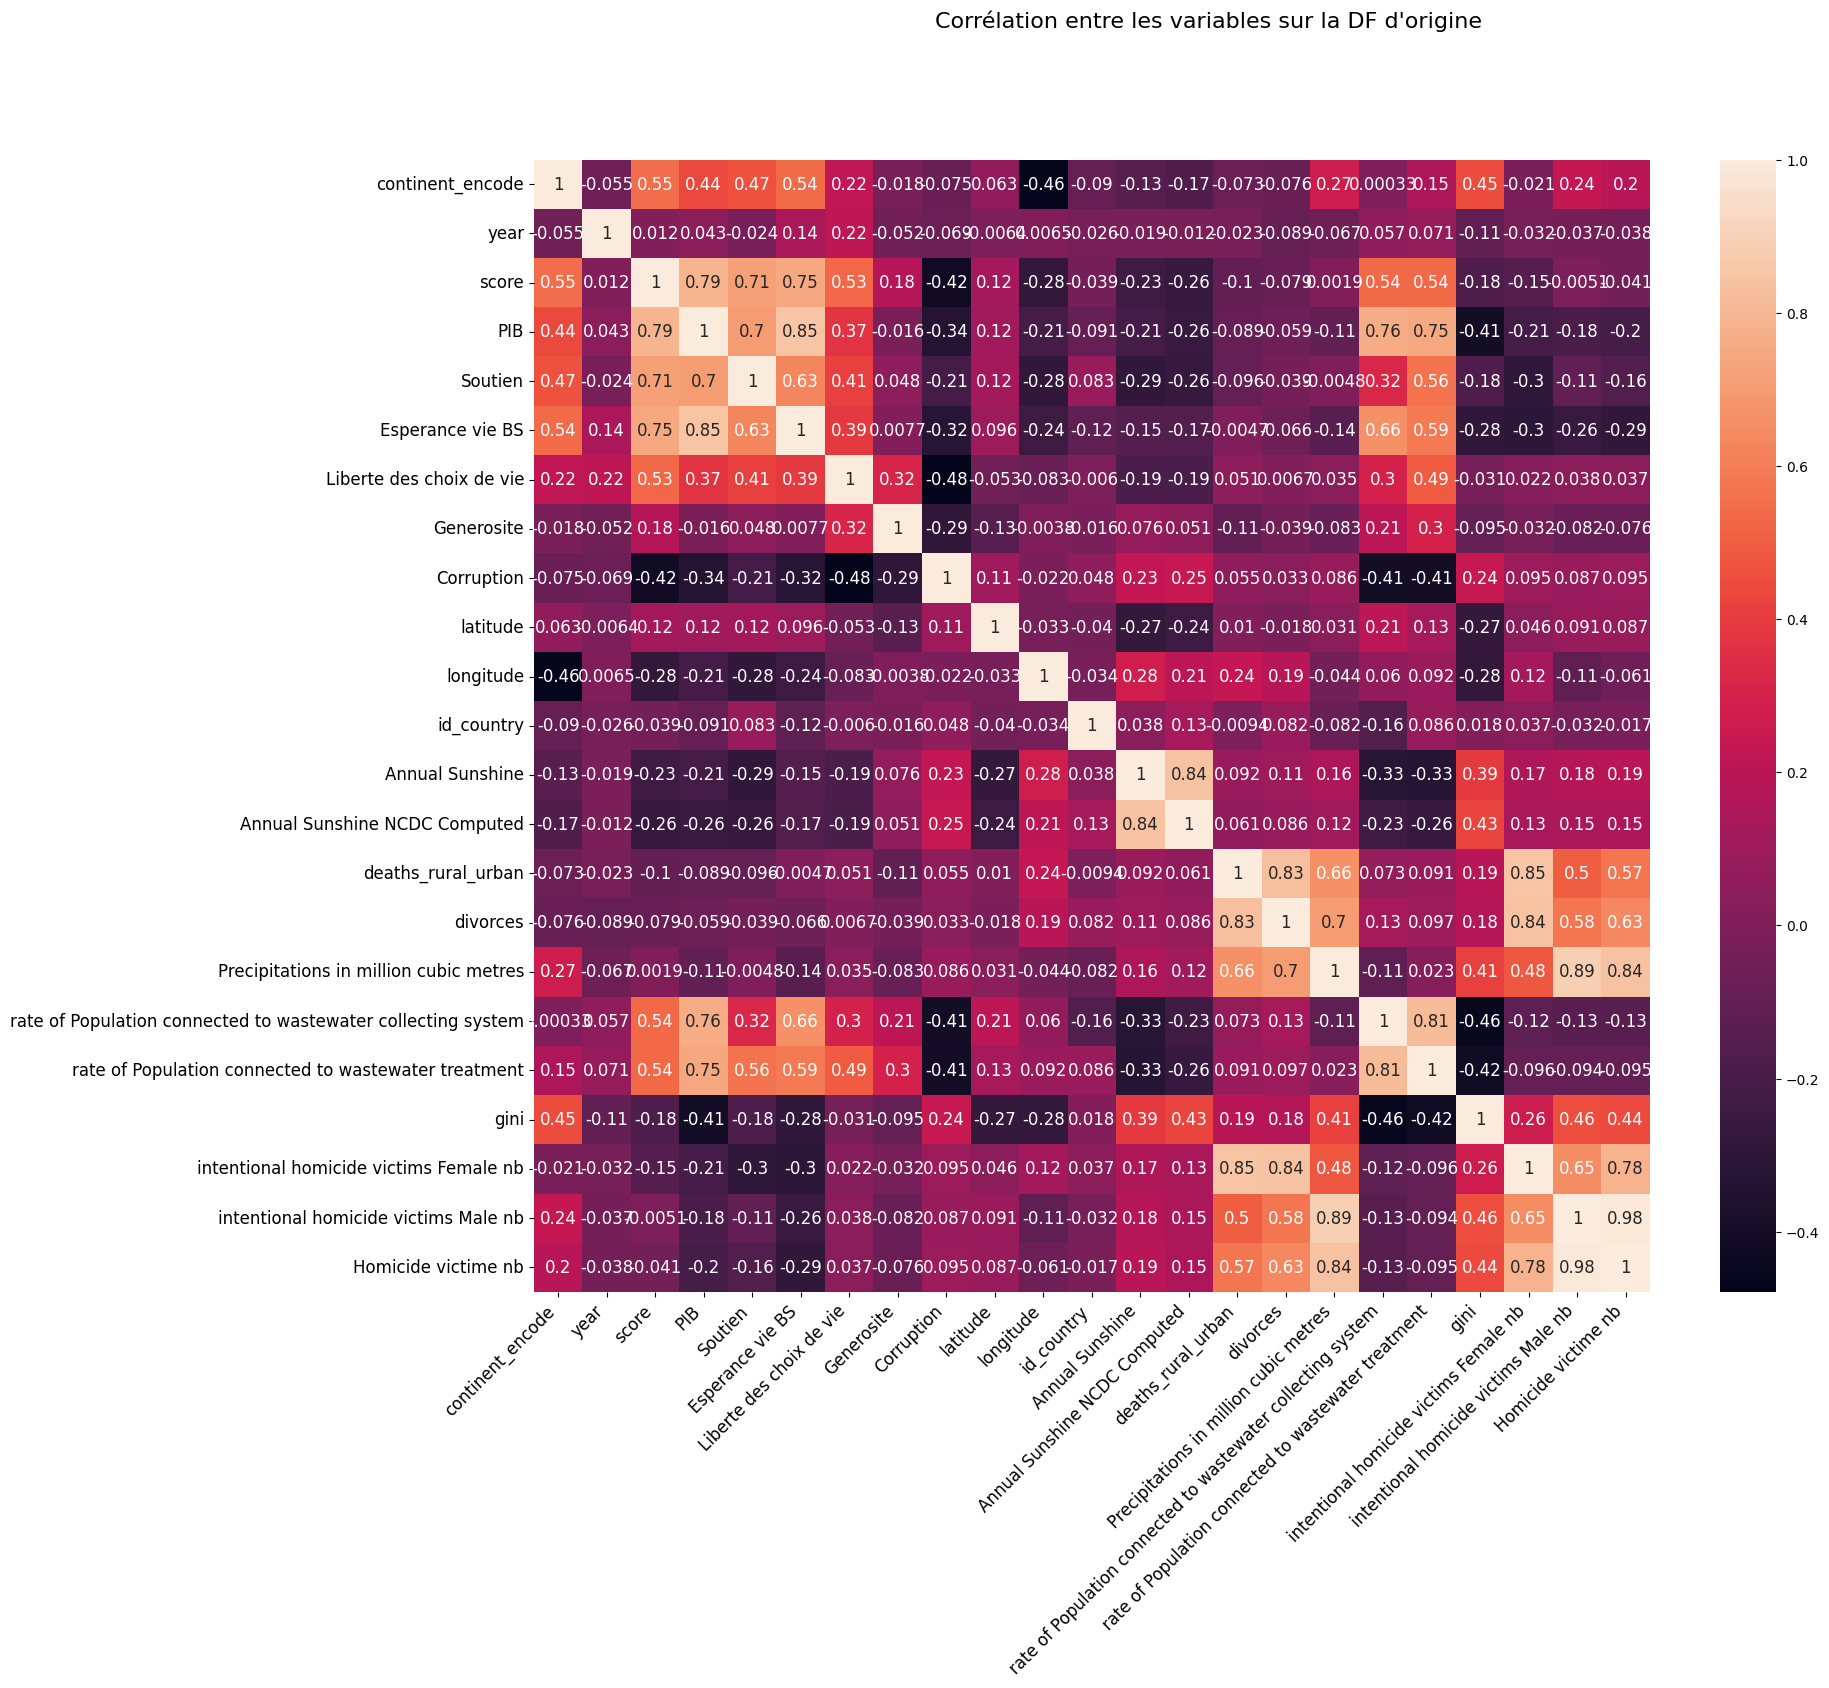

In [77]:
draw_correlation_graphe(df, "Corrélation entre les variables sur la DF d'origine", verbose=verbose,fontsize=12)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Suppression des variables trop corrélées
</div>

Suite a une première analyse, les variables : 
- `Annual Sunshine` et `Annual Sunshine NCDC Computed` sont très fortement corrélée (0.84), une seule de ces 2 variables est donc suffisantes, suppression de `Annual Sunshine`
- `intentional homicide victims Male nb` et `intentional homicide victims Female nb`, `Homicide victime nb` sont très fortement corrélée (0.98), une seule de ces 2 variables est donc suffisantes, suppression de `intentional homicide victims Male nb` et de `intentional homicide victims Female nb`

In [78]:
df_clean = df.copy()
df_clean = df_clean.drop(['Annual Sunshine', 'intentional homicide victims Male nb', 'intentional homicide victims Female nb'], axis=1)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Complément des raccordements à l'eau et au traitement des eaux usées
</div>

Suite à une première analyse, on peut compléter les données sur les raccordements à l'eau et au traitement des eaux usées, en prenant comme hypothèse que la dernière année complétée permet de compléter les suivantes (hypothèse qu'il n'y a pas de diminution du nombre de personnes raccordées, mais au minimum un maintien sur les années suivantes quand il n'y a pas de valeur)

In [79]:
def complete_df_with_water_data(df_clean, verbose=0):
    col_names = ['rate of Population connected to wastewater collecting system', 'rate of Population connected to wastewater treatment']
    df_completed = df_clean.copy()

    i = 0

    for col_name in col_names:
        # Création de la DF temporaire avec la dernière valeur par pays
        df_temp_max = df_completed[df_completed[col_name].notna()]
        df_temp_max = df_temp_max.sort_values(by=["country_official","year"], ascending=False)
        df_temp_max = df_temp_max[[country_official_col_name, "year", col_name]]
        
        year_col_name = "year_max_"+str(i)
        df_temp_max = df_temp_max.rename(columns={"year": year_col_name, col_name : col_name+"_max"})
        # on ne garde que la dernière année
        df_temp_max = df_temp_max.drop_duplicates(subset=["country_official"], keep="first")

        # merge des 2 DF pour pouvoir compléter les données
        df_completed = df_completed.merge(df_temp_max, on=country_official_col_name, how="left", indicator=False)
        df_completed.loc[(df_completed[col_name].isna()) & (df_completed["year"]>df_completed[year_col_name]), col_name] = df_completed[col_name+"_max"]

        # Suppression des colonnes ajoutées
        df_completed = df_completed.drop(columns=[year_col_name, col_name+"_max"])
        # DF complétée
        if verbose:
            print(f"{col_name} : {df_clean[col_name].isna().sum()} NA BEFORE => {df_completed[col_name].isna().sum()} NA AFTER")
        i += 1
    return df_completed


In [80]:
df_completed = complete_df_with_water_data(df_clean, verbose=verbose)
df_completed.head()

country_official country continent_code  continent_encode  year  \
0  Arab Republic of Egypt   Egypt             AF                 0  2005   
1  Arab Republic of Egypt   Egypt             AF                 0  2007   
2  Arab Republic of Egypt   Egypt             AF                 0  2008   
3  Arab Republic of Egypt   Egypt             AF                 0  2009   
4  Arab Republic of Egypt   Egypt             AF                 0  2010   

   score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
0  5.168  9.036    0.848             59.70                     0.817  ...   
1  5.541  9.135    0.686             59.82                     0.609  ...   
2  4.632  9.186    0.738             59.88                       NaN  ...   
3  5.066  9.213    0.744             59.94                     0.611  ...   
4  4.669  9.244    0.769             60.00                     0.486  ...   

    longitude  id_country Annual Sunshine NCDC Computed deaths_rural_urban  \
0  119.525419         818                        3293.3           450646.0   
1  119.525419         818                        3790.8           450596.0   
2  119.525419         818                        3790.8           461934.0   
3  119.525419         818                        3298.9           476592.0   
4  119.525419         818                        3666.4           483385.0   

   divorces  Precipitations in million cubic metres  \
0   65047.0                                  1300.0   
1   77878.0                                  1300.0   
2   84430.0                                     NaN   
3  141467.0                                     NaN   
4  149376.0                                     NaN   

   rate of Population connected to wastewater collecting system  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   rate of Population connected to wastewater treatment  gini  \
0                                                NaN      NaN   
1                                                NaN      NaN   
2                                                NaN      NaN   
3                                                NaN      NaN   
4                                                NaN      NaN   

   Homicide victime nb  
0              10962.0  
1              14280.0  
2              20286.0  
3              19152.0  
4              38619.0  

[5 rows x 26 columns]

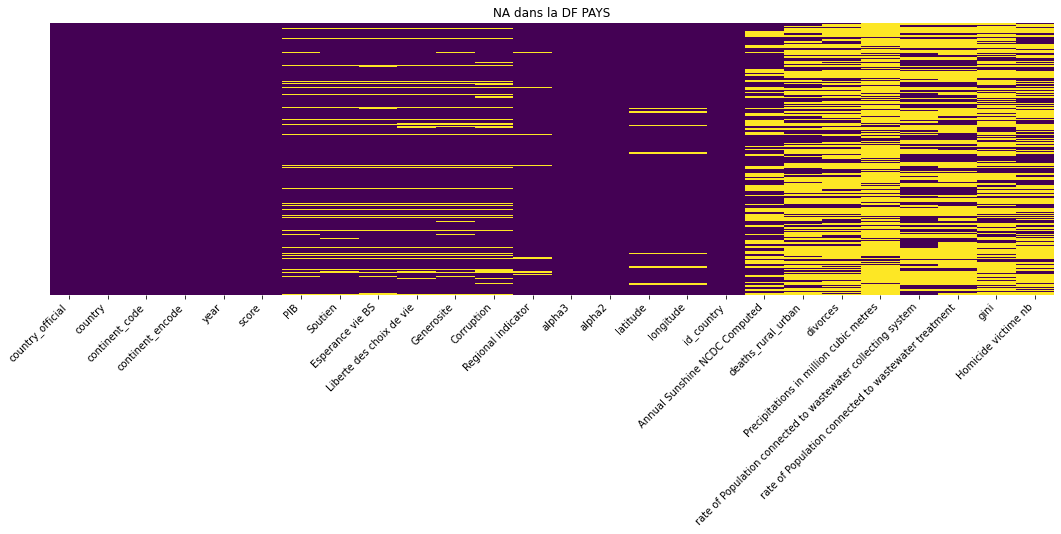

In [81]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_completed.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF PAYS")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.5. Création de la DF avec les moyennes par pays
</div>

In [82]:
group_cols = ['country_official', 'continent_code', 'alpha3', 'alpha2', 'latitude', 'longitude']
un_means_col = ['continent_encode', 'year', 'latitude', 'longitude', 'id_country']

mean_cols1 = get_numeric_columns_names(df_completed, verbose=verbose)
mean_cols = [c for c in mean_cols1 if c not in un_means_col]

if verbose:
   print(f"mean_cols : {mean_cols}")

mean_dic = {}
for c in mean_cols:
   if c not in group_cols:
      mean_dic[c] = ['mean']

if verbose:
   print(f"group_cols : {group_cols}")
   
df_mean = df_completed.groupby(group_cols, as_index=False).agg(mean_dic)
df_mean = df_mean.droplevel(1, axis=1) 
df_mean = df_mean.sort_values(by=['score'], ascending=False)
df_mean = df_mean.reset_index()
df_mean = df_mean.drop("index", axis=1)
print(df_mean.shape)
df_mean.head()

(156, 21)


country_official continent_code alpha3 alpha2   latitude   longitude  \
0   Kingdom of Denmark             EU    DNK     DK   1.288895  103.846500   
1  Republic of Finland             EU    FIN     FI  61.924110   25.748151   
2  Swiss Confederation             EU    CHE     CH  46.978735    8.637402   
3    Kingdom of Norway             EU    NOR     NO  52.650280   -7.249520   
4  Republic of Iceland             EU    ISL     IS -27.148133 -109.334378   

      score        PIB   Soutien  Esperance vie BS  ...  Generosite  \
0  7.681941  10.874063  0.957500         71.227688  ...    0.162467   
1  7.623067  10.743786  0.948786         71.224357  ...   -0.000071   
2  7.551500  11.088182  0.943182         73.376545  ...    0.114455   
3  7.506583  11.044545  0.950455         72.709182  ...    0.137636   
4  7.464273  10.856889  0.977222         72.880000  ...    0.256750   

   Corruption  Annual Sunshine NCDC Computed  deaths_rural_urban  \
0    0.196250                    1671.882353        53701.600000   
1    0.246714                    1636.460000        51914.000000   
2    0.306818                    1694.200000        66147.400000   
3    0.336727                     595.000000        40963.700000   
4    0.705444                    1106.400000         2183.444444   

       divorces  Precipitations in million cubic metres  \
0  15467.266667                            32412.250000   
1  13375.166667                           237160.833333   
2  17414.200000                            59760.400000   
3  10144.000000                           393671.000000   
4    549.000000                           168764.666667   

   rate of Population connected to wastewater collecting system  \
0                                          90.800000              
1                                          83.000000              
2                                                NaN              
3                                          85.658331              
4                                          92.000000              

   rate of Population connected to wastewater treatment       gini  \
0                                         100.014285     27.369231   
1                                         100.000000     27.372727   
2                                                NaN     32.750000   
3                                          98.175001     27.062500   
4                                         100.000000     27.350000   

   Homicide victime nb  
0              1142.40  
1              2000.25  
2              1020.60  
3               600.60  
4                47.25  

[5 rows x 21 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.7. TOP et FLOP
</div>

On extrait le top et le flop pour la suite des analyses

In [83]:
# Constitution du top 30 et du flop 20
top_30 = df_mean.head(30)
top_30.head()

country_official continent_code alpha3 alpha2   latitude   longitude  \
0   Kingdom of Denmark             EU    DNK     DK   1.288895  103.846500   
1  Republic of Finland             EU    FIN     FI  61.924110   25.748151   
2  Swiss Confederation             EU    CHE     CH  46.978735    8.637402   
3    Kingdom of Norway             EU    NOR     NO  52.650280   -7.249520   
4  Republic of Iceland             EU    ISL     IS -27.148133 -109.334378   

      score        PIB   Soutien  Esperance vie BS  ...  Generosite  \
0  7.681941  10.874063  0.957500         71.227688  ...    0.162467   
1  7.623067  10.743786  0.948786         71.224357  ...   -0.000071   
2  7.551500  11.088182  0.943182         73.376545  ...    0.114455   
3  7.506583  11.044545  0.950455         72.709182  ...    0.137636   
4  7.464273  10.856889  0.977222         72.880000  ...    0.256750   

   Corruption  Annual Sunshine NCDC Computed  deaths_rural_urban  \
0    0.196250                    1671.882353        53701.600000   
1    0.246714                    1636.460000        51914.000000   
2    0.306818                    1694.200000        66147.400000   
3    0.336727                     595.000000        40963.700000   
4    0.705444                    1106.400000         2183.444444   

       divorces  Precipitations in million cubic metres  \
0  15467.266667                            32412.250000   
1  13375.166667                           237160.833333   
2  17414.200000                            59760.400000   
3  10144.000000                           393671.000000   
4    549.000000                           168764.666667   

   rate of Population connected to wastewater collecting system  \
0                                          90.800000              
1                                          83.000000              
2                                                NaN              
3                                          85.658331              
4                                          92.000000              

   rate of Population connected to wastewater treatment       gini  \
0                                         100.014285     27.369231   
1                                         100.000000     27.372727   
2                                                NaN     32.750000   
3                                          98.175001     27.062500   
4                                         100.000000     27.350000   

   Homicide victime nb  
0              1142.40  
1              2000.25  
2              1020.60  
3               600.60  
4                47.25  

[5 rows x 21 columns]

In [84]:
flop_30 = df_mean.tail(30)
flop_30.tail()

country_official continent_code alpha3 alpha2   latitude  \
151                Rwandese Republic             AF    RWA     RW  -7.239409   
152              Republic of Burundi             AF    BDI     BI  36.761879   
153         Central African Republic             AF    CAF     CF  22.601014   
154  Islamic Republic of Afghanistan             AS    AFG     AF  29.276770   
155          Republic of South Sudan             AF    SDS     SS  22.594127   

      longitude     score       PIB   Soutien  Esperance vie BS  ...  \
151  112.625986  3.589867  7.477786  0.609000         58.109929  ...   
152    3.025798  3.434727  6.677143  0.438429         51.625714  ...   
153   88.418865  3.432778  6.905000  0.388500         43.663333  ...   
154   42.274721  3.375333  7.640571  0.502429         52.305929  ...   
155   88.412452  3.218857  7.425000  0.554600         50.528000  ...   

     Generosite  Corruption  Annual Sunshine NCDC Computed  \
151    0.019385    0.184500                            NaN   
152   -0.032143    0.696571                            NaN   
153    0.036167    0.850333                            NaN   
154    0.045929    0.855571                            NaN   
155    0.017000    0.752200                            NaN   

     deaths_rural_urban  divorces  Precipitations in million cubic metres  \
151                 NaN       NaN                            32428.665039   
152                 NaN       NaN                                     NaN   
153                 NaN       NaN                           900370.125000   
154                 NaN       NaN                                     NaN   
155                 NaN       NaN                                     NaN   

     rate of Population connected to wastewater collecting system  \
151                                                NaN              
152                                                NaN              
153                                                NaN              
154                                                NaN              
155                                                NaN              

     rate of Population connected to wastewater treatment  gini  \
151                                                NaN     44.4   
152                                           4.444444      NaN   
153                                                NaN      NaN   
154                                                NaN      NaN   
155                                                NaN     44.1   

     Homicide victime nb  
151                  NaN  
152             11620.00  
153                  NaN  
154             55560.75  
155                  NaN  

[5 rows x 21 columns]

In [85]:
df_completed = process_one_hot(df_completed, col="continent_code", verbose=verbose)
df_completed

country_official                  country continent_code  \
0     Arab Republic of Egypt                    Egypt             AF   
1     Arab Republic of Egypt                    Egypt             AF   
2     Arab Republic of Egypt                    Egypt             AF   
3     Arab Republic of Egypt                    Egypt             AF   
4     Arab Republic of Egypt                    Egypt             AF   
...                      ...                      ...            ...   
2354  the State of Palestine  Palestinian Territories             AS   
2355  the State of Palestine  Palestinian Territories             AS   
2356  the State of Palestine  Palestinian Territories             AS   
2357  the State of Palestine  Palestinian Territories             AS   
2358  the State of Palestine  Palestinian Territories             AS   

      continent_encode  year  score    PIB  Soutien  Esperance vie BS  \
0                    0  2005  5.168  9.036    0.848             59.70   
1                    0  2007  5.541  9.135    0.686             59.82   
2                    0  2008  4.632  9.186    0.738             59.88   
3                    0  2009  5.066  9.213    0.744             59.94   
4                    0  2010  4.669  9.244    0.769             60.00   
...                ...   ...    ...    ...      ...               ...   
2354                 1  2018  4.554    NaN    0.819               NaN   
2355                 1  2019  4.483    NaN    0.833               NaN   
2356                 1  2020  4.553  8.389    0.825             62.25   
2357                 1  2021  4.517  8.485    0.826             62.25   
2358                 1  2022  4.483    NaN      NaN               NaN   

      Liberte des choix de vie  ...  \
0                        0.817  ...   
1                        0.609  ...   
2                          NaN  ...   
3                        0.611  ...   
4                        0.486  ...   
...                        ...  ...   
2354                     0.655  ...   
2355                     0.653  ...   
2356                     0.646  ...   
2357                     0.653  ...   
2358                       NaN  ...   

      rate of Population connected to wastewater collecting system  \
0                                                   NaN              
1                                                   NaN              
2                                                   NaN              
3                                                   NaN              
4                                                   NaN              
...                                                 ...              
2354                                          53.900002              
2355                                          53.900002              
2356                                          53.900002              
2357                                          53.900002              
2358                                          53.900002              

      rate of Population connected to wastewater treatment gini  \
0                                                   NaN     NaN   
1                                                   NaN     NaN   
2                                                   NaN     NaN   
3                                                   NaN     NaN   
4                                                   NaN     NaN   
...                                                 ...     ...   
2354                                                NaN     NaN   
2355                                                NaN     NaN   
2356                                                NaN     NaN   
2357                                                NaN     NaN   
2358                                                NaN     NaN   

     Homicide victime nb continent_code_AF  continent_code_AS  \
0                10962.0               1.0                0.0   
1                14280.0 

<div style="display: flex; background-color: Blue; padding: 15px;" >

# 3.Exploration des données
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.1. Exploration générale
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.1.1. Histogrammes de la DF
</div>

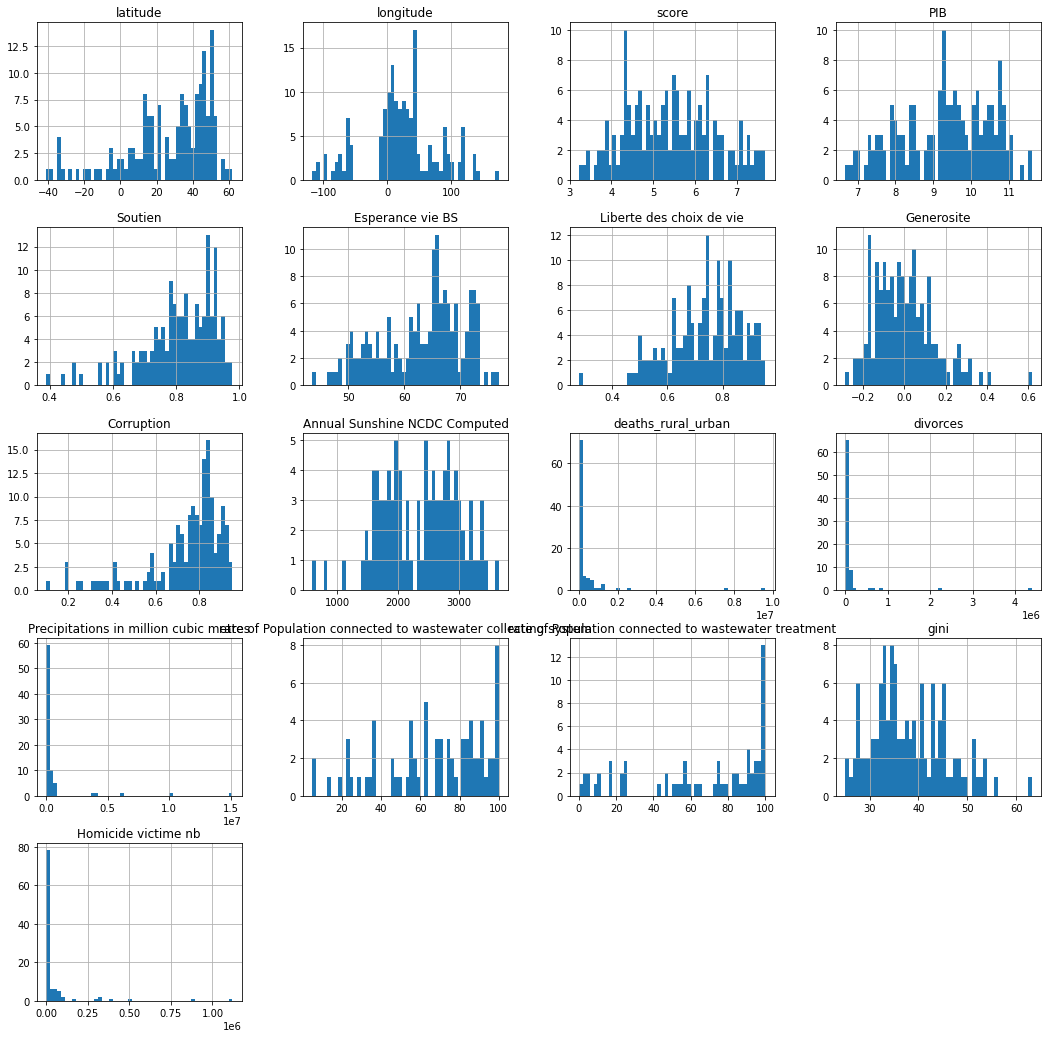

In [88]:
df_mean.hist(figsize=(18,18),bins=50)
figure.set_size_inches(18, 15, forward=True)
plt.show()

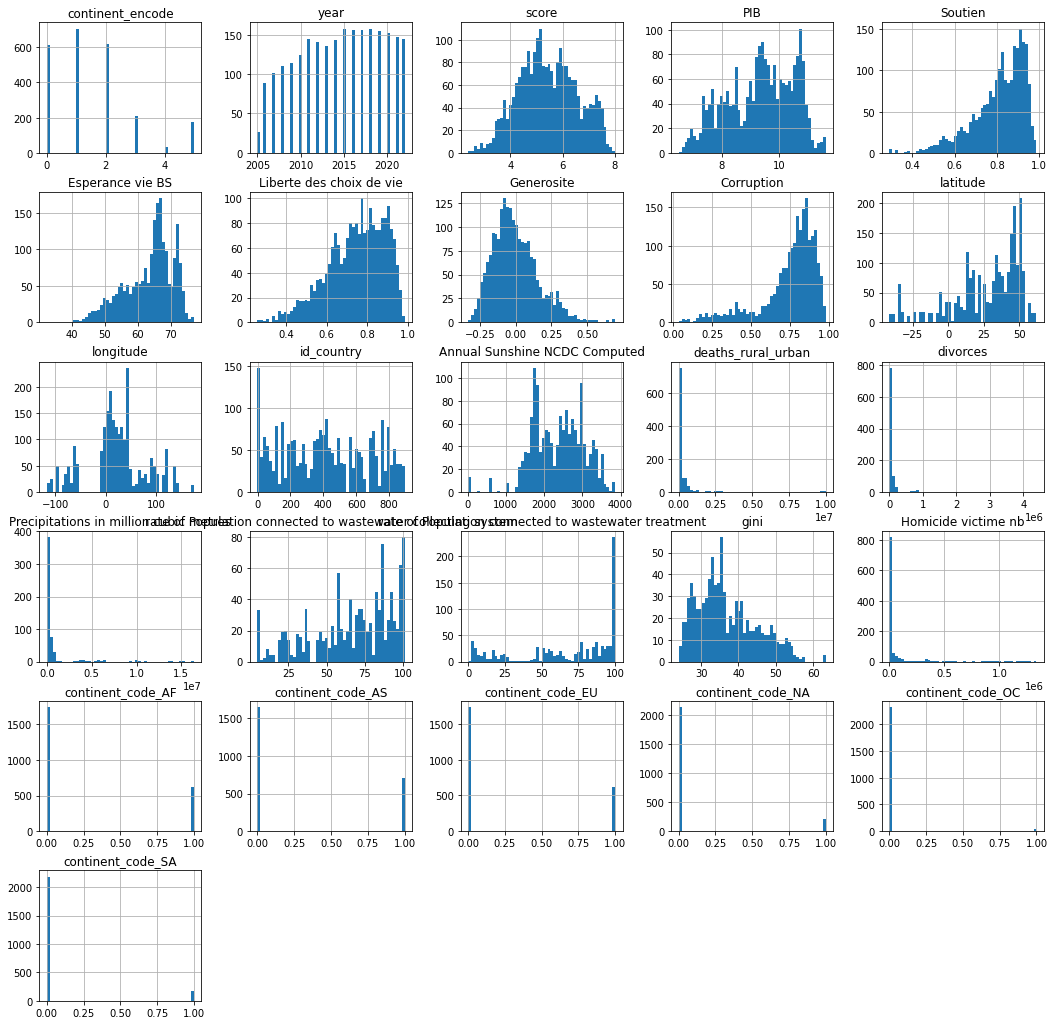

In [89]:
df_completed.hist(figsize=(18,18),bins=50)
figure.set_size_inches(18, 15, forward=True)
plt.show()

<div style="display: flex; background-color: indigo;" >

#### 3.1.2. Corrélations
</div>

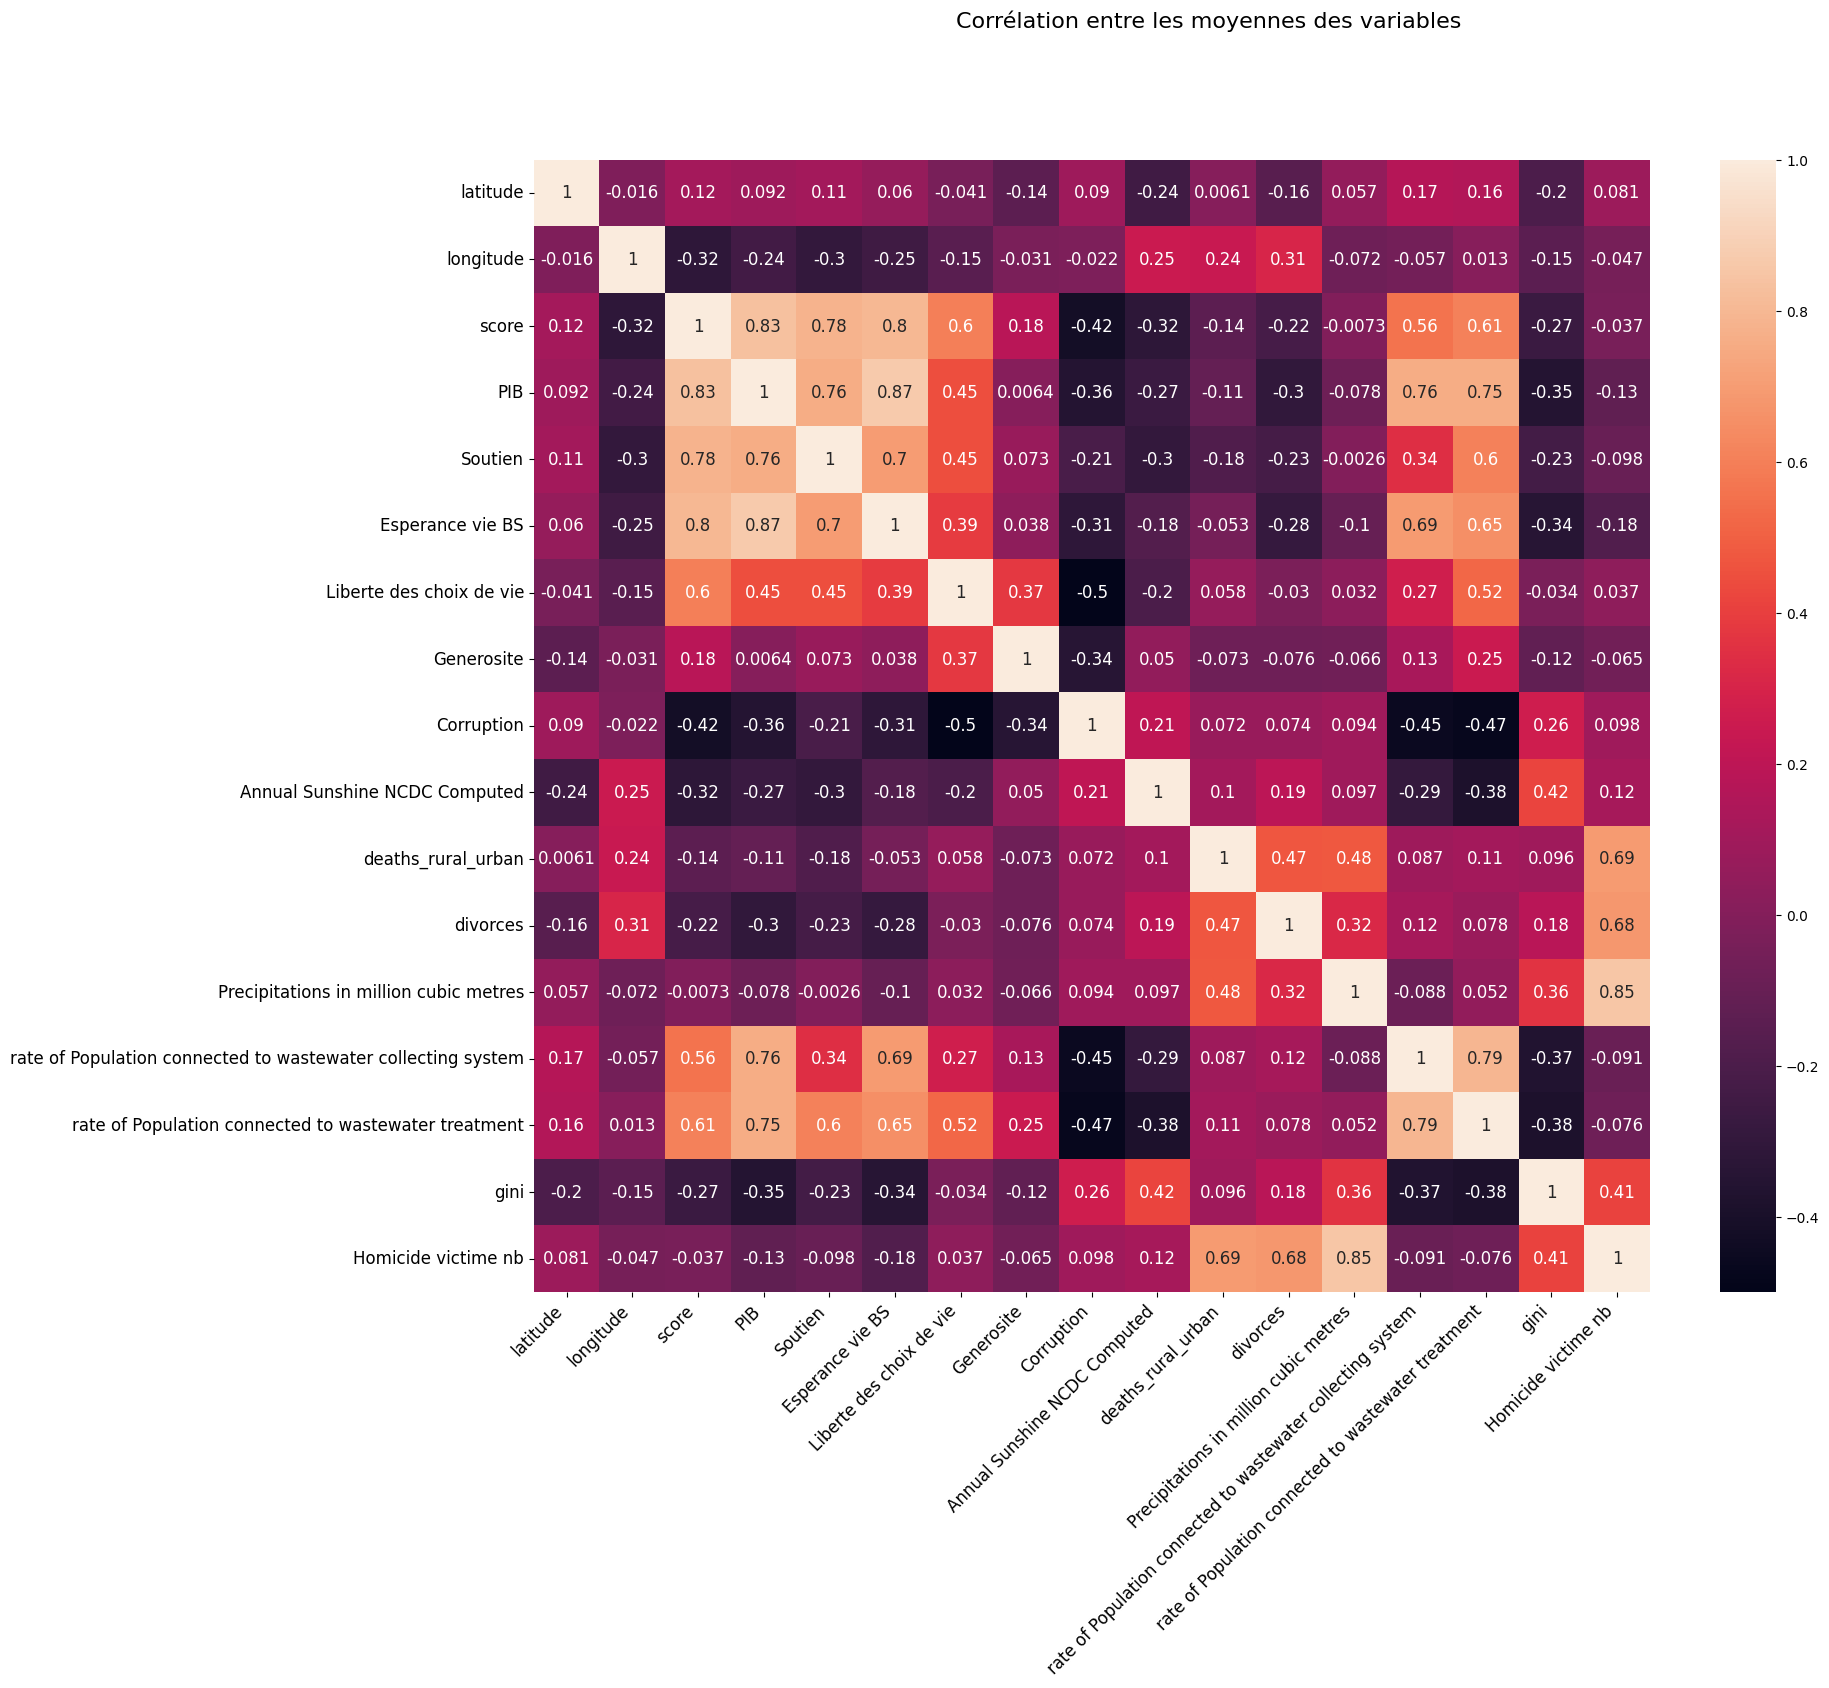

In [90]:
draw_correlation_graphe(df_mean, "Corrélation entre les moyennes des variables", verbose=verbose,fontsize=12)

On constate que les corrélations sont mieux marquées sur la df avec les moyennes des données.

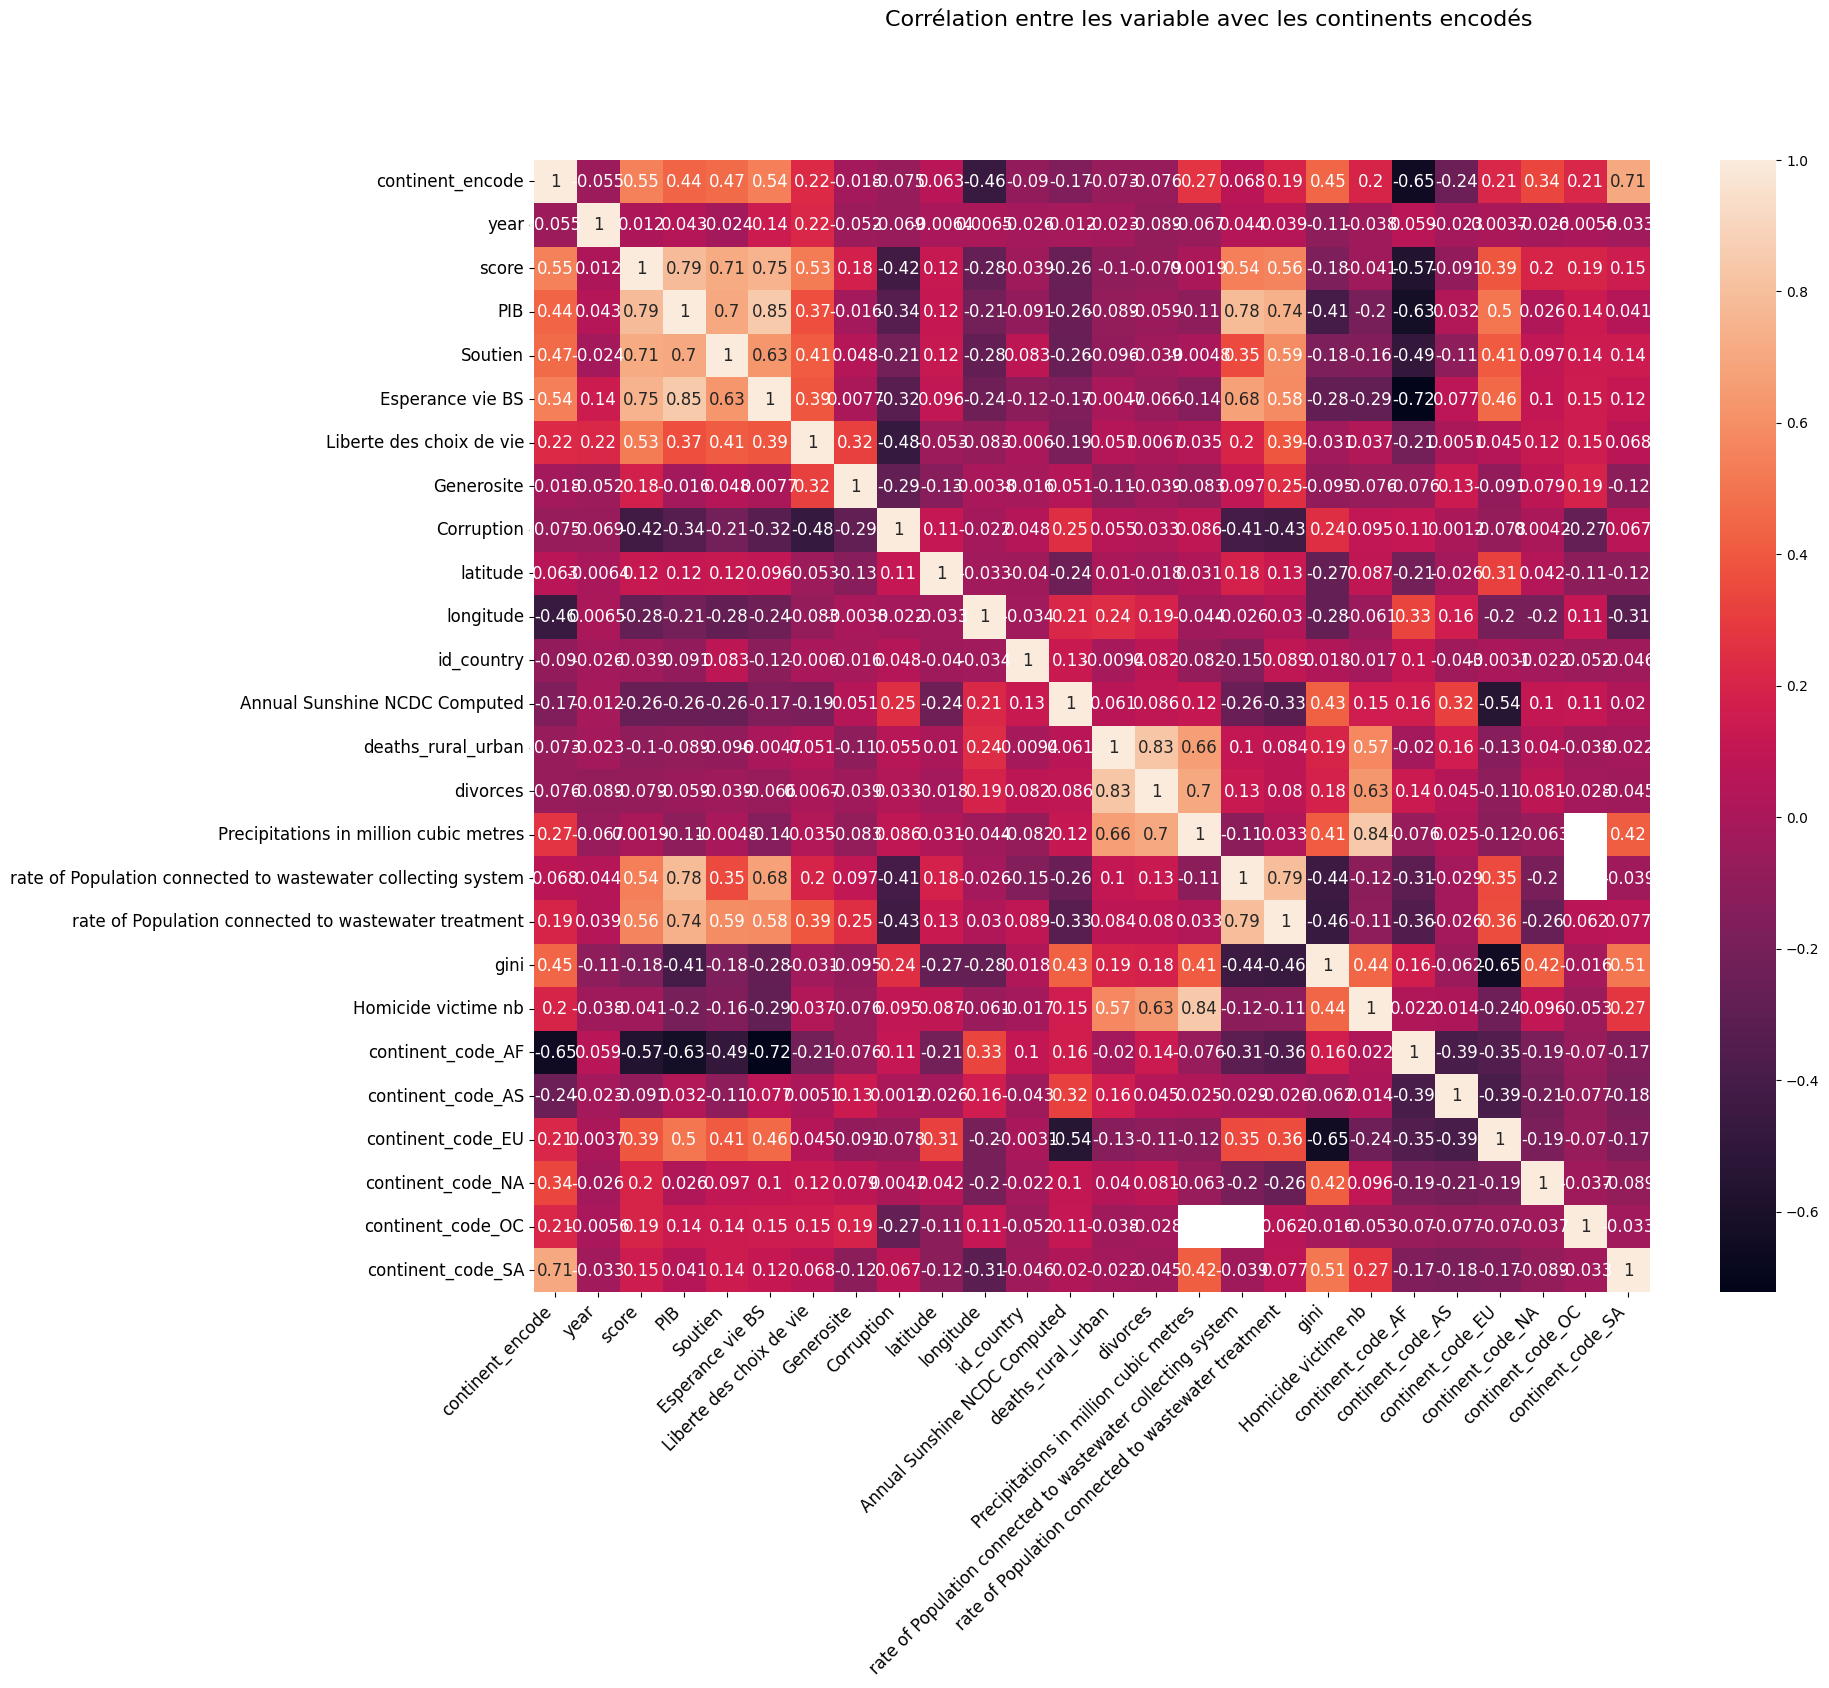

In [91]:
draw_correlation_graphe(df_completed, "Corrélation entre les variable avec les continents encodés", verbose=verbose,fontsize=12)

Fonctionnellement nous avons un préssentiment qu'il y a une corrélation entre les continents et le score.

Numériquement, l'encodage via LabelEncoder montre une corrélation, mais elle est faussée du fait qu'elle implique une comparaison possible entre les continents.

Afin d'éviter une comparaison numérique entre les pays, nous avons utilisé OneHotEncoder pour séparer les continents et éviter une comparaison, cependant ceci implique que les continents ne sont plus exclusif entre eux.

L'équivalent de la corrélation fonctionnelle est donc un mixte de ces 2 représentations, qui reste difficile à mettre en évidence.

<div style="display: flex; background-color: indigo;" >

#### 3.1.3. Visualisation des outliers
</div>

In [49]:
df_completed.columns

Index(['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'Regional indicator', 'alpha3', 'alpha2', 'latitude', 'longitude',
       'id_country', 'Annual Sunshine NCDC Computed', 'deaths_rural_urban',
       'divorces', 'Precipitations in million cubic metres',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb', 'continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_NA', 'continent_code_OC',
       'continent_code_SA'],
      dtype='object')

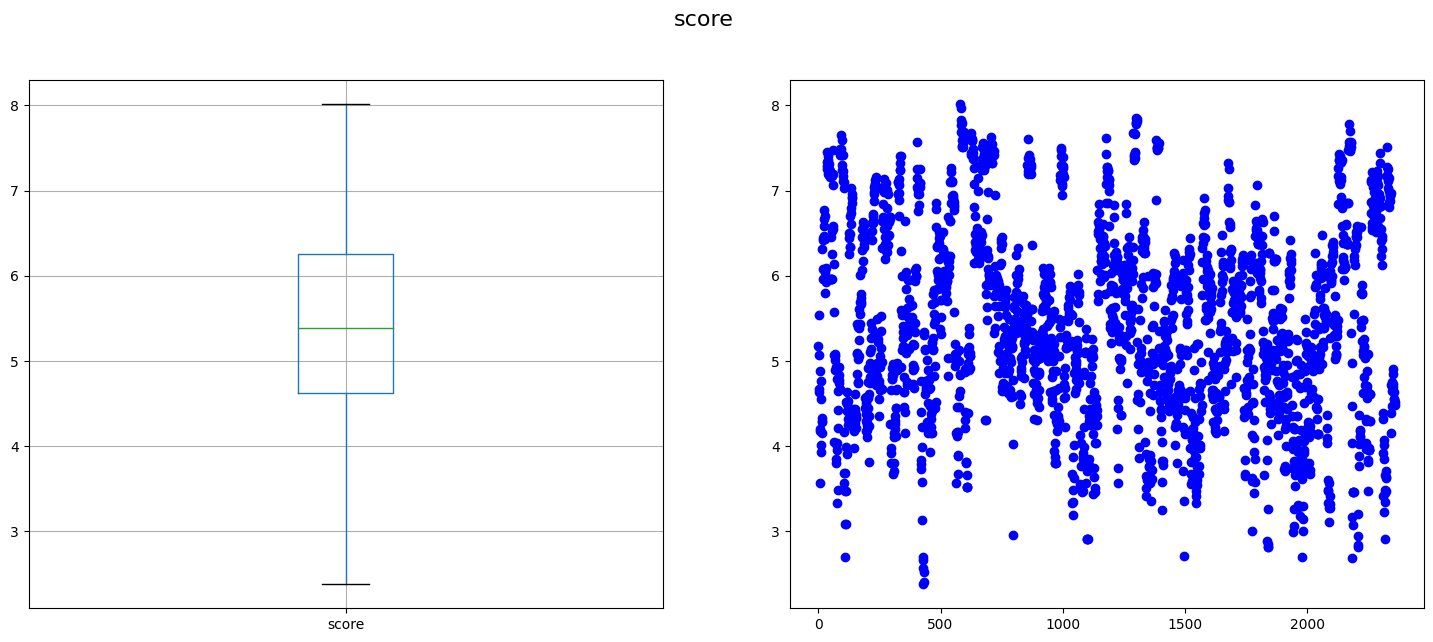

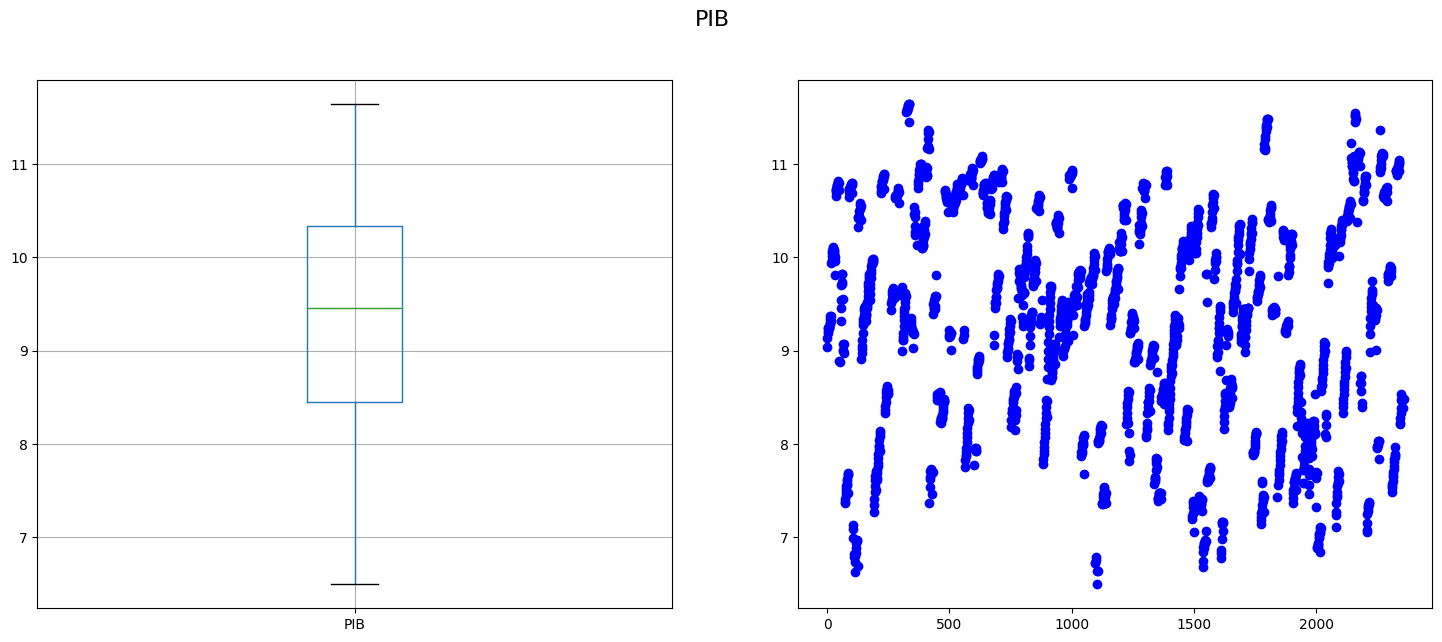

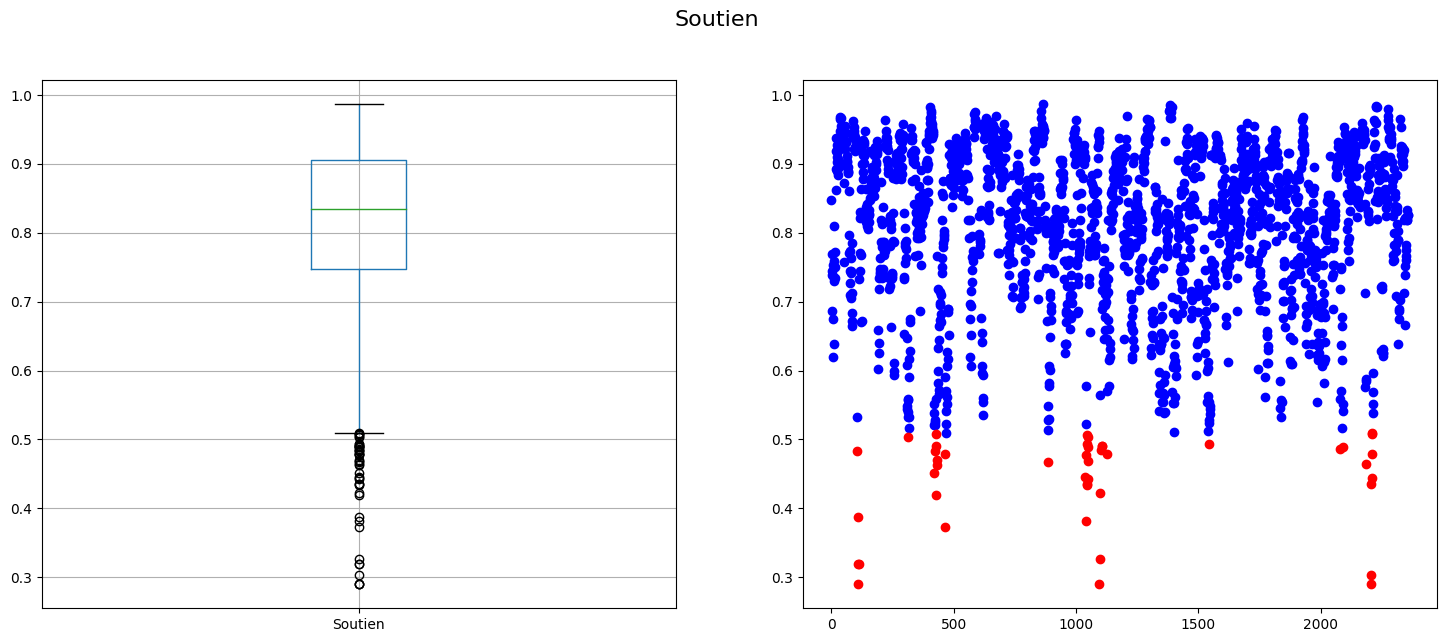

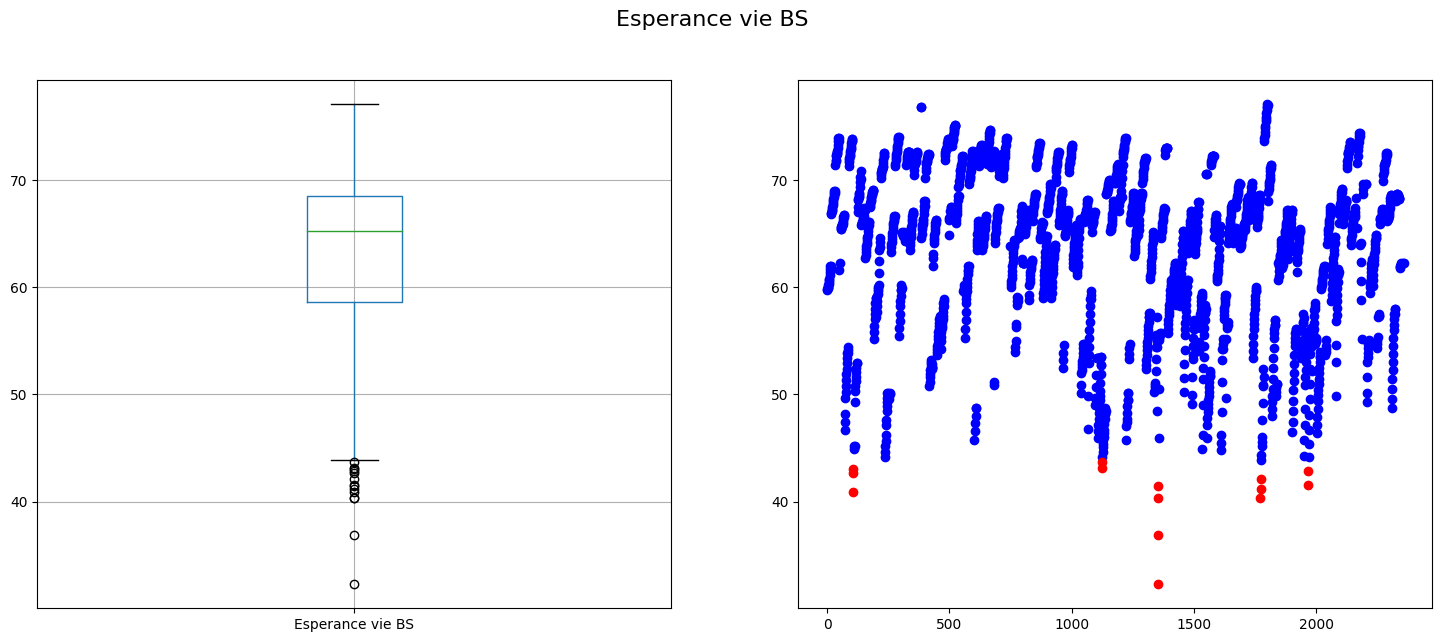

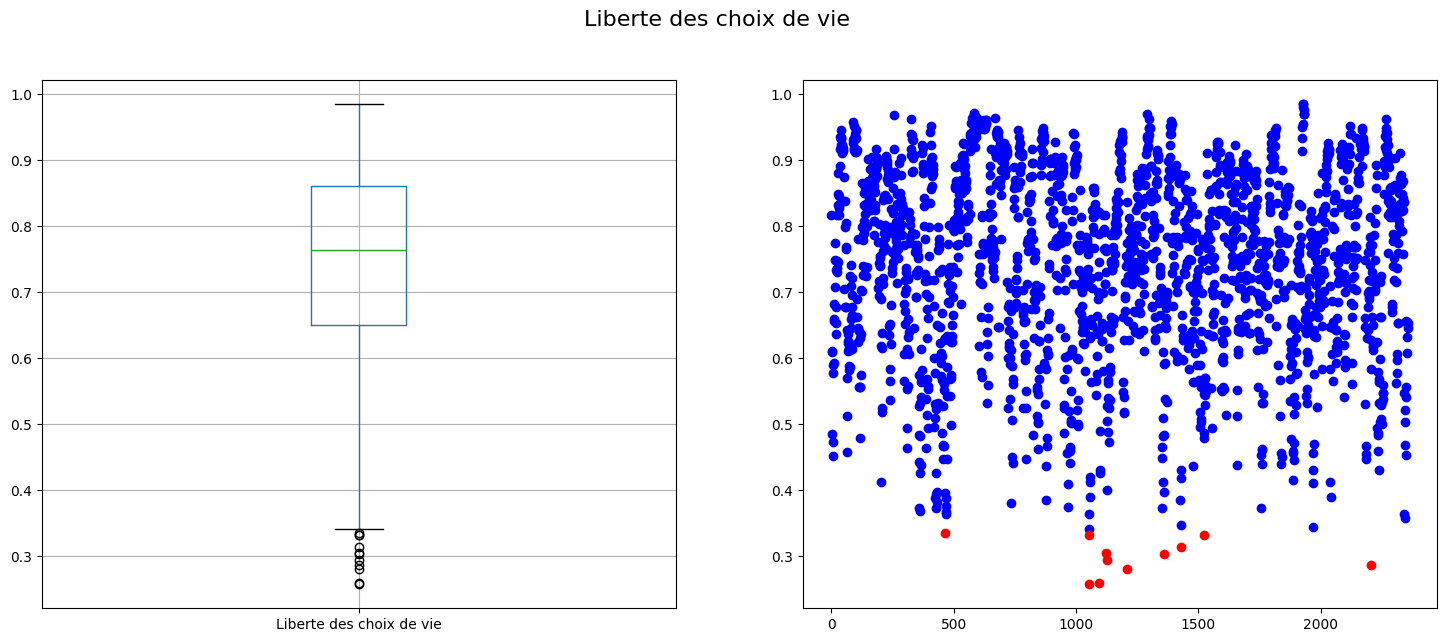

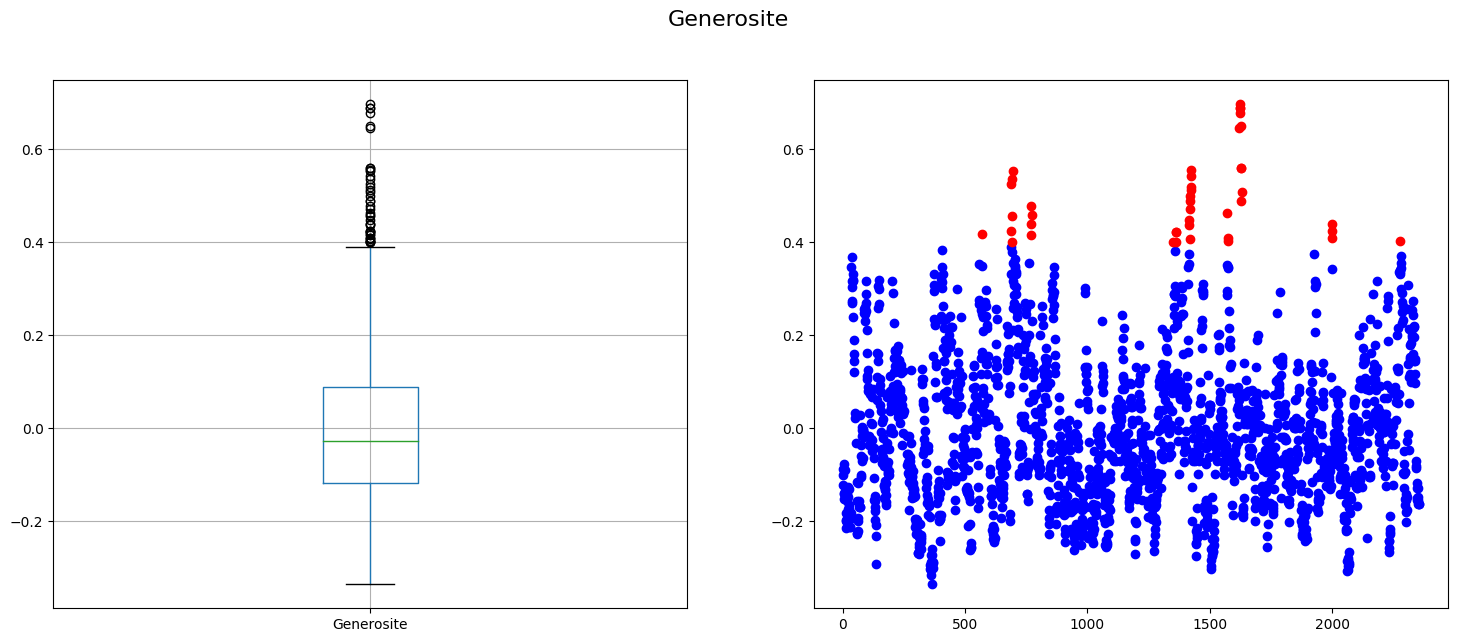

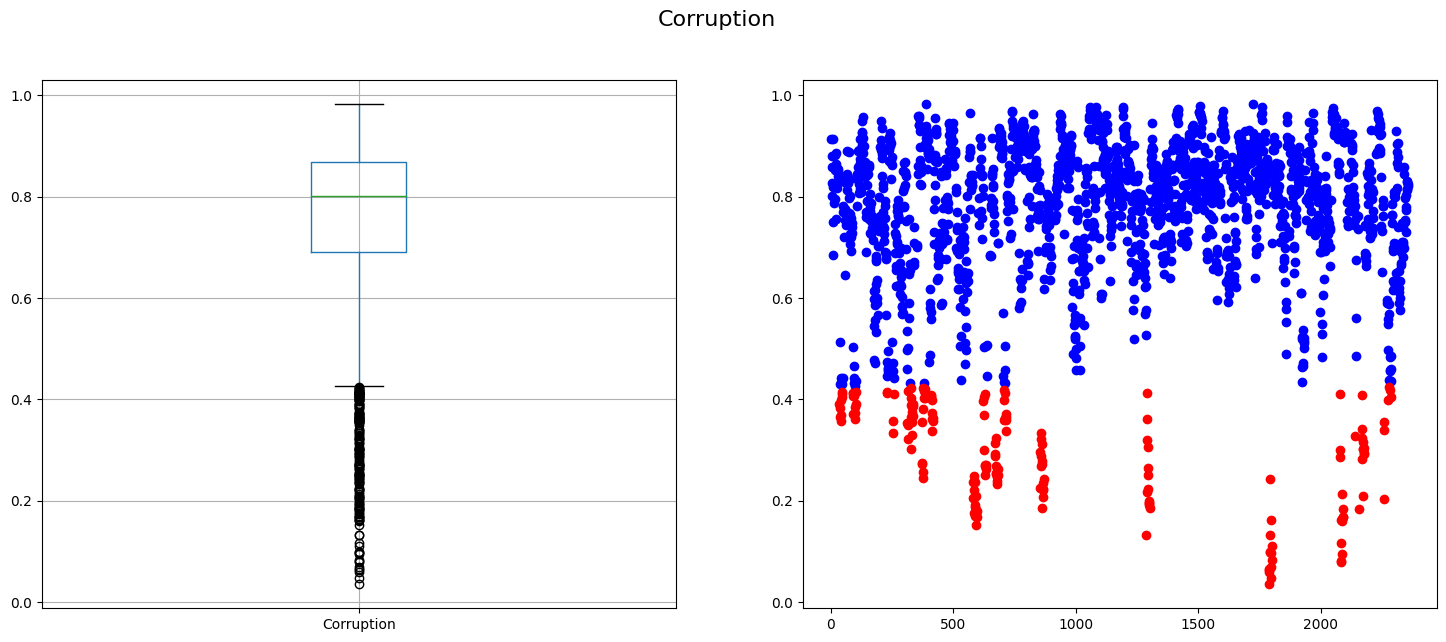

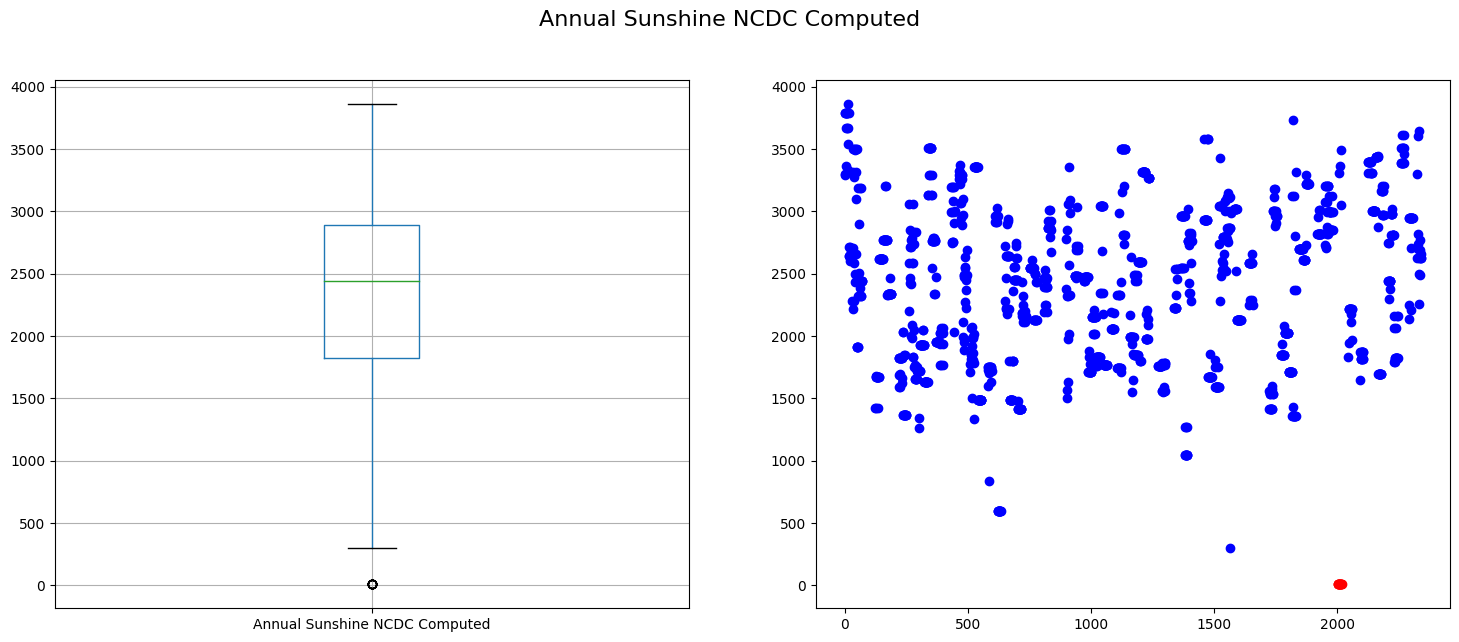

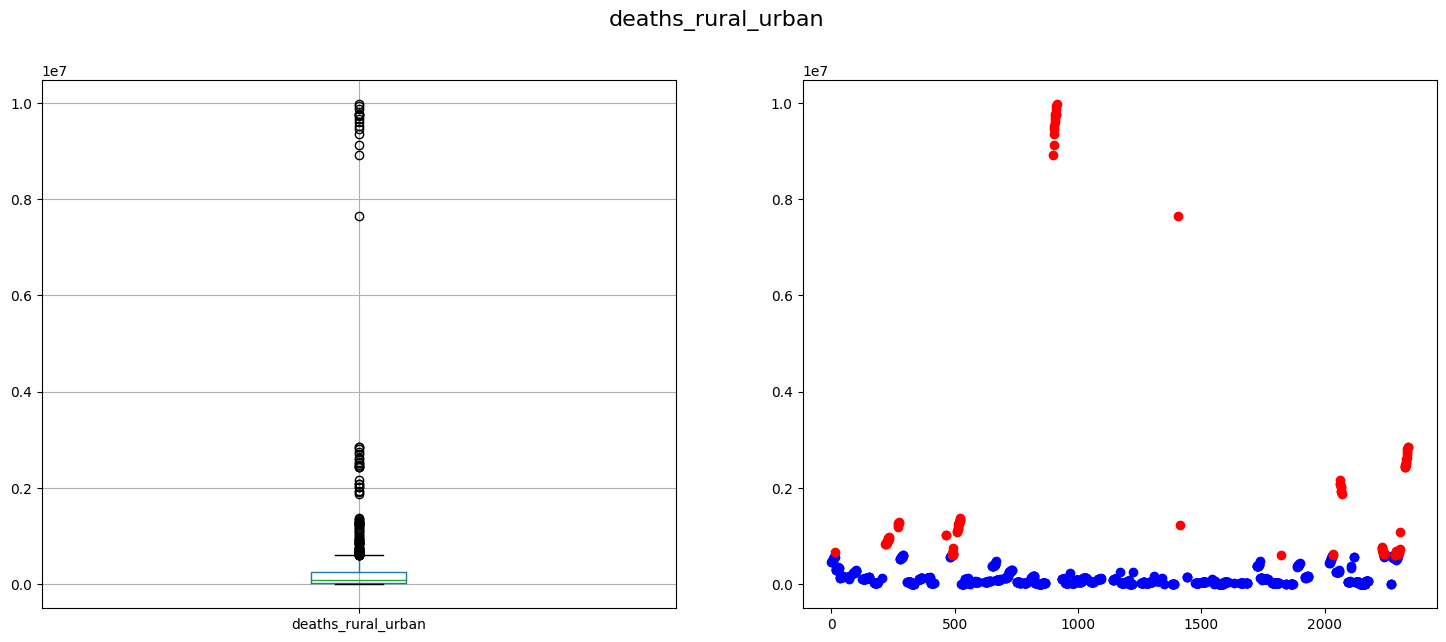

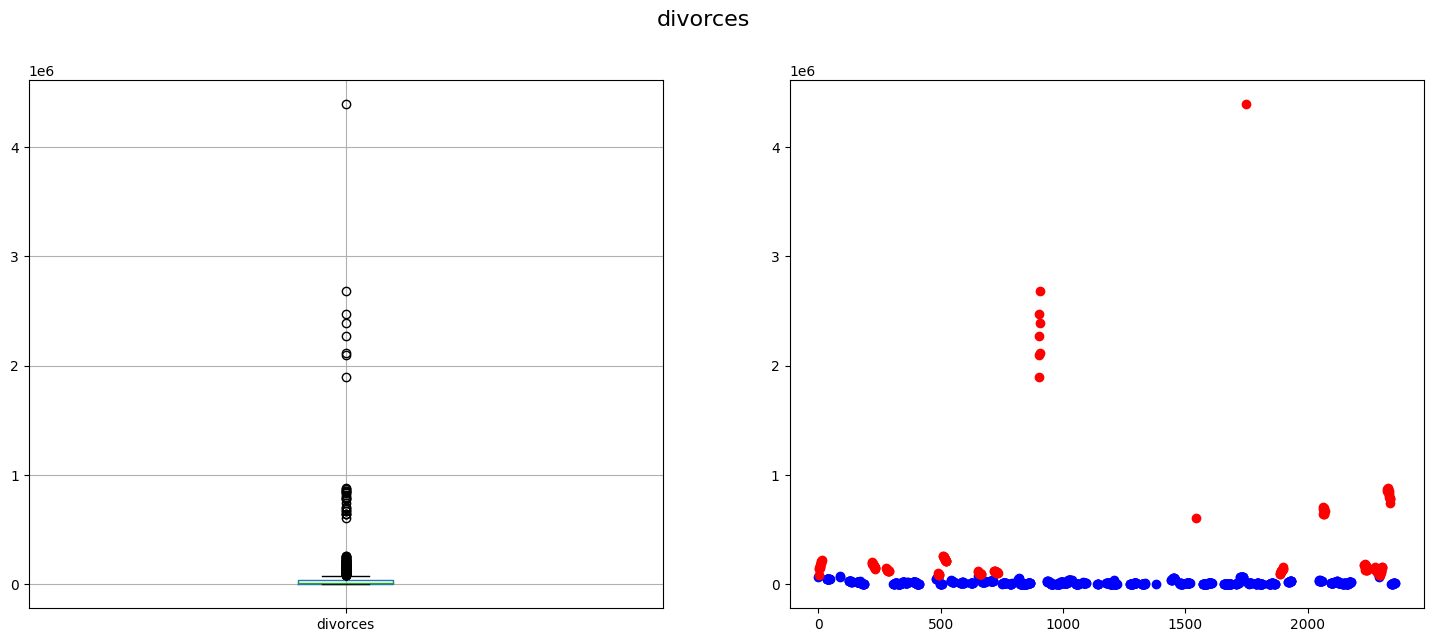

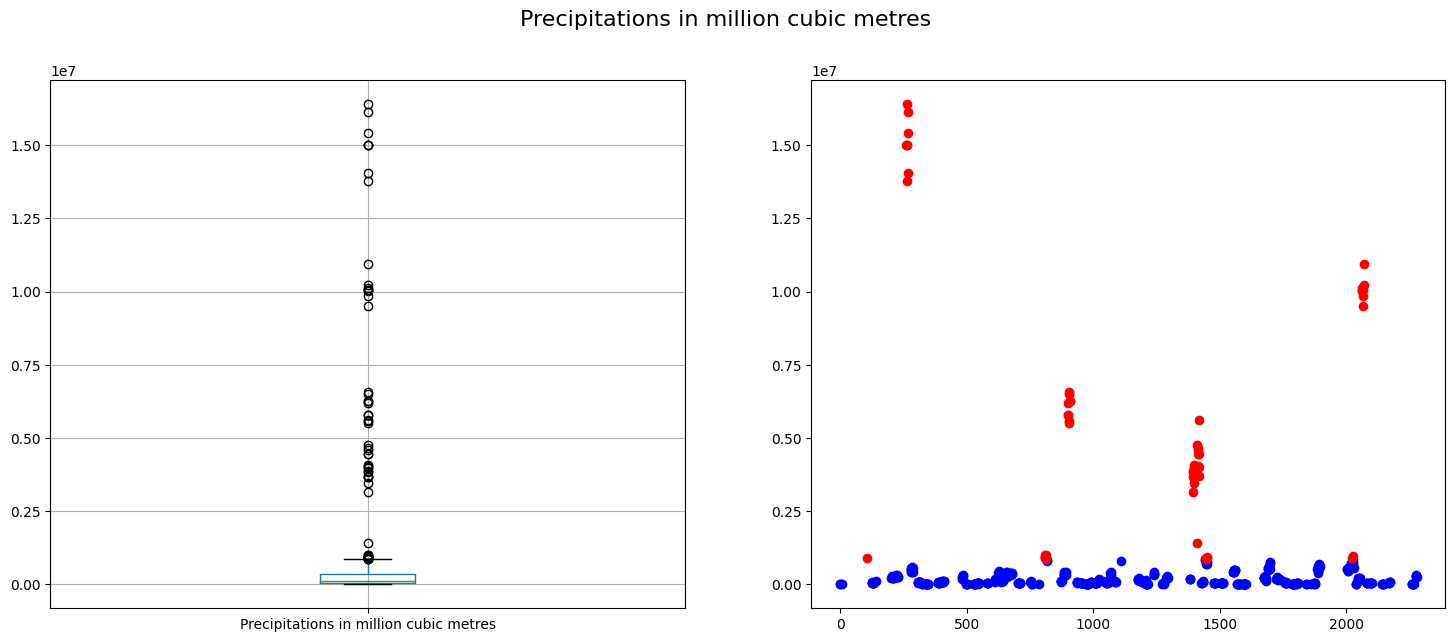

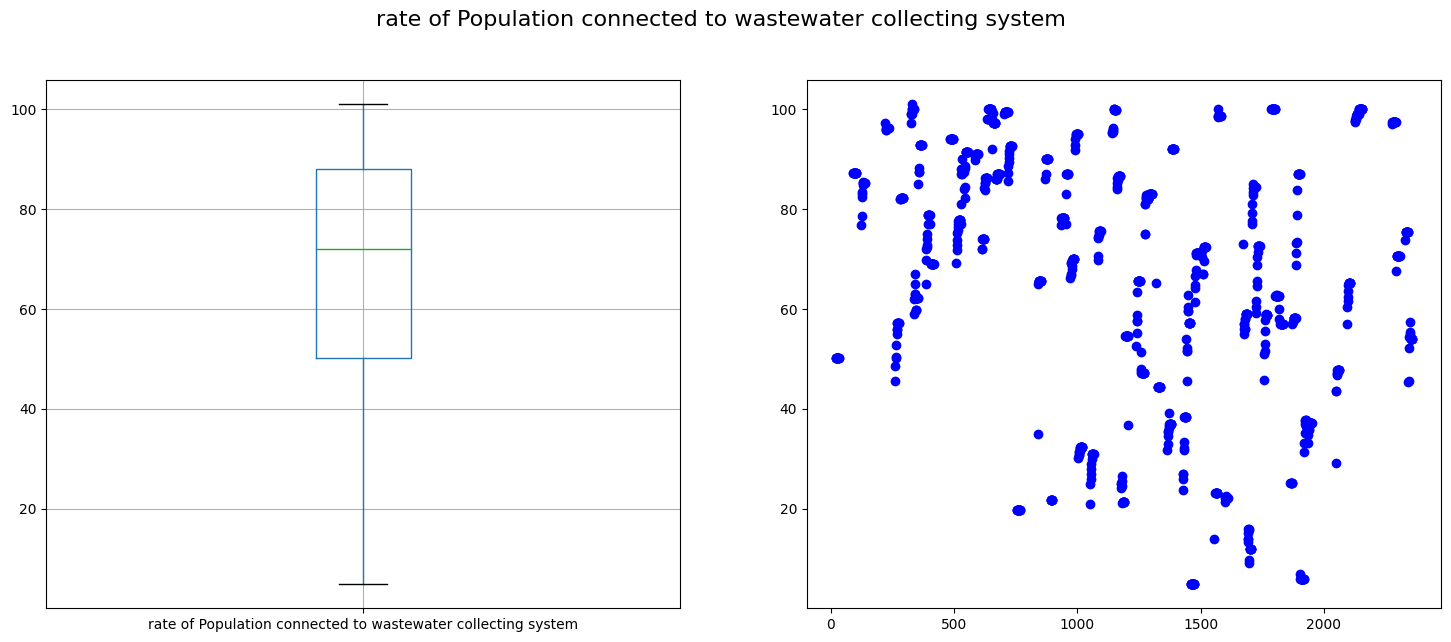

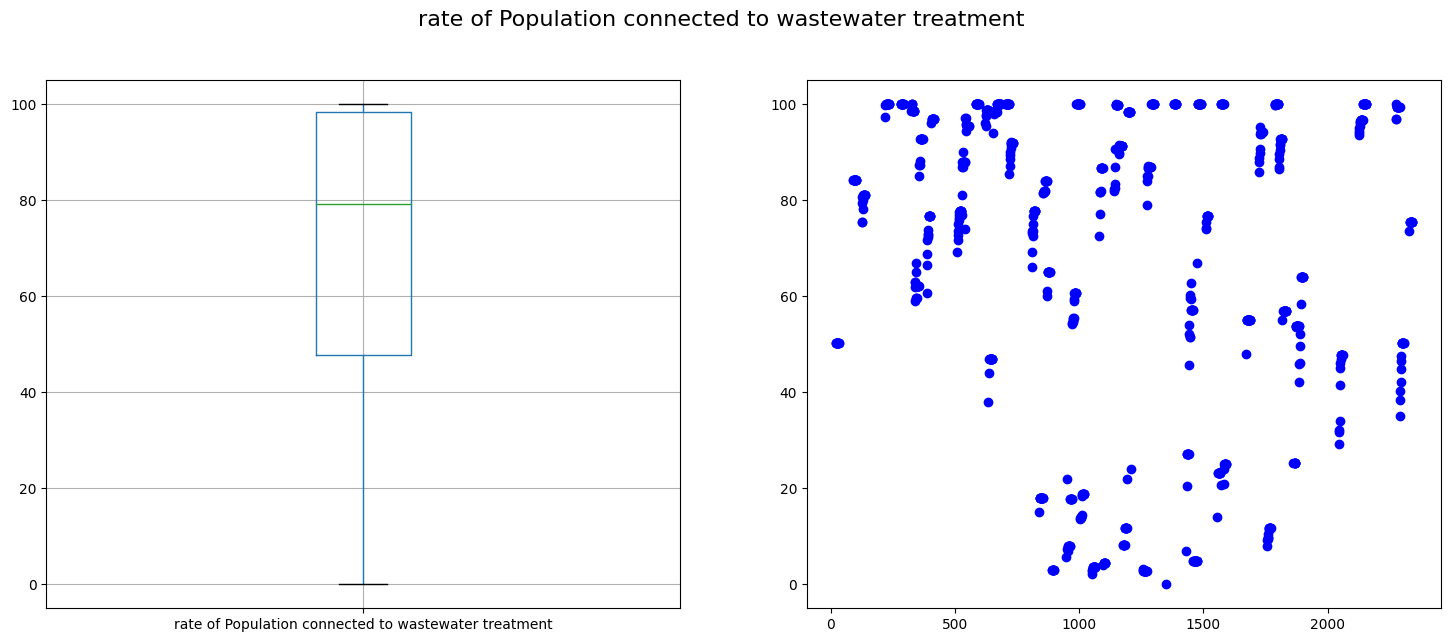

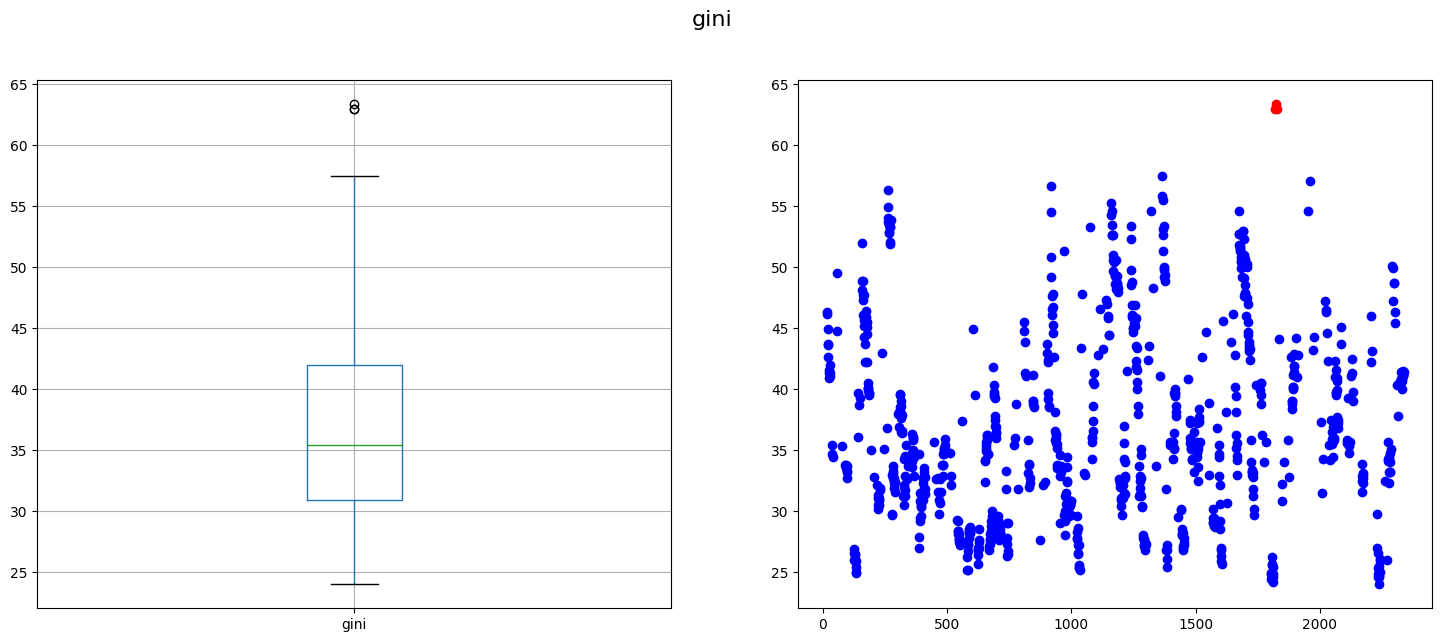

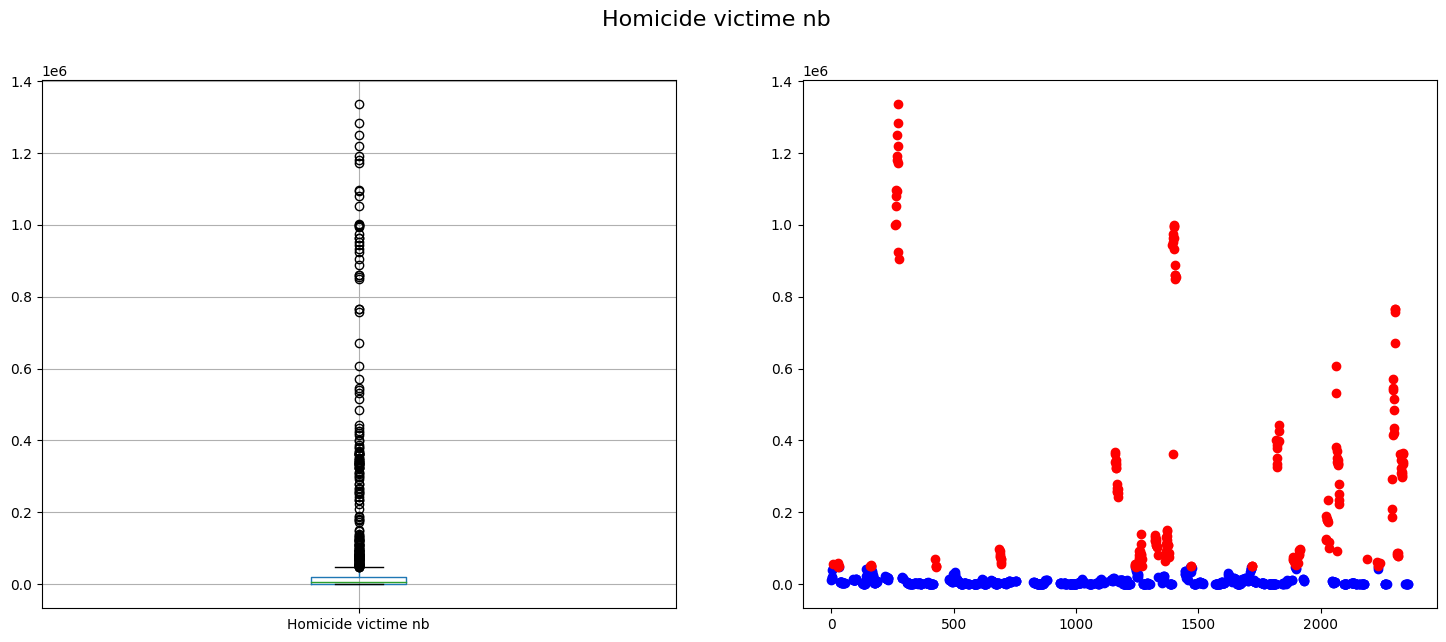

In [92]:
cols = get_numeric_columns_names(df_completed)
to_remove = ['year', 'continent_encode', 'latitude', 'longitude','id_country','continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_NA', 'continent_code_OC','continent_code_SA']
for c in to_remove:
    cols.remove(c)

for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(df_completed, column_name)
    graphe_outliers(df_completed, column_name, q_min, q_max)

Suite à une première analyse, certaines données ont été identifiées comme incohérentes :
- `espérence de vie BS` = 0 pour 2022 => les données complémentaires au score pour 2022 sont la part de la données dans le score, et non la valeur de la variable, remplacement par NaN pour 2022
- `espérence de vie BS` < 40 à Haiti en 2010 et 2011 : 
   > - Séisme de 2010 à Haïti : Le 12 janvier 2010, à 16h53, un séisme de magnitude 7 ébranle la capitale haïtienne Port-au-Prince. La secousse a duré moins de 30 secondes mais la ville n'est plus qu'un amas de ruines. Des centaines de corps gisent dans les rues.
- `espérence de vie BS` < 45 
   - à Nigeria en 2006 et 2007 :
     > - Crash d'avion fin 2005
     > - La guerre : Nigerian troops begin to pull out of Bakassi; Bakassi becomes Cameroonian territory.
     > - Terrorisme et délinquance : A pipeline explosion on the outskirts of Lagos kills about 100 people. 
     > - Chômage : The Nigerian government announces it will lay off one in five civil servants, amounting to over 33,000 jobs 
   - à Zambie en 2006 :
     > - Crash d'avion en 2005 : 13 officiers tués dans le crash d'un avion militaire
     > - Élection présidentielle zambienne de 2006
     > - 2005 February - Supreme Court rejects opposition challenge to President Mwanawasa's 2001 election victory, but says ballot had flaws.
     > - 2005 April - World Bank approves $3.8 billion debt relief package which will write off more than 50% of Zambia's debt.
     > - Around 50 workers killed in explosion at Chinese-owned explosives factory.
     > - 2005 November - President Mwanawasa declares a national disaster and appeals for food aid. He says more than a million Zambians face food shortages owing to drought.
     > - 2006 April - President Mwanawasa suffers a minor stroke. He resumes "light duties" after some weeks and later declares himself fit to run for re-election towards the end of the year.
     > - 2006 September - President Mwanawasa wins a second term.
     > - 2006 October - President announces discovery of oil in the west. 
   - à Chad en 2008 :
     > - Guerre 
   
- L'indice de `Gini` > 60 : seul 'Republic of South Africa' est concerné => gardé
- `Soutien` < 0.52 : 13 pays concernés de 2 continents (AF, AS) sur 16 années => semble cohérent
- `Liberte des choix de vie` :
  - Pakistan 2008 (pour 2007) :
     > - A state of emergency was declared by President of Pakistan Pervez Musharraf on 3 November 2007 and lasted until 15 December 2007, during which the constitution of Pakistan was suspended. When the state of emergency was declared, Musharraf controversially held both positions of President and Chief of Army Staff.
  - Bosnia and Herzegovina 2007 / 2009 / 2011 :
     > - Terrorisme
     > - Guerre
     > - 2010 : jugement des crimes de guerre / 'Corpses of more than 50 people are unearthed in Perućac lake on the border between Bosnia and Herzegovina and Serbia by investigators looking for people who were killed during the Bosnian War.'
  - Burundi : 2008
     > - The Burundian Civil War was a civil war in Burundi lasting from 1993 to 2005.
     > - De 2005 à 2008 : traitement des suites de la guerre
     > - 2009 : Période de paix
  - Cuba : 2006
     > - 2005 : Around 200 dissidents hold a public meeting, which its organizers call the first such gathering since the 1959 revolution.
     > - 2005 : Hurricane Dennis causes widespread destruction in Cuba and leaves 16 people dead. 
- `Annual Sunshine NCDC Computed`
  - L'une des valeurs du Mali n'est pas cohérente pour l'ensoleillement, pour l'année 2021 : 298.7 alors que toutes les autres années sont autour entre 2800 et 3000 => correction en mettant la moyenne de l'année précédente et de l'année suivante
  - Niger 2006, 2009, 2012, 2022 < 10 : les données sont erronées. Le Niger est entre le Mali et le Tchad, donc décision d'imputer l'ensoleillement avec la moyenne des valeurs de ces 2 pays par année.

In [56]:
df_completed.columns

Index(['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'Regional indicator', 'alpha3', 'alpha2', 'latitude', 'longitude',
       'id_country', 'Annual Sunshine NCDC Computed', 'deaths_rural_urban',
       'divorces', 'Precipitations in million cubic metres',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb', 'continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_NA', 'continent_code_OC',
       'continent_code_SA'],
      dtype='object')

In [140]:
# L'une des valeurs du Mali n'est pas cohérente pour l'ensoleillement, pour l'année 2021 : 298.7 alors que toutes les autres années sont autour entre 2800 et 3000
moyenne_20_22 = np.mean(df_completed.loc[(df_completed['country_official']=='Republic of Mali') & ((df_completed['year']==2020) | (df_completed['year']==2022)), 'Annual Sunshine NCDC Computed'].values)
df_completed.loc[(df_completed['country_official']=='Republic of Mali') & (df_completed['year']==2021), 'Annual Sunshine NCDC Computed'] = moyenne_20_22

In [146]:
annee_max

2022

In [147]:
# Correction des données du Mali avec la moyenne des pays voisins sur la même latitude
for y in range(annee_min, annee_max+1):
    moyenne_voisins = np.nan
    try:
        moyenne_voisins = np.mean(df_completed.loc[((df_completed['country_official']=='Republic of Mali') | (df_completed['country_official']=='Republic of Chad')) & (df_completed['year']==y), 'Annual Sunshine NCDC Computed'].values)
    except:
        moyenne_voisins = np.nan
    df_completed.loc[(df_completed['country_official']=='Republic of Mali') & (df_completed['year']==y)] = moyenne_voisins

In [115]:
column_name = 'Annual Sunshine NCDC Computed'
df_gini_vie_supp_60 = df_completed.loc[df_completed[column_name]<10, ['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', column_name]]
df_gini_vie_supp_60 = df_gini_vie_supp_60.sort_values(by=["score"], ascending=False)
print(df_gini_vie_supp_60.shape)
df_gini_vie_supp_60.sort_values(by=["country_official", "year"])

(4, 7)


country_official country continent_code  continent_encode  year  \
2003  Republic of the Niger   Niger             AF                 0  2006   
2006  Republic of the Niger   Niger             AF                 0  2009   
2009  Republic of the Niger   Niger             AF                 0  2012   
2019  Republic of the Niger   Niger             AF                 0  2022   

      score  Annual Sunshine NCDC Computed  
2003  3.737                            8.8  
2006  4.267                            8.7  
2009  3.798                            9.1  
2019  5.003                            8.7

In [141]:
c_name = "Mali"
df_completed.loc[df_completed['country_official'].str.contains(c_name), ['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', column_name]].sort_values(by=["country_official", "year"])

country_official country continent_code  continent_encode  year  score  \
1553  Republic of Mali    Mali             AF                 0  2006  4.014   
1554  Republic of Mali    Mali             AF                 0  2008  4.115   
1555  Republic of Mali    Mali             AF                 0  2009  3.977   
1556  Republic of Mali    Mali             AF                 0  2010  3.762   
1557  Republic of Mali    Mali             AF                 0  2011  4.667   
1558  Republic of Mali    Mali             AF                 0  2012  4.313   
1559  Republic of Mali    Mali             AF                 0  2013  3.676   
1560  Republic of Mali    Mali             AF                 0  2014  3.975   
1561  Republic of Mali    Mali             AF                 0  2015  4.582   
1562  Republic of Mali    Mali             AF                 0  2016  4.016   
1563  Republic of Mali    Mali             AF                 0  2017  4.742   
1564  Republic of Mali    Mali             AF                 0  2018  4.416   
1565  Republic of Mali    Mali             AF                 0  2019  4.988   
1566  Republic of Mali    Mali             AF                 0  2020  4.729   
1567  Republic of Mali    Mali             AF                 0  2021  4.723   
1568  Republic of Mali    Mali             AF                 0  2022  4.479   

      Annual Sunshine NCDC Computed  
1553                         3113.9  
1554                         2863.7  
1555                         3106.5  
1556                         2863.7  
1557                         2756.0  
1558                         2843.5  
1559                         3148.0  
1560                         3106.5  
1561                         2863.7  
1562                         3004.5  
1563                         2863.7  
1564                         3113.9  
1565                         2863.7  
1566                         2926.1  
1567                         2957.3  
1568                         2988.5

In [126]:
c_name = "Chad"
df_completed.loc[df_completed['country_official'].str.contains(c_name), ['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', column_name]].sort_values(by=["country_official", "year"])

country_official country continent_code  continent_encode  year  score  \
1124  Republic of Chad    Chad             AF                 0  2006  3.435   
1125  Republic of Chad    Chad             AF                 0  2007  4.141   
1126  Republic of Chad    Chad             AF                 0  2008  4.632   
1127  Republic of Chad    Chad             AF                 0  2009  3.639   
1128  Republic of Chad    Chad             AF                 0  2010  3.743   
1129  Republic of Chad    Chad             AF                 0  2011  4.393   
1130  Republic of Chad    Chad             AF                 0  2012  4.033   
1131  Republic of Chad    Chad             AF                 0  2013  3.508   
1132  Republic of Chad    Chad             AF                 0  2014  3.460   
1133  Republic of Chad    Chad             AF                 0  2015  4.323   
1134  Republic of Chad    Chad             AF                 0  2016  4.029   
1135  Republic of Chad    Chad             AF                 0  2017  4.559   
1136  Republic of Chad    Chad             AF                 0  2018  4.486   
1137  Republic of Chad    Chad             AF                 0  2019  4.251   
1138  Republic of Chad    Chad             AF                 0  2020  4.423   
1139  Republic of Chad    Chad             AF                 0  2021  4.355   
1140  Republic of Chad    Chad             AF                 0  2022  4.251   

      Annual Sunshine NCDC Computed  
1124                         3500.9  
1125                         3500.9  
1126                         3157.0  
1127                         3500.9  
1128                         3500.9  
1129                         2810.4  
1130                         3500.9  
1131                         2810.4  
1132                         3500.9  
1133                         2810.4  
1134                         3205.5  
1135                         2737.3  
1136                         3500.9  
1137                         2810.4  
1138                         3500.9  
1139                         3500.9  
1140                         3500.9

In [105]:
df_gini_vie_supp_60['continent_code'].value_counts()

AF    35
AS    16
Name: continent_code, dtype: int64

A priori, l'unité a changé pour 2022, car tous les outliers concernent l'année 2022 et tous les continents sont impactés.

In [65]:
country = "Republic of Finland"
df_completed.loc[df_completed['country_official']==country, ['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'Regional indicator']]

country_official  country continent_code  continent_encode  year  \
1289  Republic of Finland  Finland             EU                 2  2006   
1290  Republic of Finland  Finland             EU                 2  2008   
1291  Republic of Finland  Finland             EU                 2  2010   
1292  Republic of Finland  Finland             EU                 2  2011   
1293  Republic of Finland  Finland             EU                 2  2012   
1294  Republic of Finland  Finland             EU                 2  2013   
1295  Republic of Finland  Finland             EU                 2  2014   
1296  Republic of Finland  Finland             EU                 2  2015   
1297  Republic of Finland  Finland             EU                 2  2016   
1298  Republic of Finland  Finland             EU                 2  2017   
1299  Republic of Finland  Finland             EU                 2  2018   
1300  Republic of Finland  Finland             EU                 2  2019   
1301  Republic of Finland  Finland             EU                 2  2020   
1302  Republic of Finland  Finland             EU                 2  2021   
1303  Republic of Finland  Finland             EU                 2  2022   

      score     PIB  Soutien  Esperance vie BS  Liberte des choix de vie  \
1289  7.672  10.745    0.965            69.760                     0.969   
1290  7.671  10.796    0.951            70.080                     0.934   
1291  7.393  10.734    0.935            70.400                     0.916   
1292  7.354  10.754    0.938            70.640                     0.936   
1293  7.420  10.735    0.928            70.880                     0.921   
1294  7.445  10.722    0.941            71.120                     0.919   
1295  7.385  10.714    0.952            71.360                     0.933   
1296  7.448  10.716    0.948            71.600                     0.930   
1297  7.660  10.740    0.954            71.700                     0.948   
1298  7.788  10.768    0.964            71.800                     0.962   
1299  7.858  10.783    0.962            71.900                     0.938   
1300  7.780  10.792    0.937            72.000                     0.948   
1301  7.809  10.639    0.954            71.901                     0.949   
1302  7.842  10.775    0.954            72.000                     0.949   
1303  7.821   1.892    1.258             0.775                     0.736   

      Generosite  Corruption Regional indicator  
1289      -0.005       0.132     Western Europe  
1290       0.028       0.217     Western Europe  
1291       0.091       0.413     Western Europe  
1292       0.101       0.320     Western Europe  
1293      -0.001       0.361     Western Europe  
1294       0.040       0.306     Western Europe  
1295      -0.001       0.265     Western Europe  
1296       0.111       0.223     Western Europe  
1297      -0.027       0.250     Western Europe  
1298      -0.002       0.192     Western Europe  
1299      -0.127       0.199     Western Europe  
1300      -0.052       0.195     Western Europe  
1301      -0.059       0.195     Western Europe  
1302      -0.098       0.186     Western Europe  
1303       0.109       0.534     Western Europe

Après analyse et recherche, les données complémentaires de 2022 ont changées, il ne s'agit pas de la valeur, mais du ratio d'impact de la variable sur le score, nous ne disposons donc pas des valeurs pour l'année 2022.

Suppression des valeurs complémentaires pour l'année 2022, à savoir les variables `'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption'`

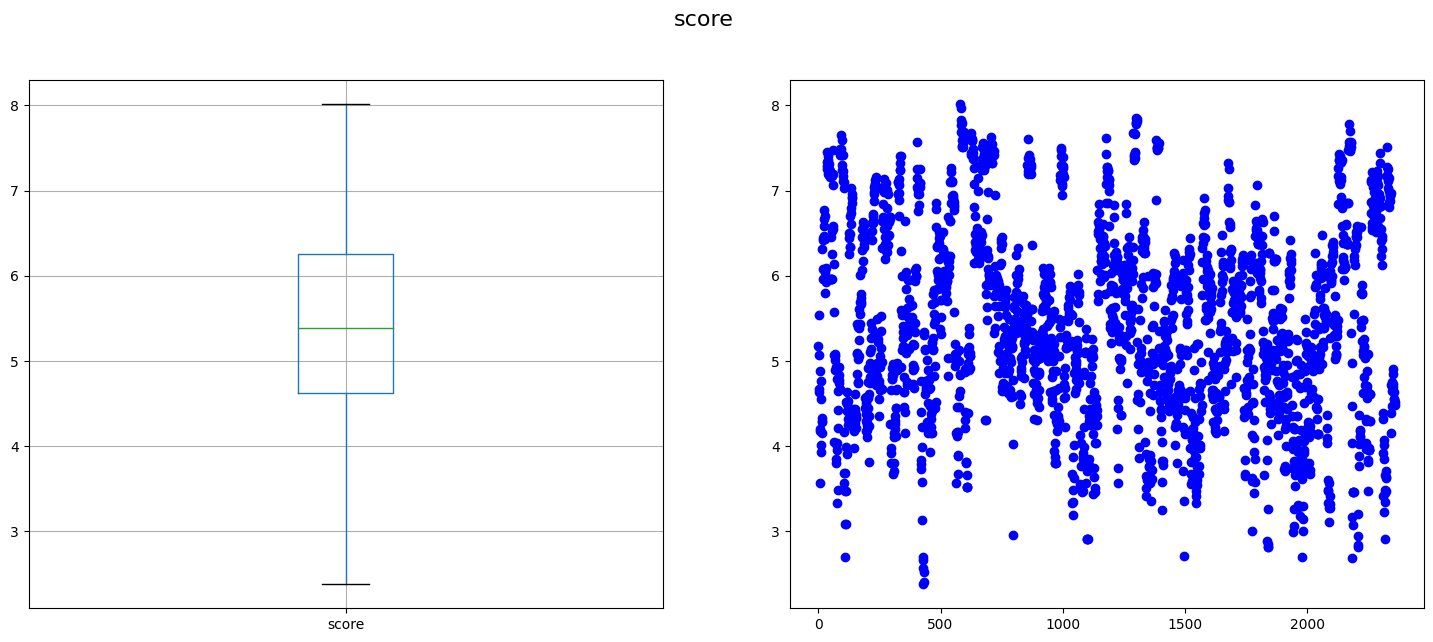

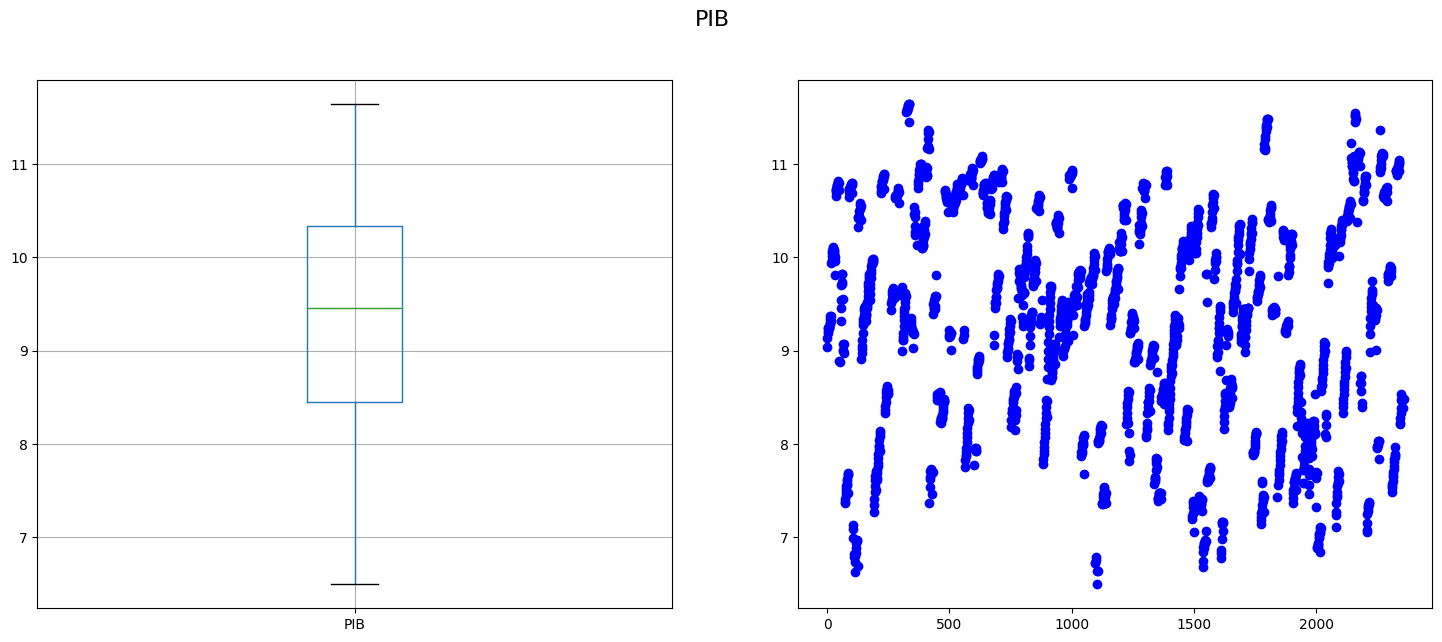

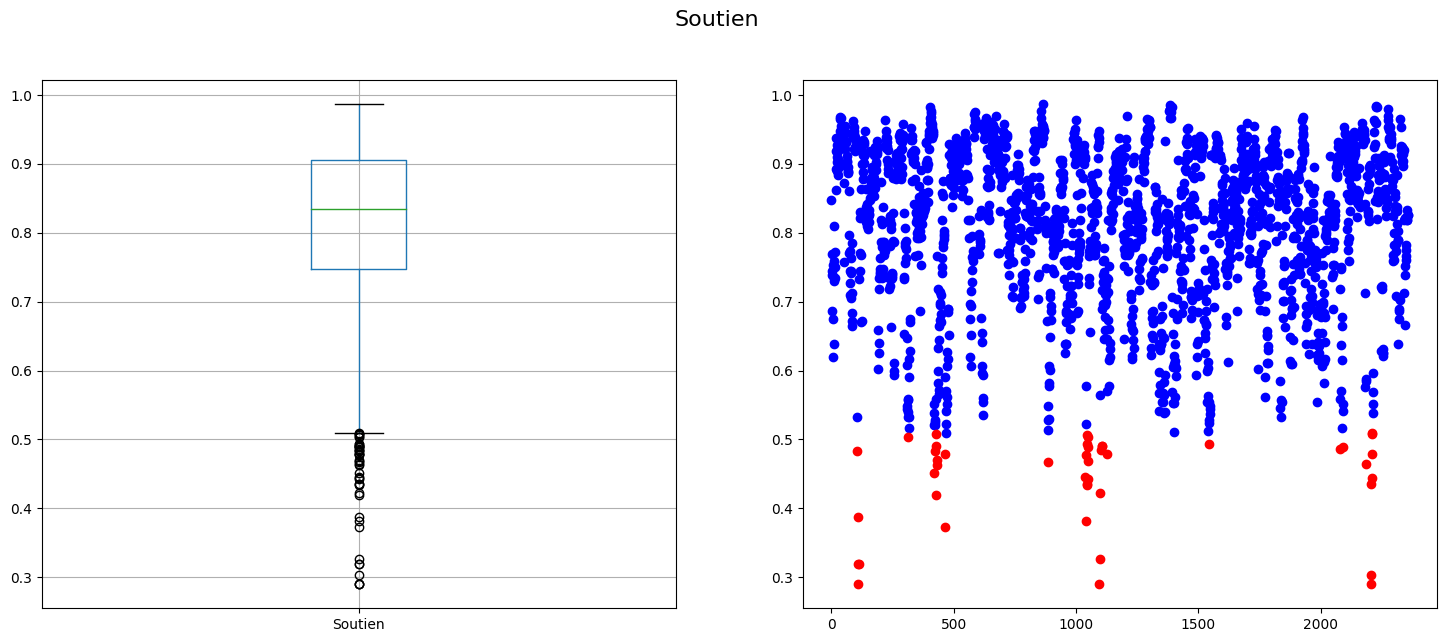

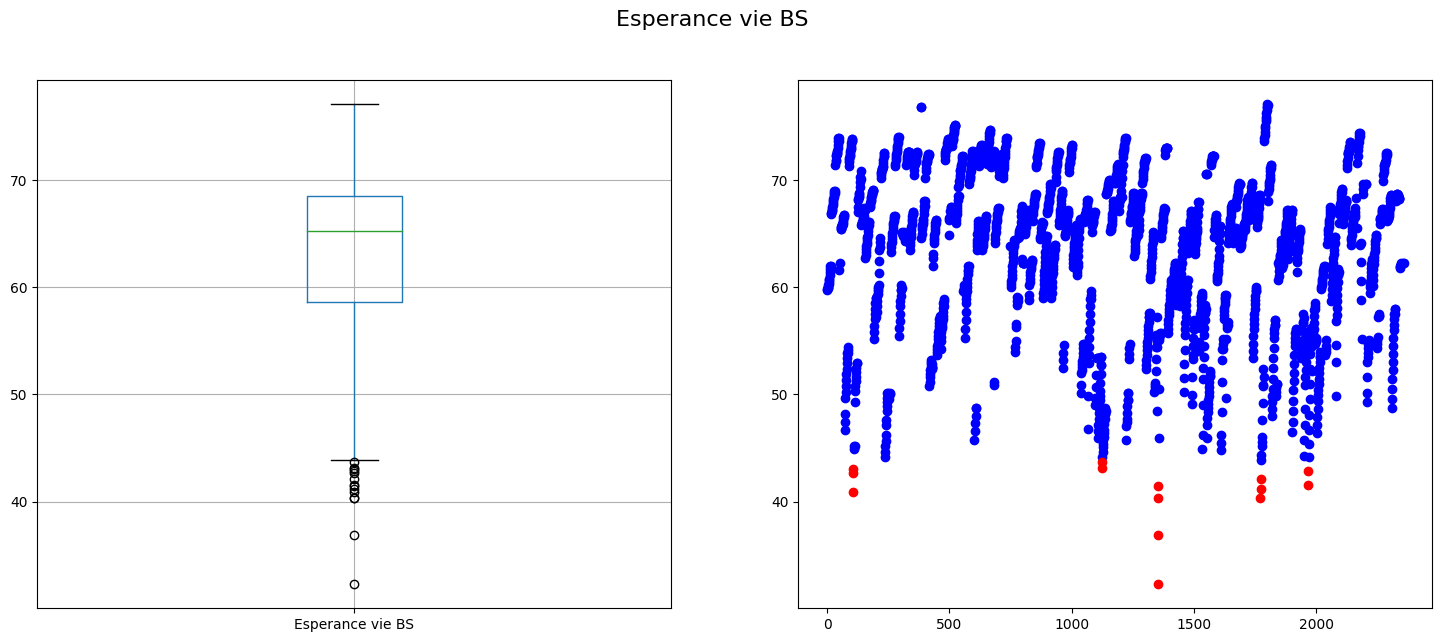

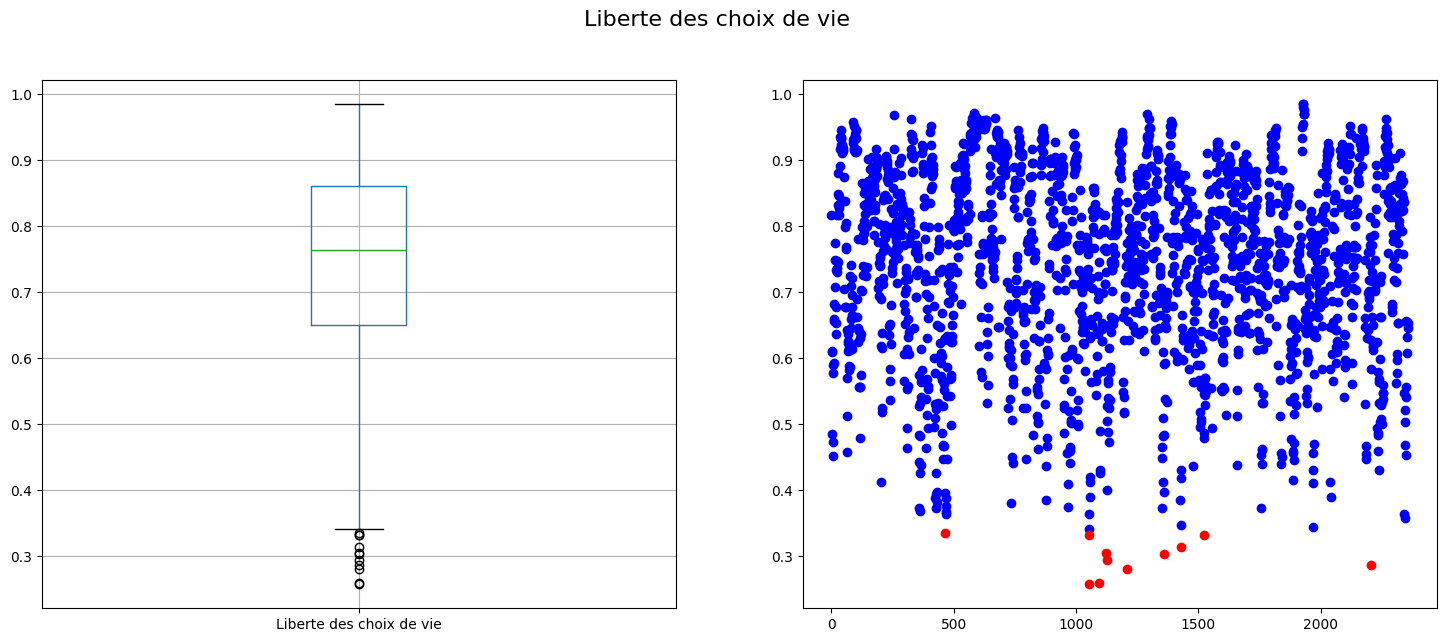

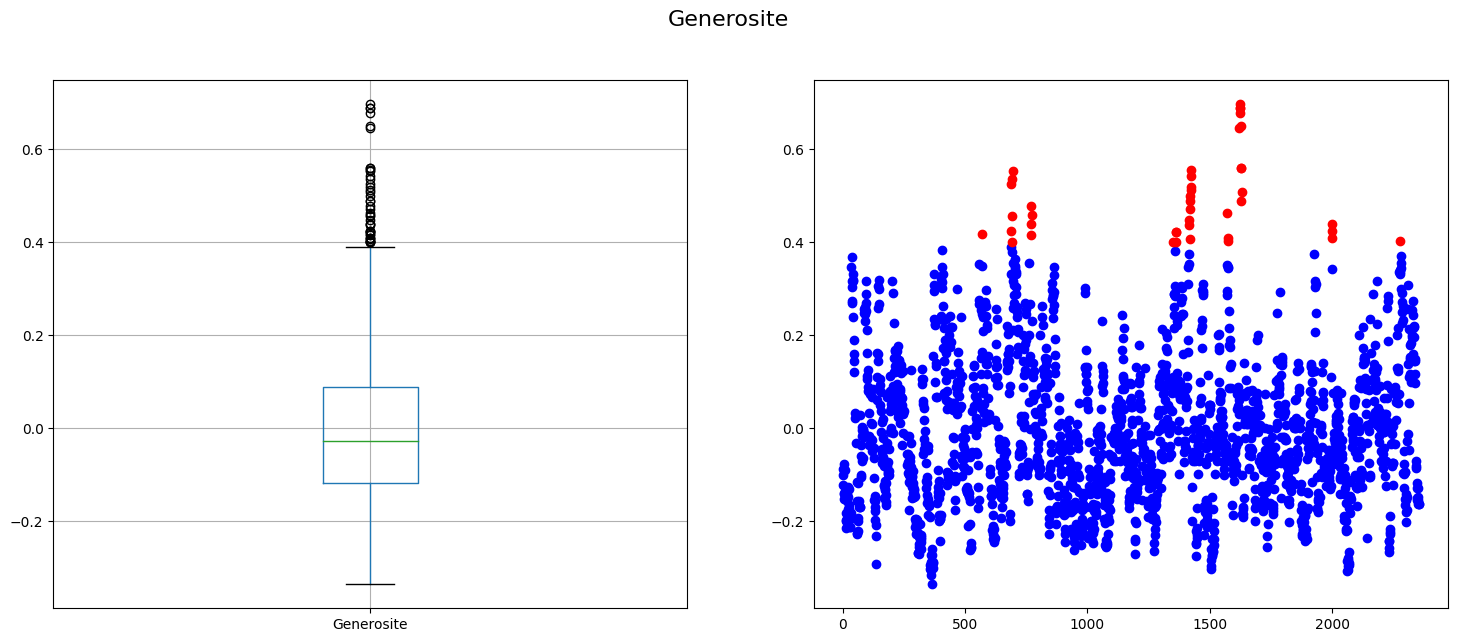

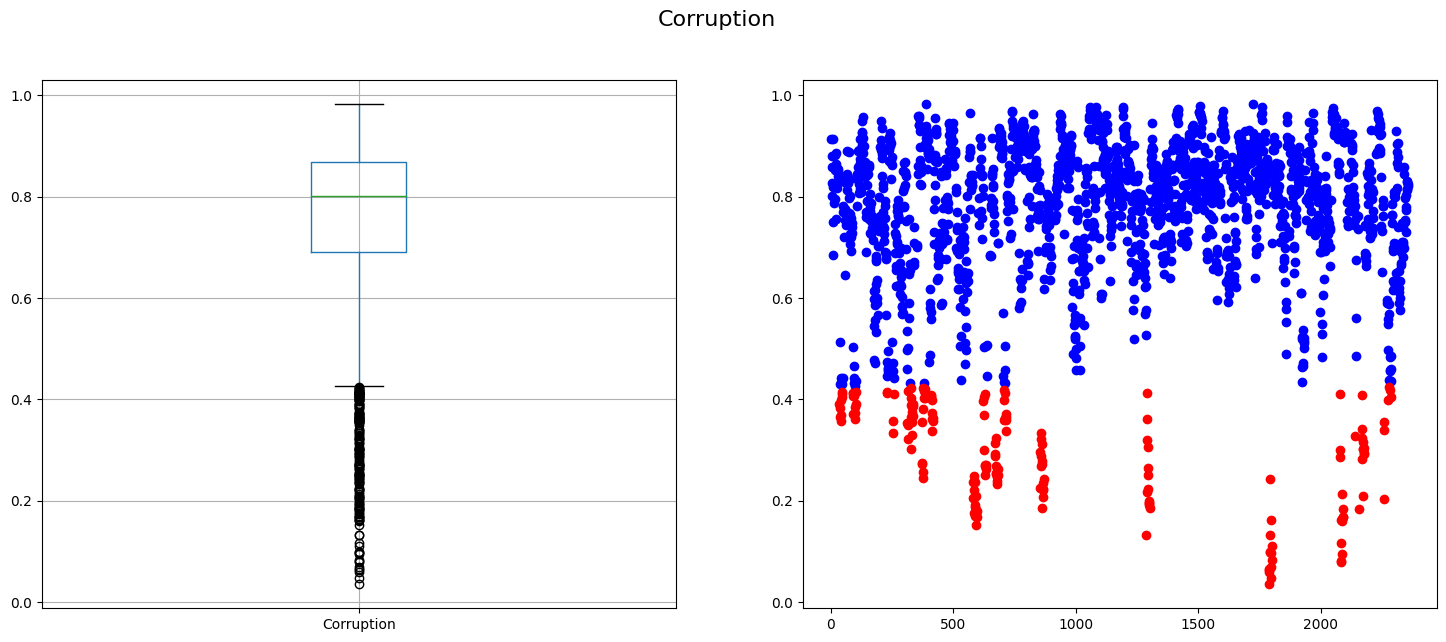

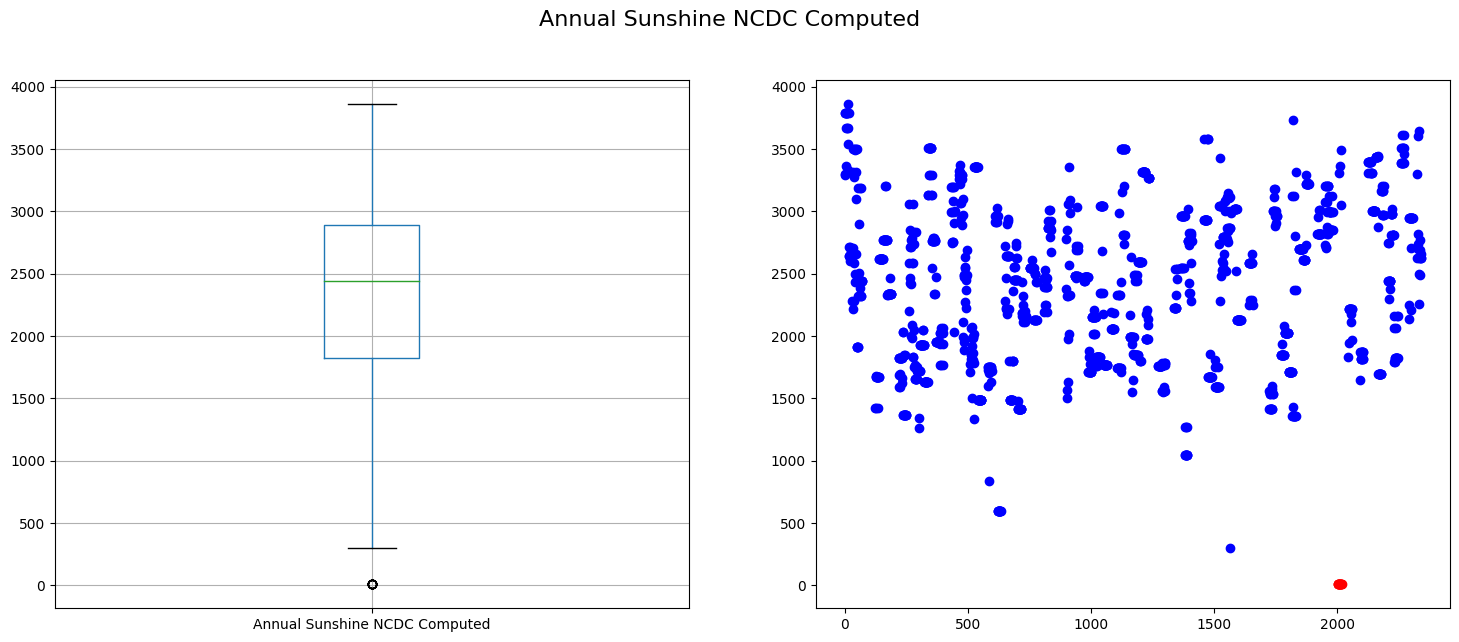

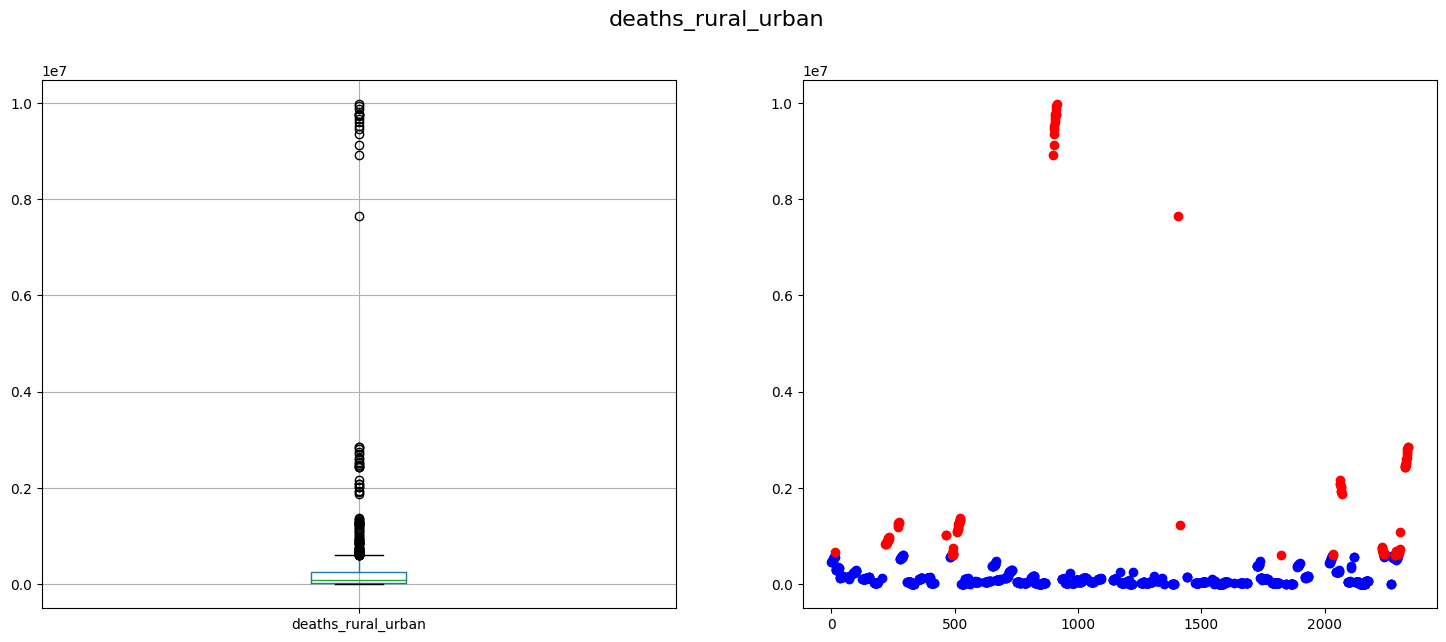

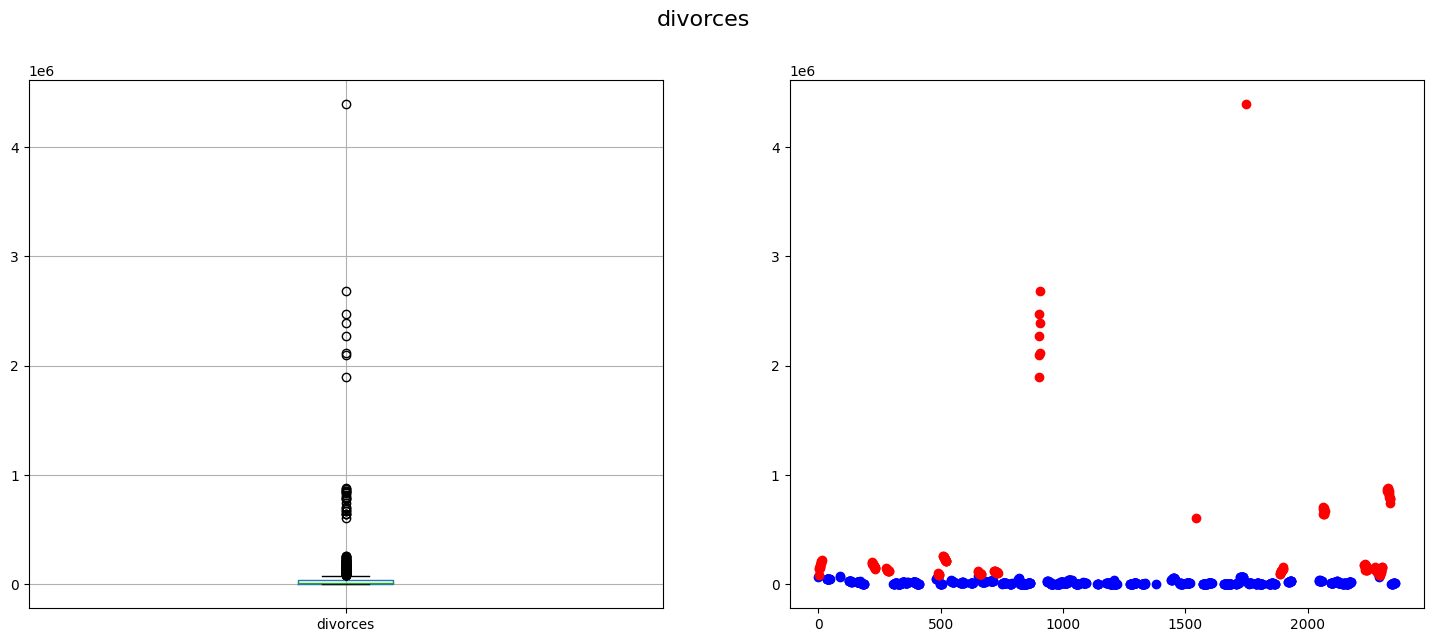

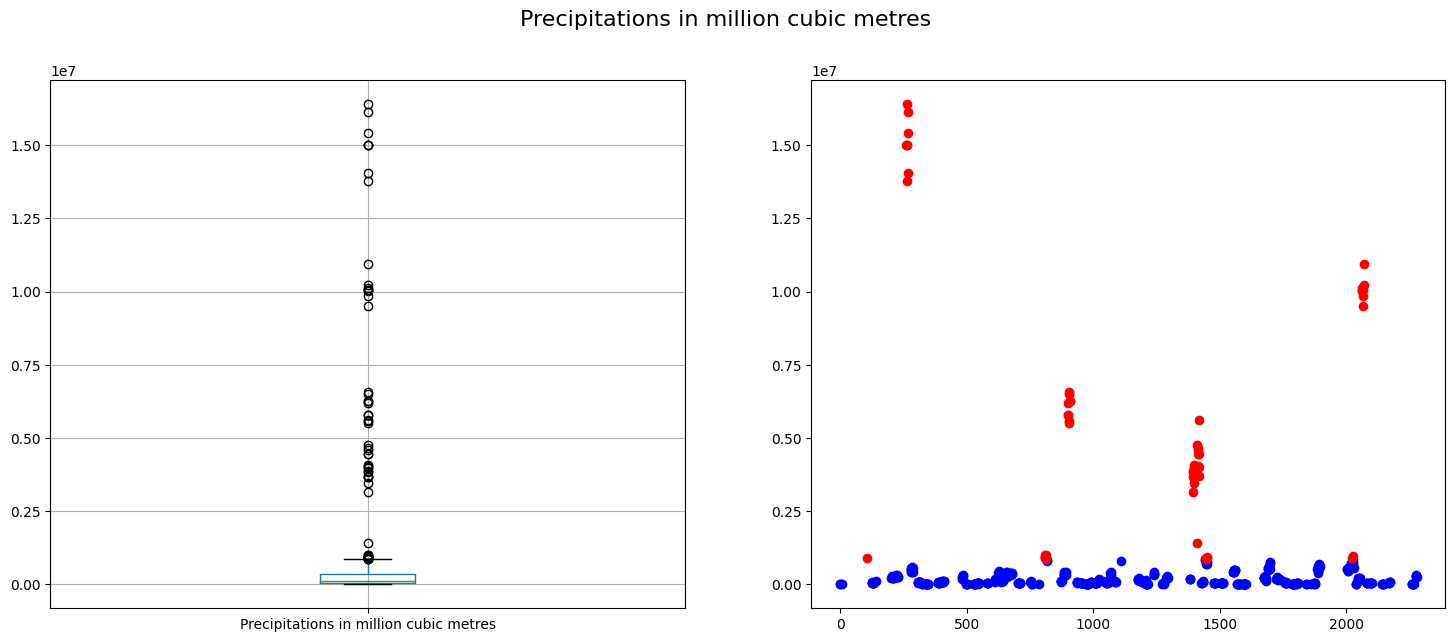

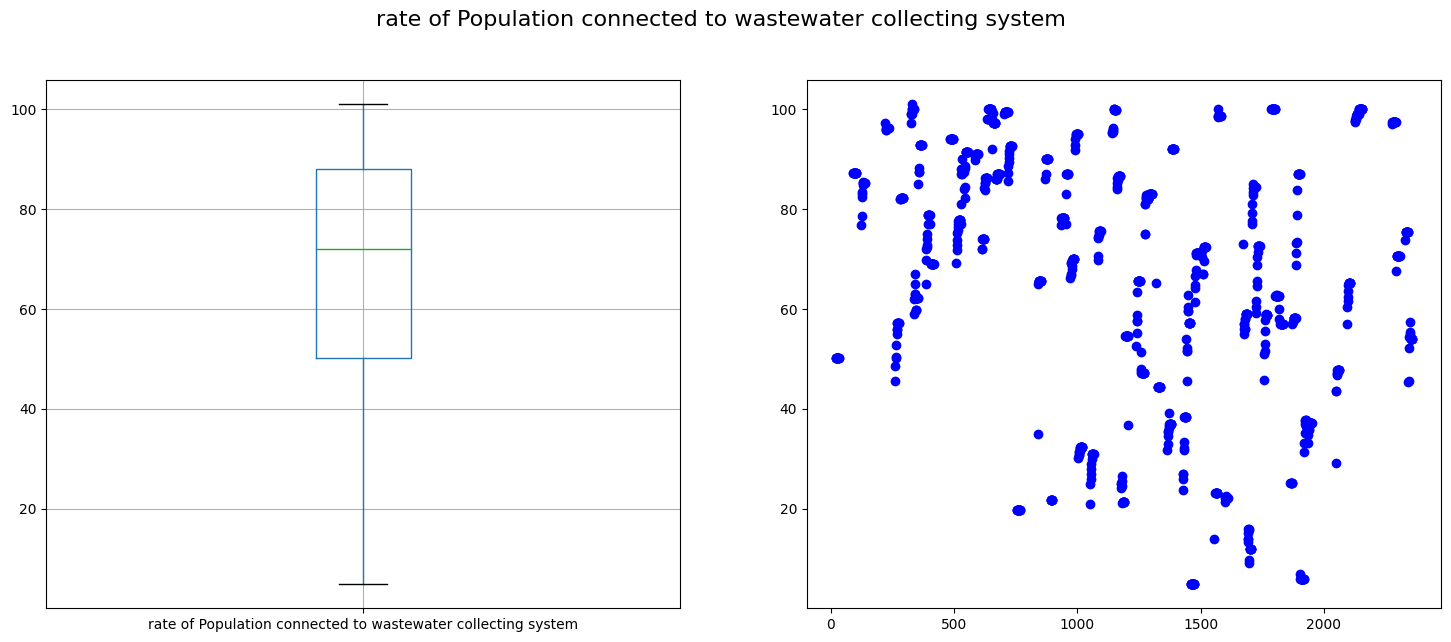

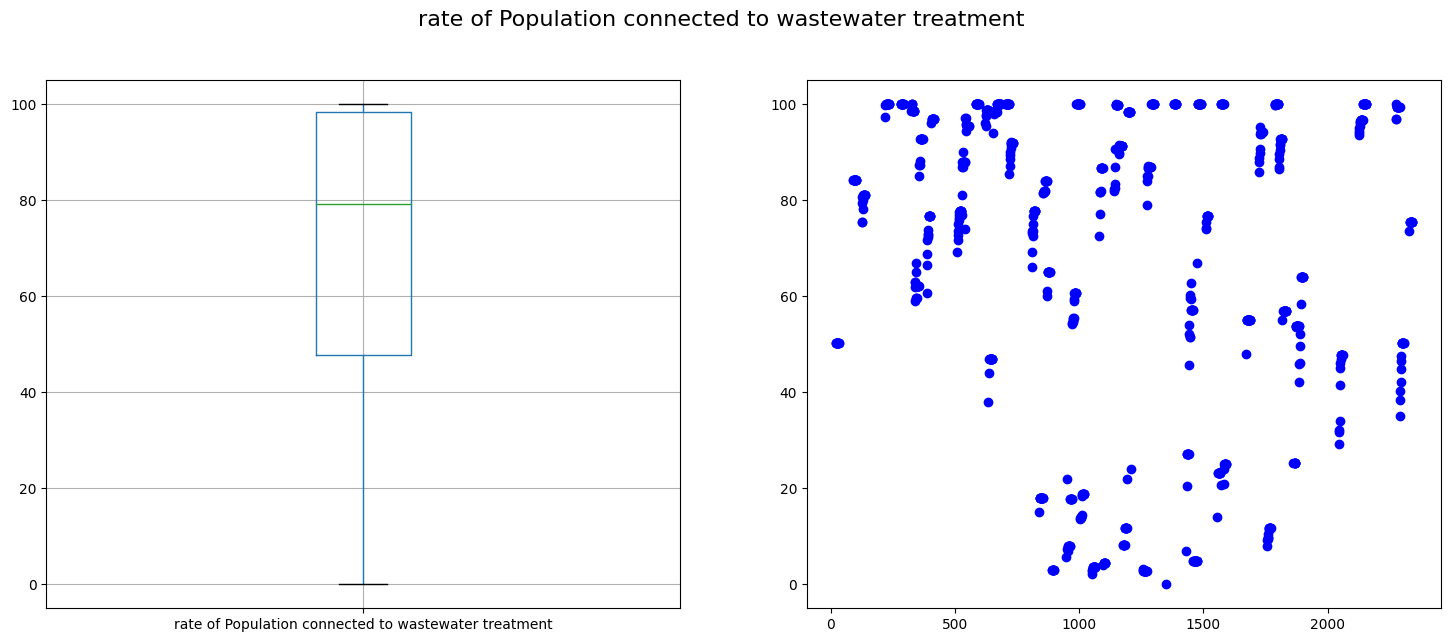

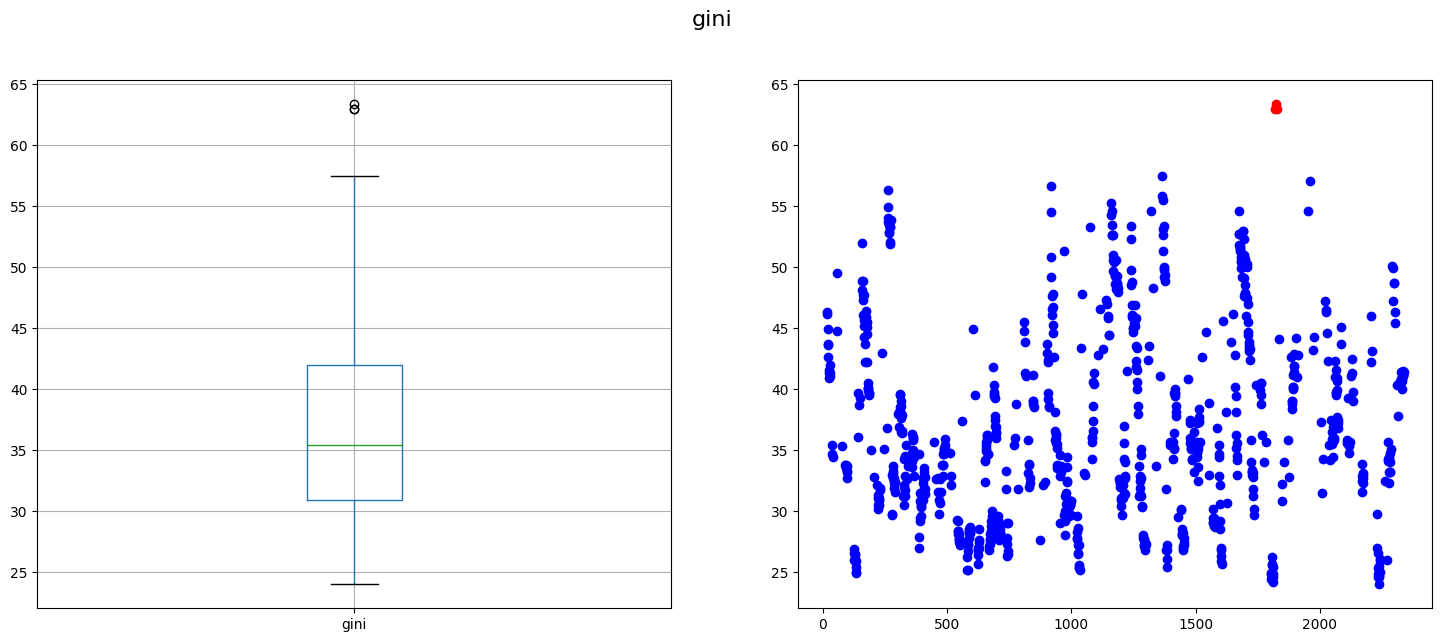

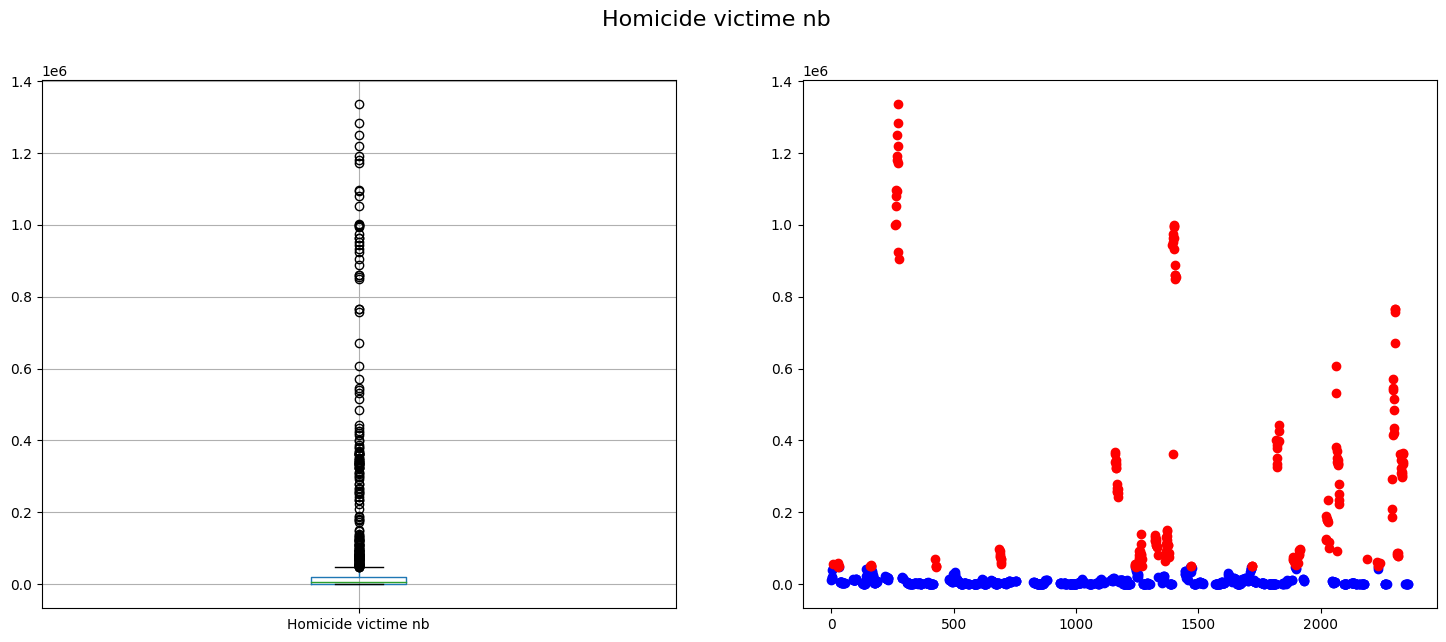

In [66]:
df_corrected = df_completed.copy()
to_correct_colums = ['PIB', 'Soutien', 'Esperance vie BS', 'Liberte des choix de vie', 'Generosite', 'Corruption']
for c in to_correct_colums:
    df_corrected.loc[df_corrected["year"] == 2022, c] = np.nan

for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(df_corrected, column_name)
    graphe_outliers(df_corrected, column_name, q_min, q_max)

<div style="display: flex; background-color: indigo;" >

#### 3.1.2. Paiplot de la DF
</div>

In [30]:
# pour éviter de lancer la génération des paiplot par erreur
# Just to fail

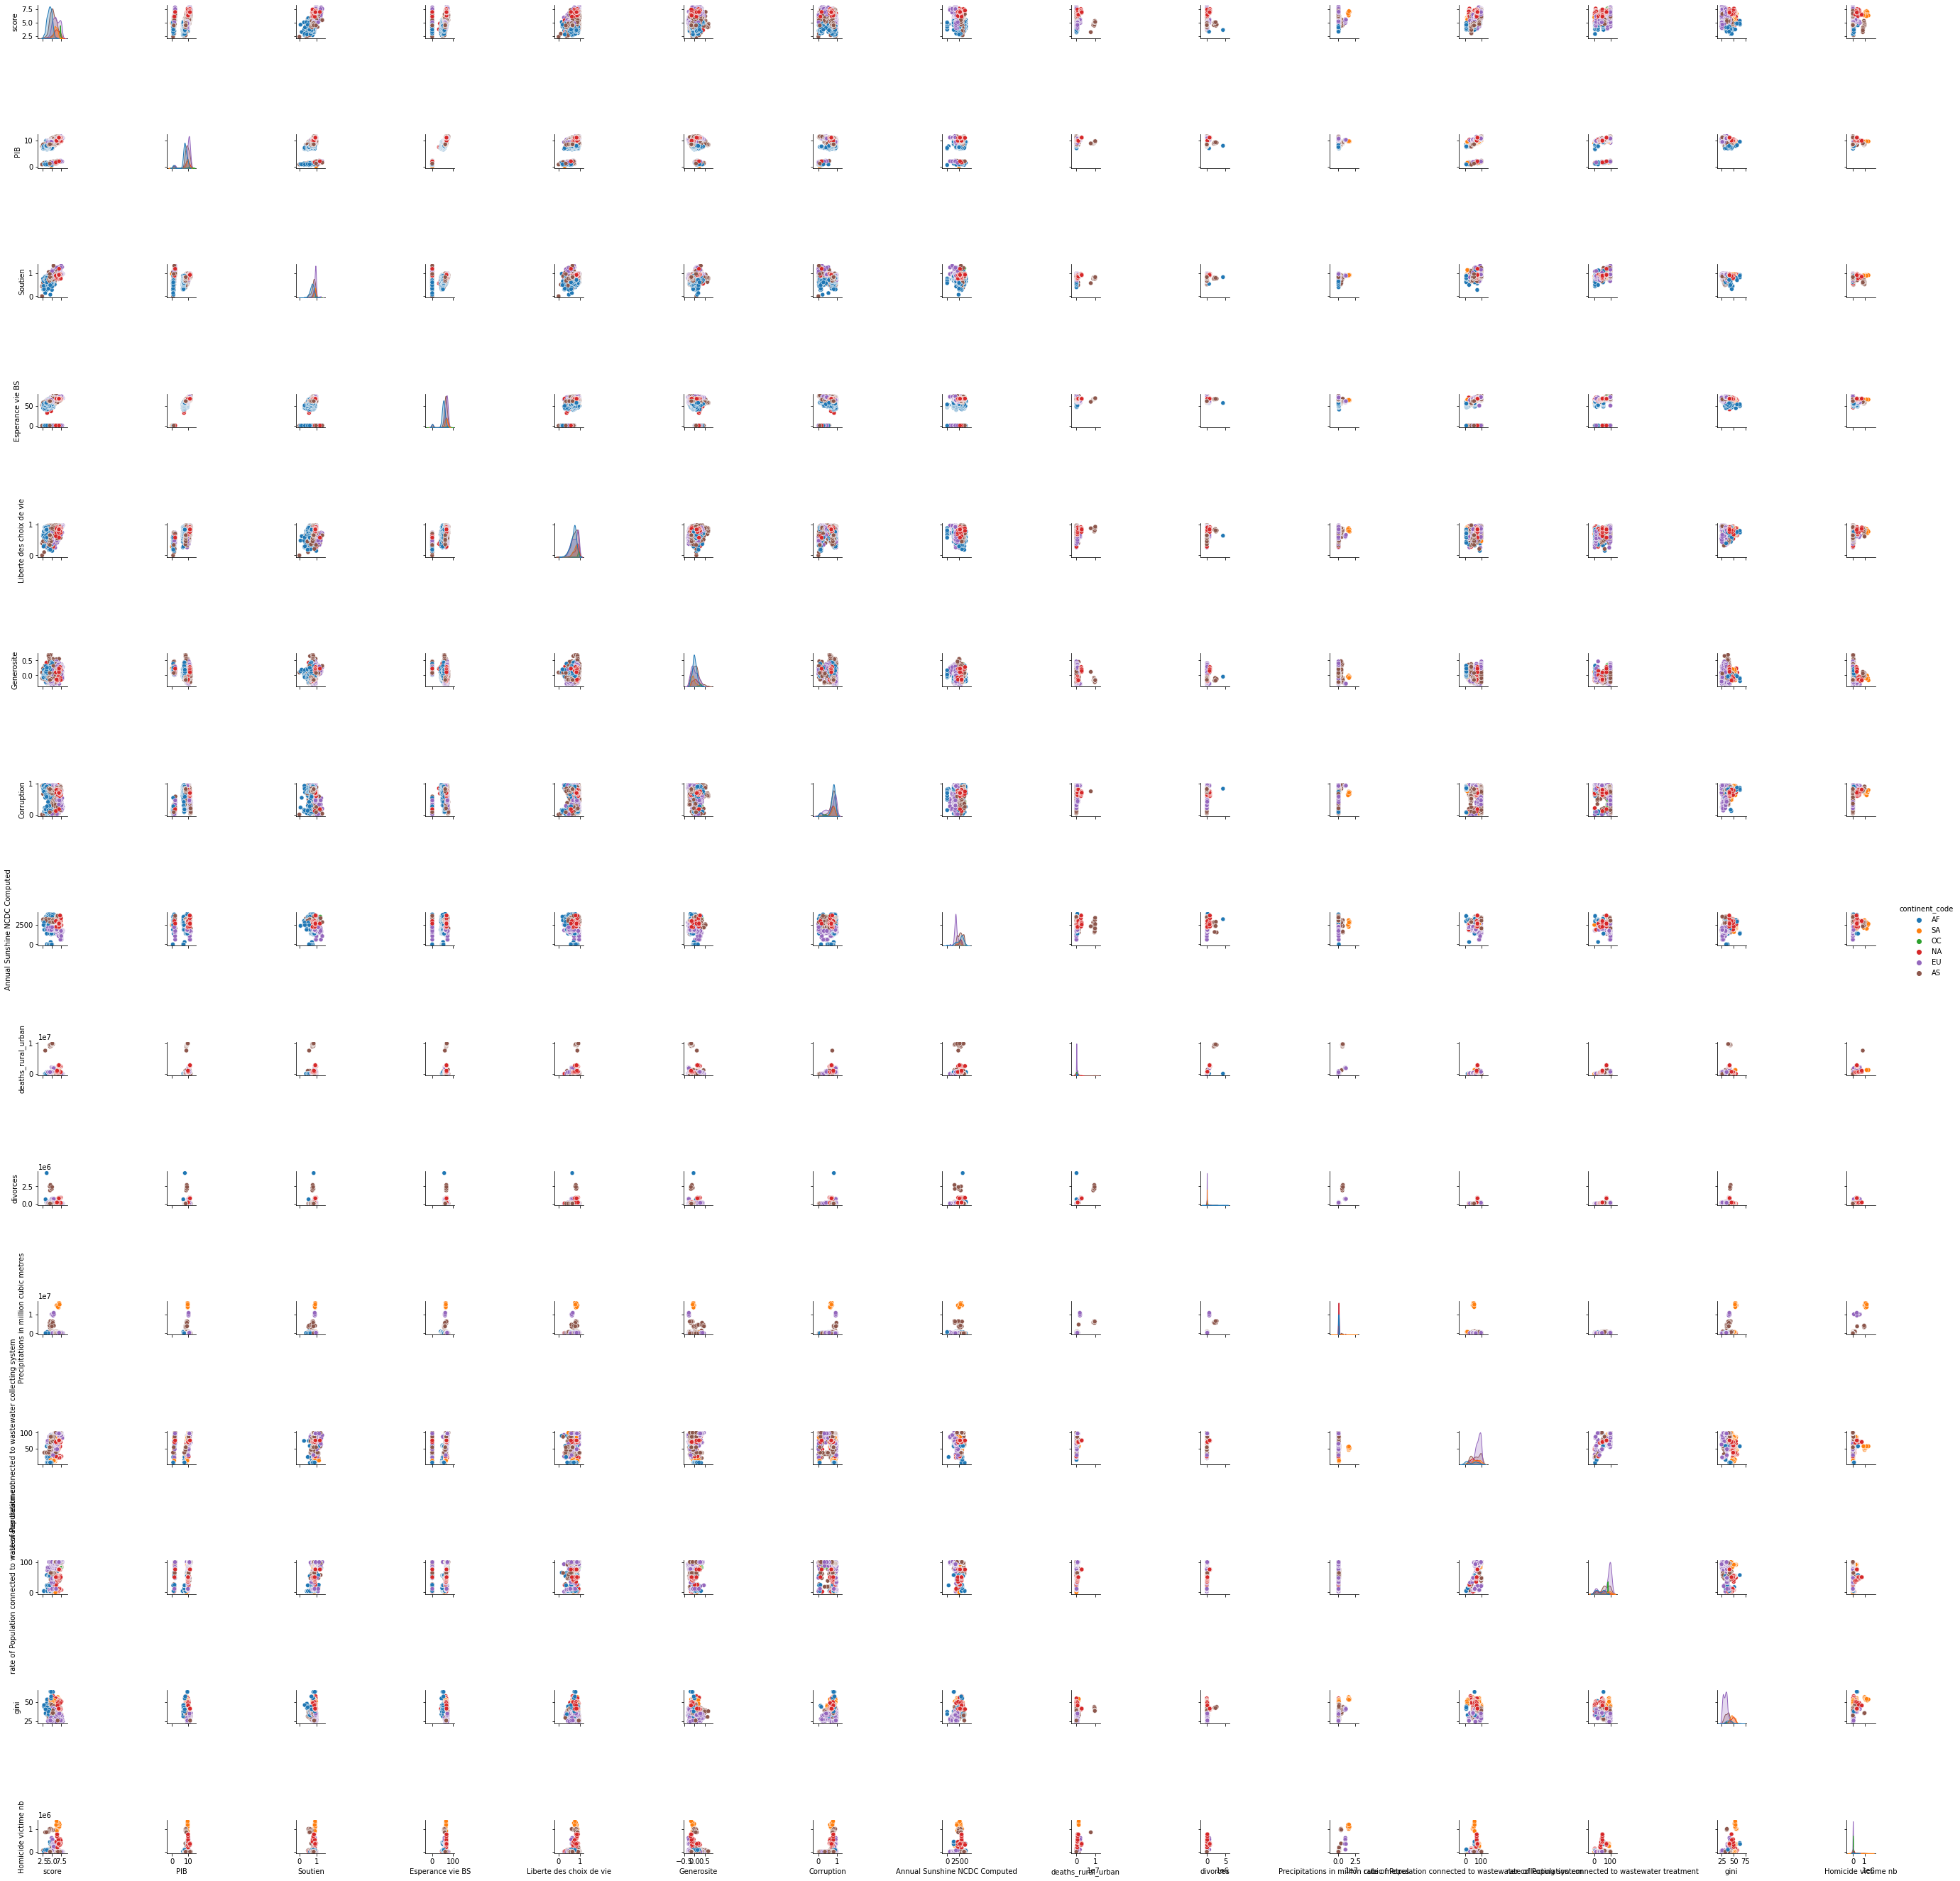

In [31]:
sns.pairplot(df_completed[['continent_code', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'alpha3', 'Annual Sunshine NCDC Computed',
       'deaths_rural_urban', 'divorces',
       'Precipitations in million cubic metres',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb']], hue='continent_code')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

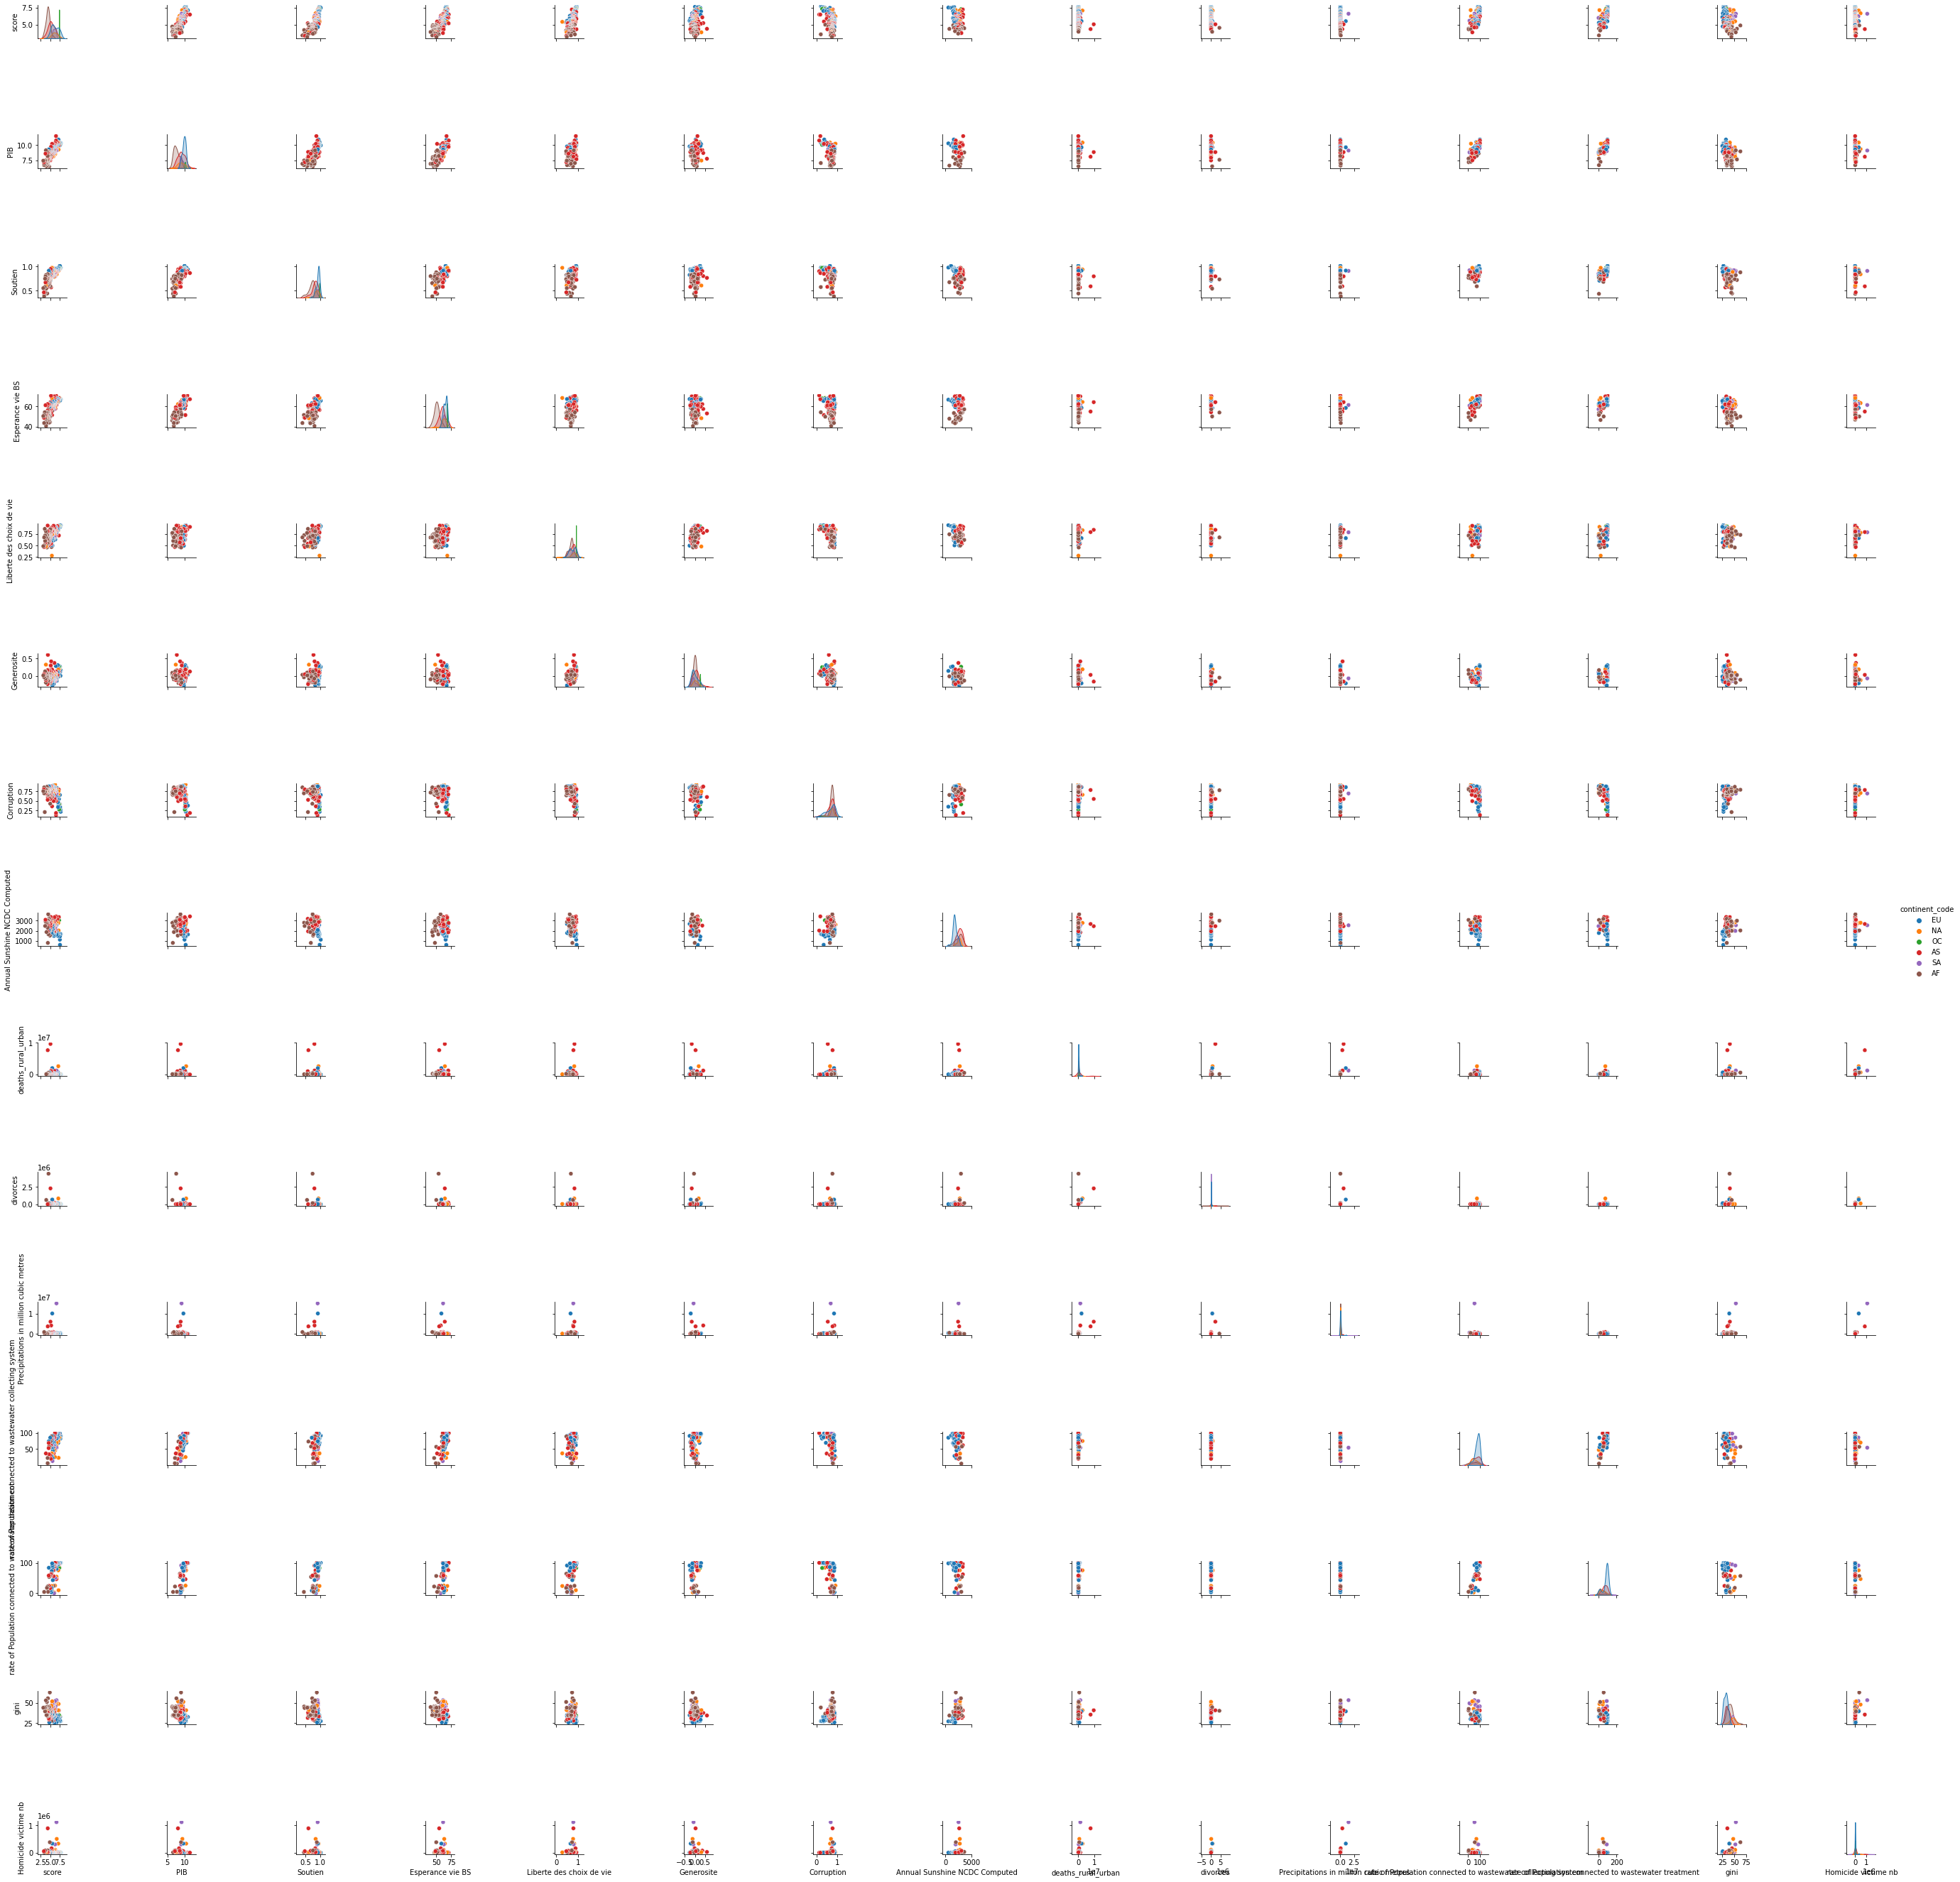

In [32]:
sns.pairplot(df_mean[['continent_code', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'alpha3', 'Annual Sunshine NCDC Computed',
       'deaths_rural_urban', 'divorces',
       'Precipitations in million cubic metres',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb']], hue='continent_code')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. Focus sur le score
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.3.1 Cartographie du score moyen des pays
</div>

In [34]:
fig = px.choropleth(df_mean, locations="alpha3",
                    color="score", # lifeExp is a column of gapminder
                    hover_name="country_official", # column to add to hover information
                    color_continuous_scale=[(0, "red"), (0.5, "yellow"), (1, "green")])
fig.update_layout(title=f"Moyenne des scores de {annee_min} à {annee_max}")
fig.update_layout(margin=dict(l=10, r=20, t=40, b=10))
fig.show()

> - On remarque le continent Américain (nord et sud), l'Europe et l'Australie sont les continents avec les meilleurs score.
> - Les continents Africain et Asiatique quant à eux sont très disparatres même s'ils tendent vers un score moyen voir bas.

<div style="display: flex; background-color: indigo;" >

#### 3.3.2 Evolution par pays
</div>

In [35]:
score_only_by_country = df_completed[['country_official', 'continent_code', 'alpha3', 'year', 'score']].copy()

dic_year = {}

for y in range(annee_min, annee_max+1):
    score_only_by_country[y] = np.nan
    score_only_by_country.loc[score_only_by_country["year"]==y,y] = score_only_by_country["score"]
    dic_year[y] = ["sum"]
print(dic_year)

{2005: ['sum'], 2006: ['sum'], 2007: ['sum'], 2008: ['sum'], 2009: ['sum'], 2010: ['sum'], 2011: ['sum'], 2012: ['sum'], 2013: ['sum'], 2014: ['sum'], 2015: ['sum'], 2016: ['sum'], 2017: ['sum'], 2018: ['sum'], 2019: ['sum'], 2020: ['sum'], 2021: ['sum'], 2022: ['sum']}


In [36]:
# il faut fusionner les lignes par pays
score_only_by_country2 = score_only_by_country.groupby(by=['country_official', 'continent_code', 'alpha3']).agg(dic_year)
score_only_by_country2 = score_only_by_country2.droplevel(1, axis=1) 
print(score_only_by_country.shape)
print(score_only_by_country2.shape)
score_only_by_country2.head()

(2359, 23)
(164, 18)


2005   2006   2007  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     5.168  0.000  5.541   
Argentine Republic               SA             ARG     0.000  6.313  6.073   
Australia                        OC             AUS     7.341  0.000  7.285   
Belize                           NA             BLZ     0.000  0.000  6.451   
Bolivarian Republic of Venezuela SA             VEN     7.170  6.525  0.000   

                                                         2008   2009   2010  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     4.632  5.066  4.669   
Argentine Republic               SA             ARG     5.961  6.424  6.441   
Australia                        OC             AUS     7.254  0.000  7.450   
Belize                           NA             BLZ     0.000  0.000  0.000   
Bolivarian Republic of Venezuela SA             VEN     6.258  7.189  7.478   

                                                         2011   2012   2013  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     4.174  4.204  3.559   
Argentine Republic               SA             ARG     6.776  6.468  6.582   
Australia                        OC             AUS     7.406  7.196  7.364   
Belize                           NA             BLZ     0.000  0.000  0.000   
Bolivarian Republic of Venezuela SA             VEN     6.580  7.067  6.553   

                                                         2014   2015   2016  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     4.885  4.763  4.557   
Argentine Republic               SA             ARG     6.671  6.697  6.427   
Australia                        OC             AUS     7.289  7.309  7.250   
Belize                           NA             BLZ     5.956  0.000  5.956   
Bolivarian Republic of Venezuela SA             VEN     6.136  5.569  4.041   

                                                         2017   2018   2019  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     3.929  4.005  4.328   
Argentine Republic               SA             ARG     6.039  5.793  6.086   
Australia                        OC             AUS     7.257  7.177  7.234   
Belize                           NA             BLZ     5.956  5.956  0.000   
Bolivarian Republic of Venezuela SA             VEN     5.071  5.006  5.081   

                                                         2020   2021   2022  
country_official                 continent_code alpha3                       
Arab Republic of Egypt           AF             EGY     4.151  4.283  4.288  
Argentine Republic               SA             ARG     5.975  5.929  5.967  
Australia                        OC             AUS     7.223  7.183  7.162  
Belize                           NA             BLZ     0.000  0.000  0.000  
Bolivarian Republic of Venezuela SA             VEN     5.053  4.892  4.925

In [37]:
# Trie des pays sur la moyenne du score
score_only_by_country2 = score_only_by_country2.reset_index()
score_only_by_country2 = score_only_by_country2.set_index('country_official')
score_only_by_country2 = score_only_by_country2.reindex(index=df_mean['country_official'])
score_only_by_country2.head()

continent_code alpha3   2005   2006   2007   2008   2009  \
country_official                                                               
Kingdom of Denmark              EU    DNK  8.019  0.000  7.834  7.971  7.683   
Republic of Finland             EU    FIN  0.000  7.672  0.000  7.671  0.000   
Swiss Confederation             EU    CHE  0.000  7.473  0.000  0.000  7.525   
Kingdom of Norway               EU    NOR  0.000  7.416  0.000  7.632  0.000   
Republic of Iceland             EU    ISL  0.000  0.000  0.000  6.888  0.000   

                      2010   2011   2012   2013   2014   2015   2016   2017  \
country_official                                                              
Kingdom of Denmark   7.771  7.788  7.520  7.589  7.508  7.514  7.558  7.594   
Republic of Finland  7.393  7.354  7.420  7.445  7.385  7.448  7.660  7.788   
Swiss Confederation  0.000  0.000  7.776  0.000  7.493  7.572  7.459  7.474   
Kingdom of Norway    0.000  0.000  7.678  0.000  7.444  7.603  7.596  7.579   
Republic of Iceland  0.000  0.000  7.591  7.501  0.000  7.498  7.510  7.476   

                      2018   2019   2020   2021   2022  
country_official                                        
Kingdom of Denmark   7.649  7.693  7.646  7.620  7.636  
Republic of Finland  7.858  7.780  7.809  7.842  7.821  
Swiss Confederation  7.509  7.694  7.560  7.571  7.512  
Kingdom of Norway    7.444  7.442  7.488  7.392  7.365  
Republic of Iceland  7.495  7.533  7.504  7.554  7.557

In [38]:
n_top = 30
score_only_by_country_t = score_only_by_country2[range(annee_min, annee_max+1)].head(n_top).T
score_only_by_country_t.head()

country_official  Kingdom of Denmark  Republic of Finland  \
2005                           8.019                0.000   
2006                           0.000                7.672   
2007                           7.834                0.000   
2008                           7.971                7.671   
2009                           7.683                0.000   

country_official  Swiss Confederation  Kingdom of Norway  Republic of Iceland  \
2005                            0.000              0.000                0.000   
2006                            7.473              7.416                0.000   
2007                            0.000              0.000                0.000   
2008                            0.000              7.632                6.888   
2009                            7.525              0.000                0.000   

country_official  Kingdom of the Netherlands  Canada  New Zealand  Australia  \
2005                                   7.464   7.418        0.000      7.341   
2006                                   0.000   0.000        7.305      0.000   
2007                                   7.452   7.482        7.604      7.285   
2008                                   7.631   7.486        7.381      7.254   
2009                                   0.000   7.488        0.000      0.000   

country_official  Republic of Austria  ...  United Mexican States  \
2005                            0.000  ...                  6.581   
2006                            7.122  ...                  0.000   
2007                            0.000  ...                  6.525   
2008                            7.181  ...                  6.829   
2009                            0.000  ...                  6.963   

country_official  French Republic  Czech Republic  Republic of Panama  \
2005                        7.093           6.439               0.000   
2006                        6.583           0.000               6.128   
2007                        0.000           6.500               6.894   
2008                        7.008           0.000               6.931   
2009                        6.283           0.000               7.034   

country_official  Federative Republic of Brazil  Kingdom of Saudi Arabia  \
2005                                      6.637                    7.080   
2006                                      0.000                    0.000   
2007                                      6.321                    7.267   
2008                                      6.691                    6.811   
2009                                      7.001                    6.148   

country_official  Kingdom of Spain  Republic of Singapore  State of Qatar  \
2005                         7.153                  0.000           0.000   
2006                         0.000                  6.463           0.000   
2007                         6.995                  6.834           0.000   
2008                         7.294                  6.642           0.000   
2009                         6.199                  6.145           6.418   

country_official  Republic of Malta  
2005                          0.000  
2006                          0.000  
2007                          0.000  
2008                          0.000  
2009                          6.328  

[5 rows x 30 columns]

In [39]:
# on remplace les 0 par des nan pour éviter des chutes dans les courbes
score_only_by_country_t.replace(0, np.nan, inplace=True)

In [40]:
fig = px.line(score_only_by_country_t, markers=True, title=f"Evolution des scores du top {n_top} (sur la moyenne).")
fig.update_layout(
    xaxis_title="Années",
    yaxis_title="Score",
    legend_title="Nom officiel des pays",
)
fig.update_layout(margin=dict(l=10, r=20, t=40, b=10))
fig.show()

Il semble que les données de la Suède pose un soucis, une analyse plus approffondie est nécessaire.

In [82]:
print(score_only_by_country_t.loc[2020,"Kingdom of Sweden"])
print(score_only_by_country_t.loc[2021,"Kingdom of Sweden"])
# Correction de la valeur de la Suède
# Pour 2020 = récupération du score sur internet
score_only_by_country_t.loc[2020,"Kingdom of Sweden"] = 7,353 
# Pour 2021 = La moyenne entre 2020 et 2022
score_only_by_country_t.loc[2021,"Kingdom of Sweden"] = np.mean([score_only_by_country_t.loc[2020,"Kingdom of Sweden"], score_only_by_country_t.loc[2022,"Kingdom of Sweden"]])

4.308


Error: Canceled future for execute_request message before replies were done

<div style="display: flex; background-color: indigo;" >

#### 3.3.3 Evolution par continent
</div>

In [ ]:
# il faut fusionner les lignes par continent
score_only_by_continent = score_only_by_country.groupby(by=['continent_code']).agg(dic_year)
score_only_by_continent = score_only_by_continent.droplevel(1, axis=1) 
print(score_only_by_continent.shape)
score_only_by_continent.head()

In [ ]:
score_only_by_continent_t = score_only_by_continent[range(annee_min, annee_max+1)].T
# on remplace les 0 par des nan pour éviter des chutes dans les courbes
score_only_by_continent_t.replace(0, np.nan, inplace=True)
score_only_by_continent_t.head()

In [ ]:
fig = px.line(score_only_by_continent_t, markers=True, title=f"Evolution des scores par continent.")
fig.update_layout(
    xaxis_title="Années",
    yaxis_title="Score",
    legend_title="Code continent",
)
fig.update_layout(margin=dict(l=10, r=20, t=40, b=10))
fig.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Annexes
</div>

In [ ]:
just to fail

<div style="display: flex; background-color: Green; padding: 7px;" >

### Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>